In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist.input_data import read_data_sets
from time import time

In [2]:
data = read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
img_size = 28
img_size_flat = img_size**2
img_shape = (img_size, img_size)
num_classes = 10
num_channels = 1

In [4]:
def find_rect_factors(number):
    square_root = int(np.sqrt(number))
    for divisor in range(square_root, number + 1):
        if divisor == 0:
            continue
        if number % divisor == 0:
            return (divisor, int(number / divisor))

In [5]:
def plot_images(images):
    plt_shape = find_rect_factors(len(images))
    fig, axes = plt.subplots(plt_shape[1], plt_shape[0])
    
    image_size = images.shape[1]
    image_rows = int(np.sqrt(image_size))
    
    if len(images) == 1:
        axes.imshow(images[0][:image_rows**2].reshape((image_rows, image_rows)), cmap='gray')
        axes.set_xticks([])
        axes.set_yticks([])
        return
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i][:image_rows**2].reshape((image_rows, image_rows)), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

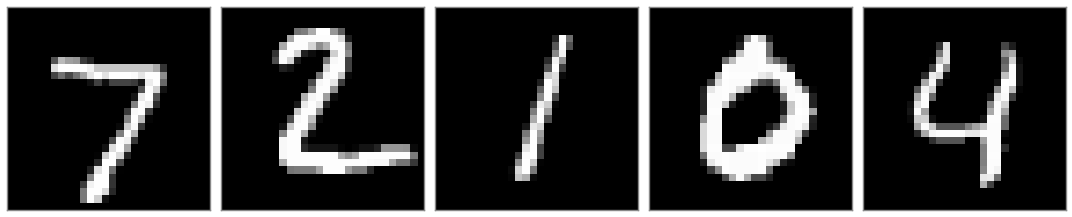

In [6]:
plot_images(data.test.images[:5])

In [7]:
x = tf.placeholder(tf.float32, (None, img_size_flat))

In [8]:
x_image = tf.reshape(x, (-1, img_size, img_size, num_channels))

In [9]:
x_reduced = tf.nn.avg_pool(x_image, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
x_reduced = tf.reshape(x_reduced, (-1, int(img_size_flat / 4)))
x_reduced

<tf.Tensor 'Reshape_1:0' shape=(?, 196) dtype=float32>

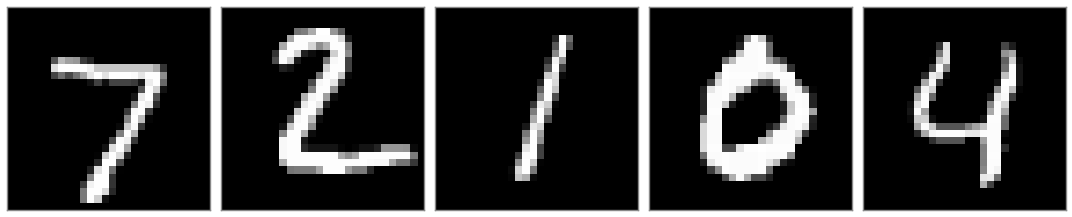

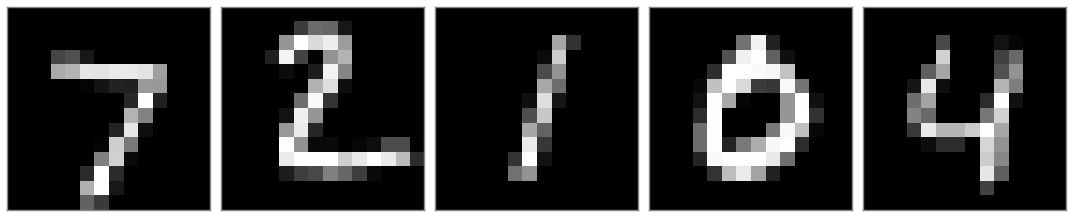

In [10]:
with tf.Session() as session:
    x_down = session.run(x_reduced, {x: data.test.images[:5]})
    plot_images(data.test.images[:5])
    plot_images(x_down)

In [11]:
def add_fc_layer(prev_layer, num_neurons, relu=True):
    prev_layer_neurons = int(prev_layer.shape[1])
    
    weights = tf.Variable(tf.truncated_normal((prev_layer_neurons, num_neurons), stddev=1e-2))
    biases = tf.Variable(tf.zeros((num_neurons)))
    
    layer = tf.matmul(prev_layer, weights) + biases
    
    if relu:
        layer = tf.nn.relu(layer)
        
    return layer

In [12]:
fc_layer1 = add_fc_layer(x_reduced, 128)
fc_layer2 = add_fc_layer(fc_layer1, img_size_flat)

In [13]:
y_pred = fc_layer2
y_pred

<tf.Tensor 'Relu_1:0' shape=(?, 784) dtype=float32>

In [14]:
y_true = x

In [15]:
loss = tf.reduce_mean((y_true - y_pred)**2)

In [16]:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [17]:
batch_size = 256
iterations_per_epoch = int(data.train.num_examples / batch_size)

In [18]:
def plot_samples(session):
    image_idx = np.random.randint(0, data.test.num_examples, 5)
    original_images = data.test.images[image_idx]
    downsampled_images, reconstructed_images = session.run([x_reduced, y_pred], {x: original_images})
    
    plot_images(original_images)
    plot_images(downsampled_images)
    plot_images(reconstructed_images)

In [19]:
def optimize(session, num_epochs=1):
    plot_samples(session)
    start_time = time()
    
    for epoch in range(num_epochs):
        for _ in range(iterations_per_epoch):
            x_batch, _ = data.train.next_batch(batch_size)
            session.run(optimizer, {x: x_batch})
        
        cost = session.run(loss, {x: x_batch})
        plot_samples(session)
        print("Epoch: {} / {}\tLoss: {}".format(epoch+1, num_epochs, cost))
        
    print("Optimization complete! Time: {}".format(time()-start_time))

In [20]:
session = tf.Session()

In [21]:
session.run(tf.global_variables_initializer())

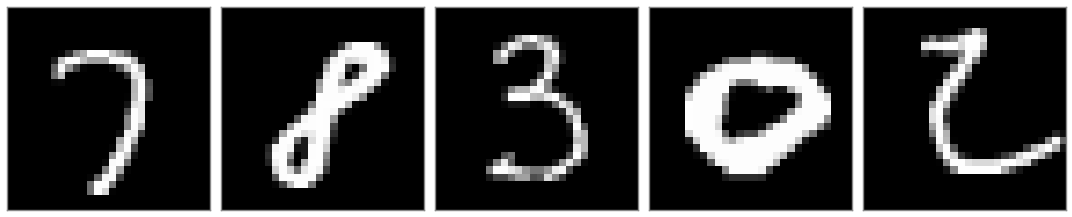

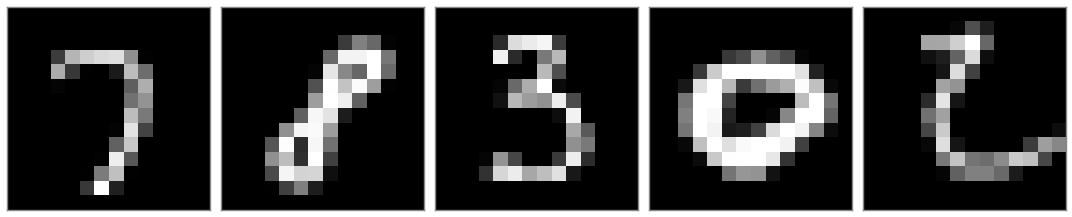

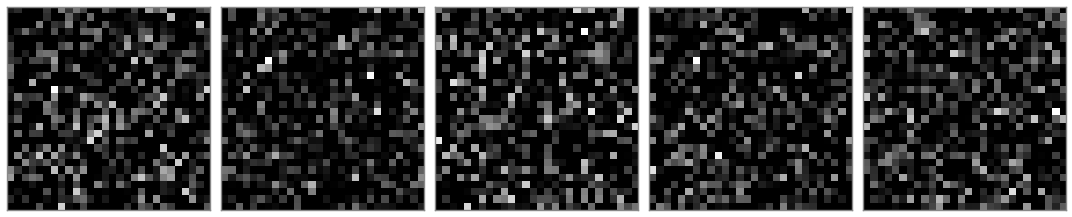

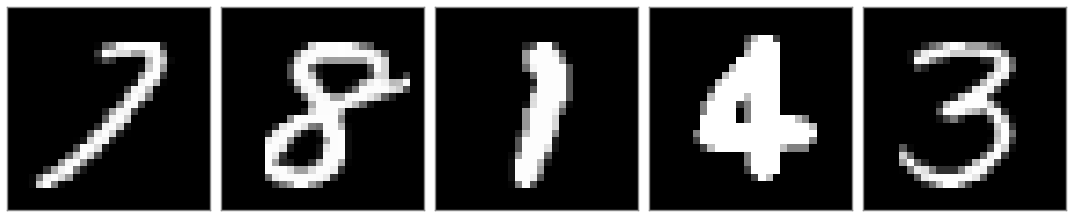

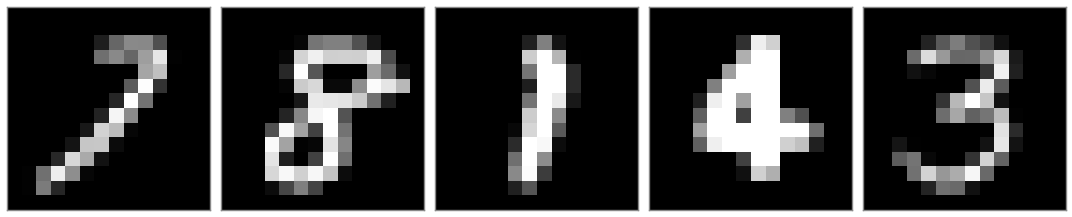

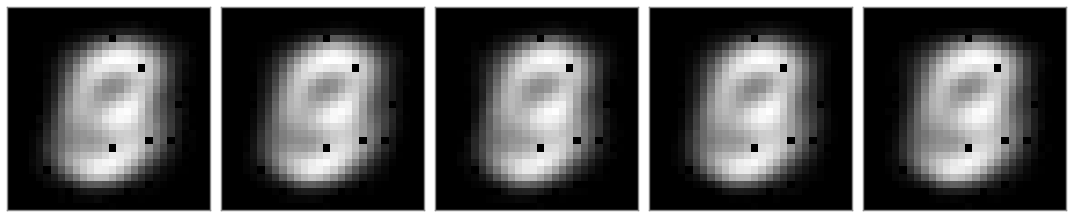

Epoch: 1 / 100	Loss: 0.06371273100376129


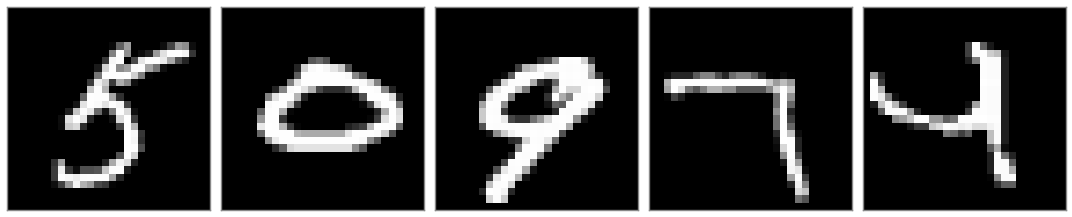

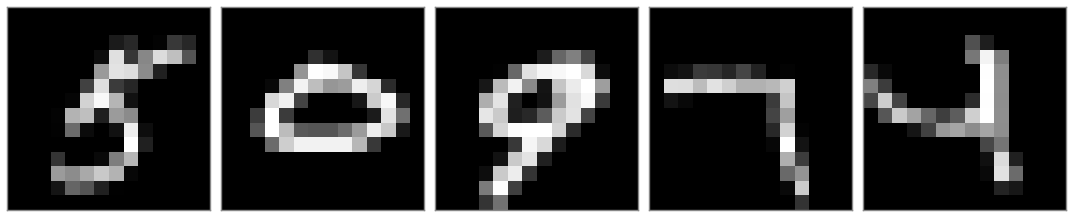

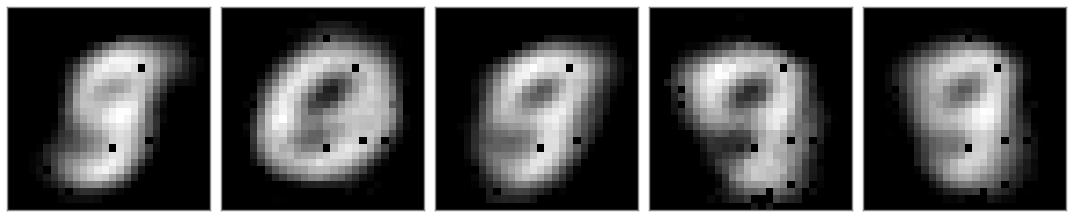

Epoch: 2 / 100	Loss: 0.05271130055189133


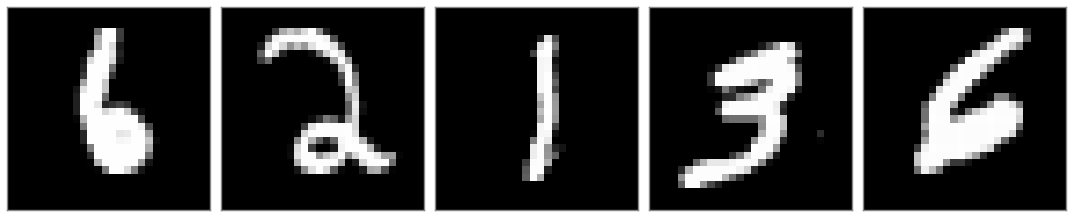

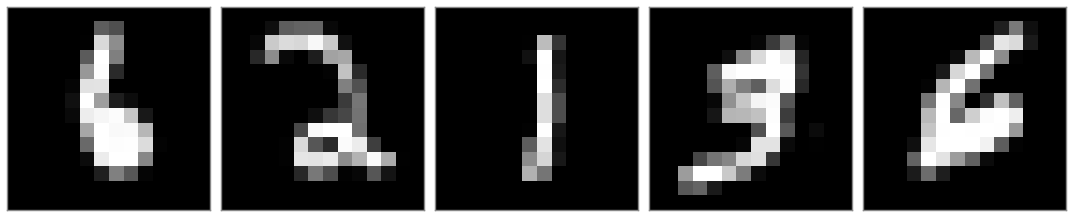

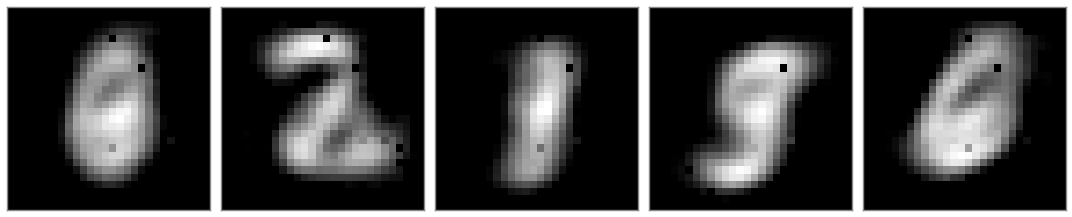

Epoch: 3 / 100	Loss: 0.04296405613422394


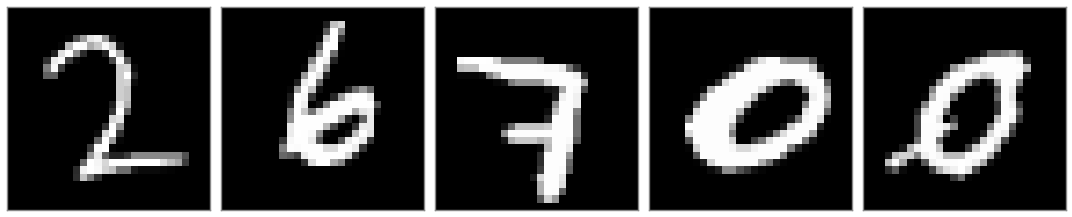

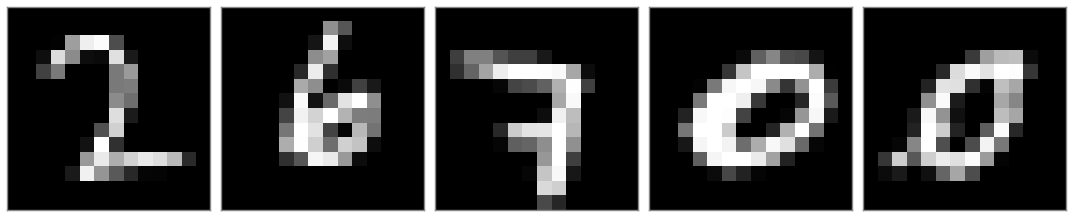

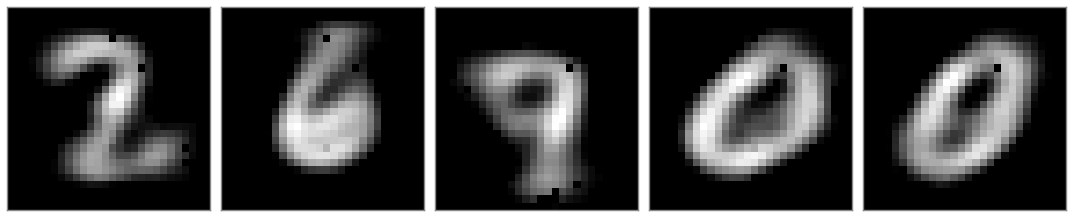

Epoch: 4 / 100	Loss: 0.03539002686738968


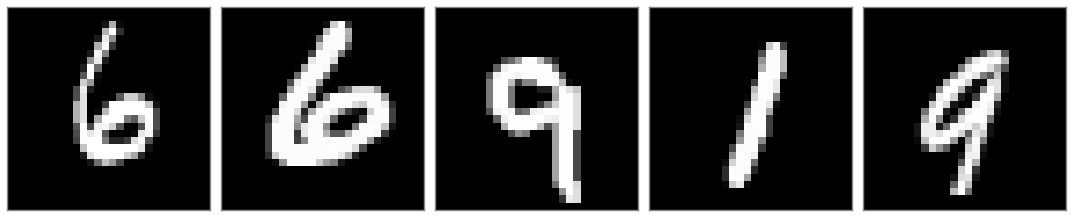

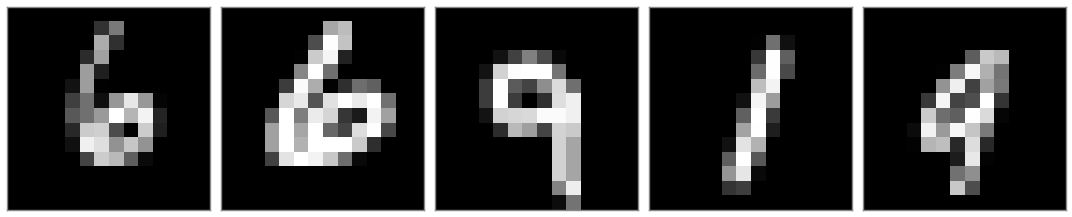

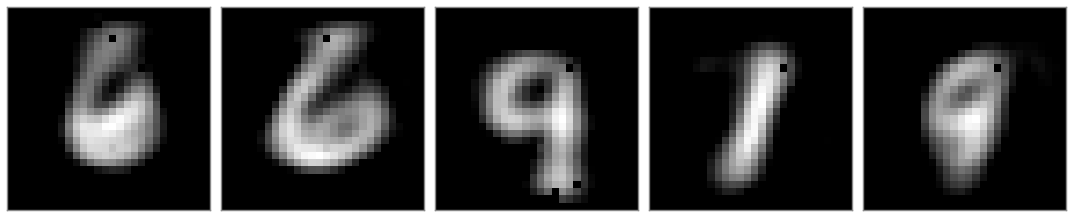

Epoch: 5 / 100	Loss: 0.03251352533698082


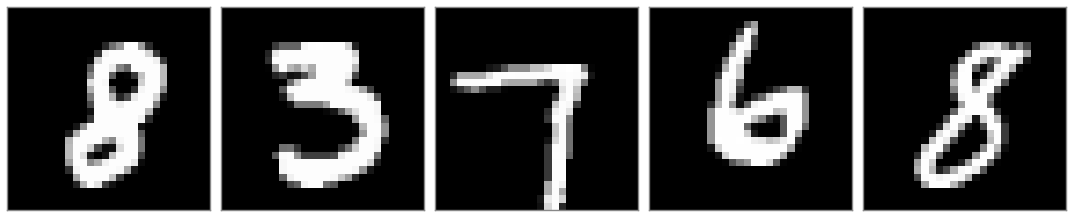

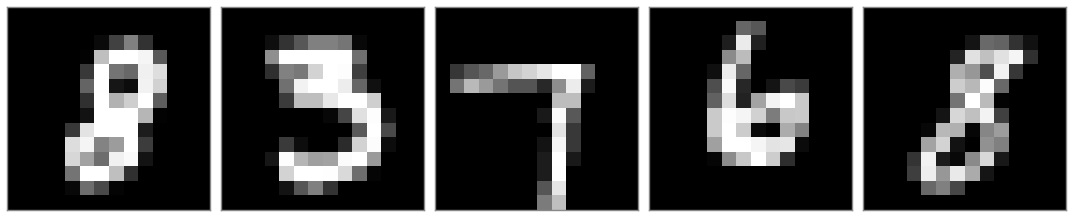

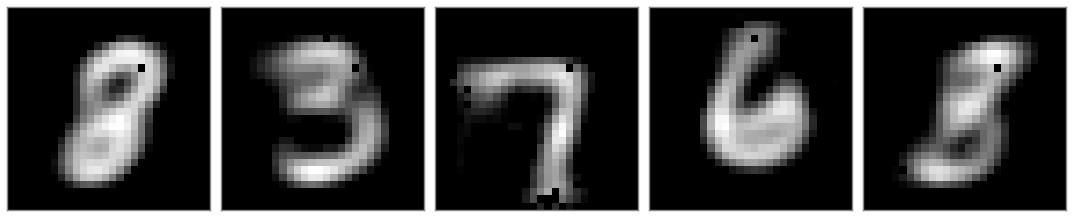

Epoch: 6 / 100	Loss: 0.02816200442612171


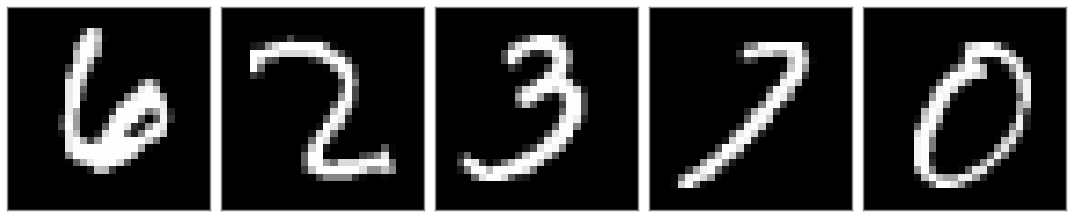

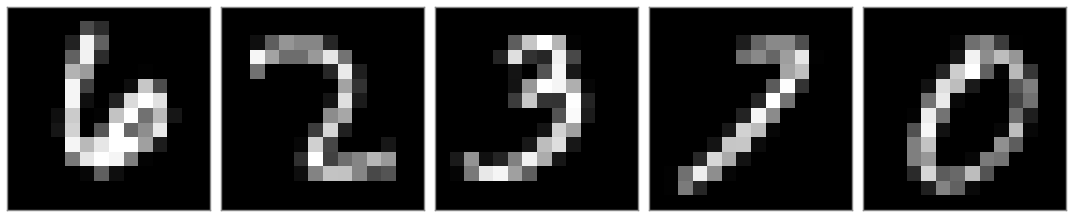

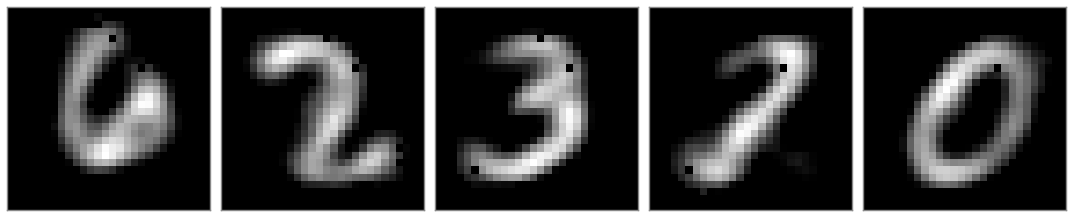

Epoch: 7 / 100	Loss: 0.024752620607614517


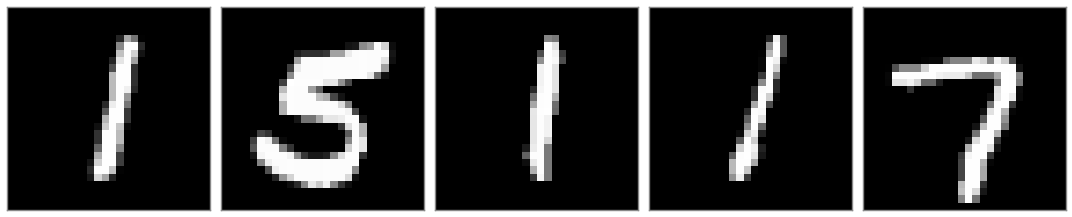

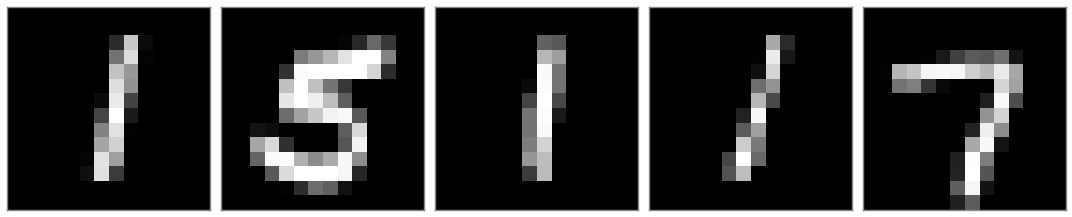

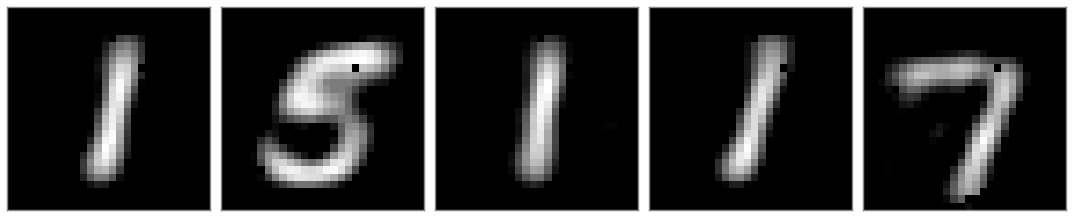

Epoch: 8 / 100	Loss: 0.02250586822628975


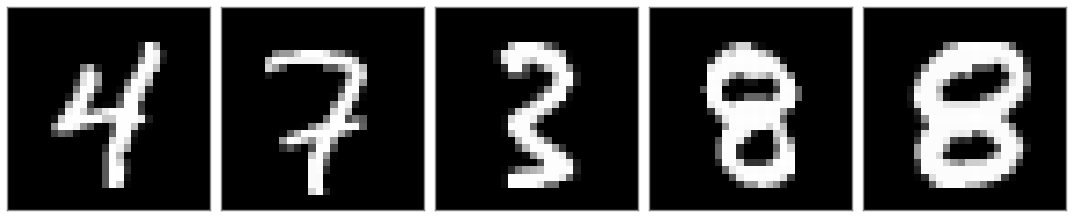

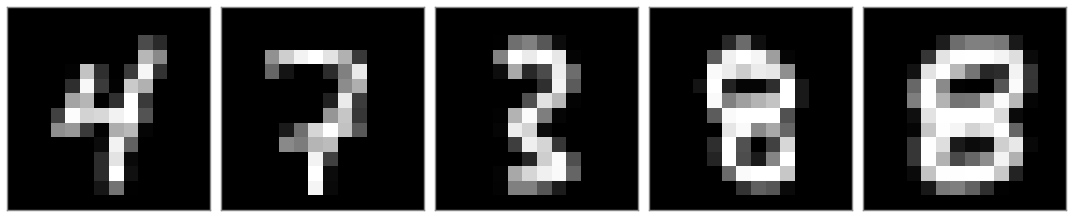

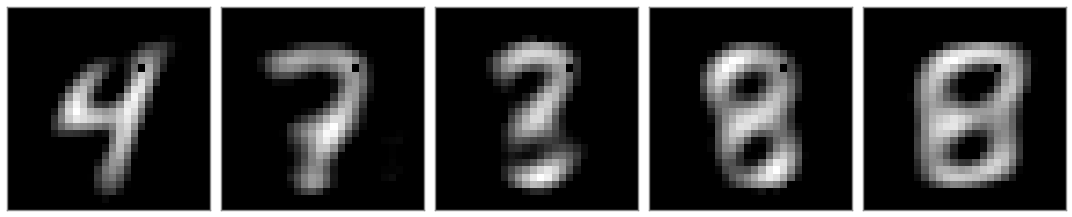

Epoch: 9 / 100	Loss: 0.0204627588391304


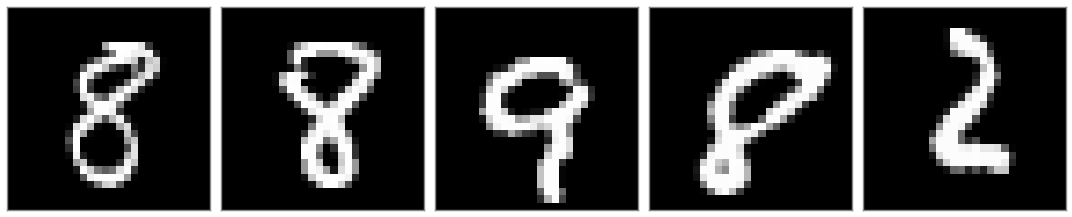

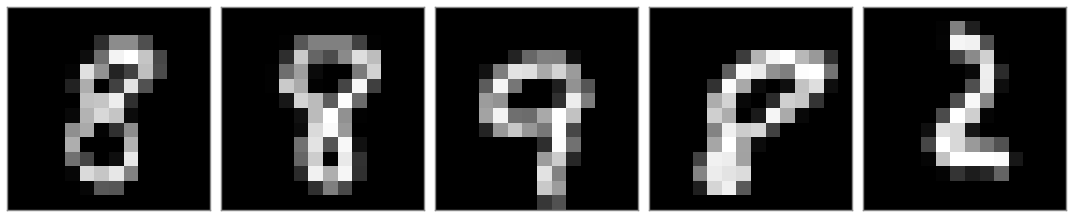

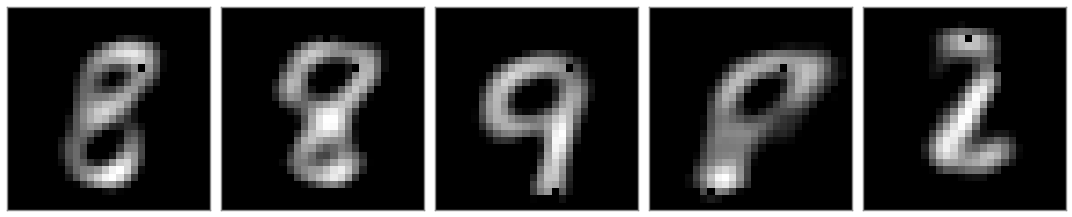

Epoch: 10 / 100	Loss: 0.018665378913283348


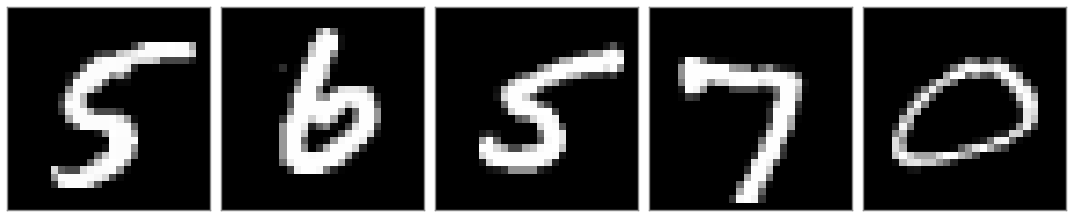

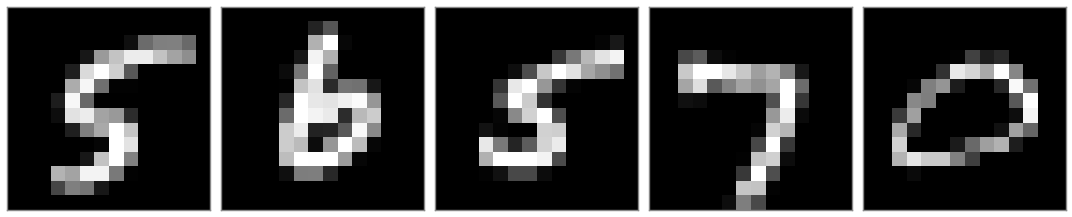

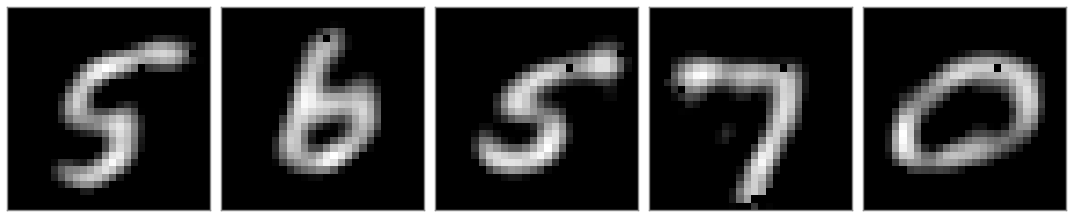

Epoch: 11 / 100	Loss: 0.01709354668855667


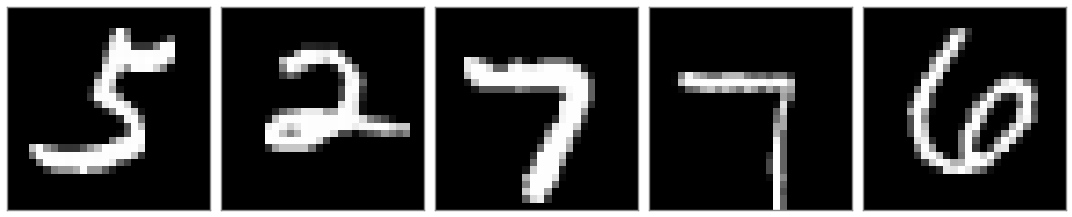

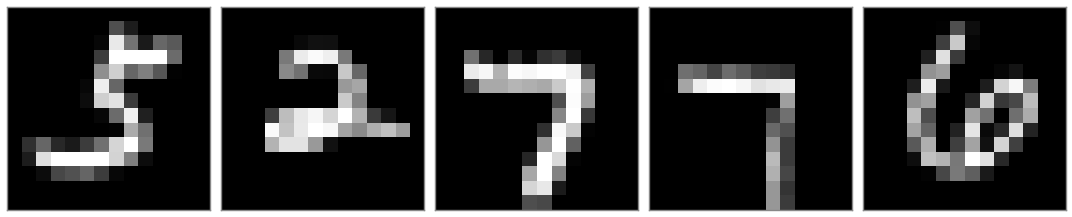

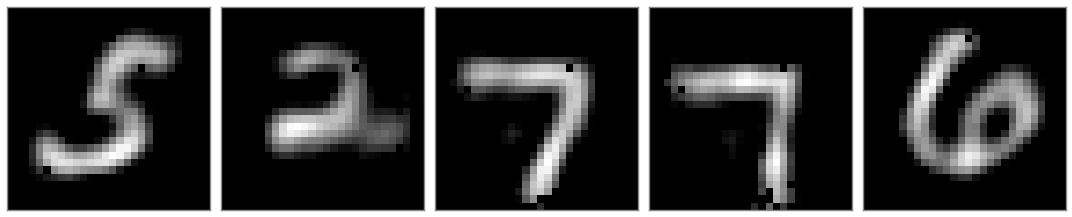

Epoch: 12 / 100	Loss: 0.016303757205605507


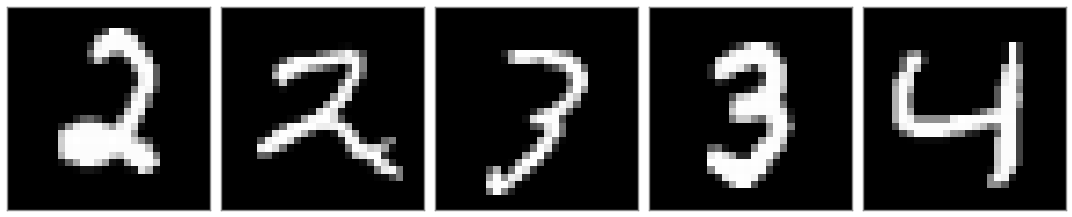

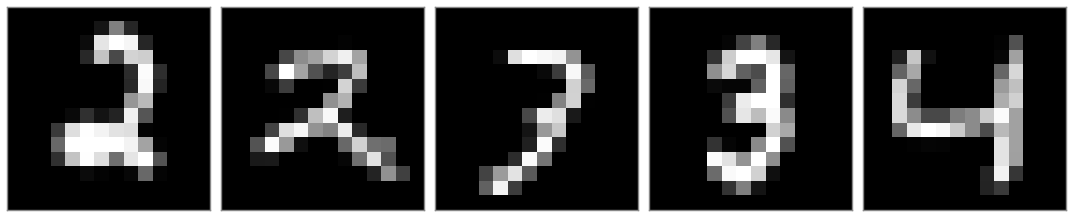

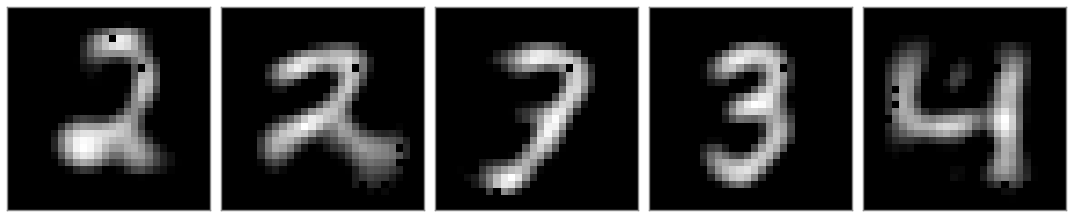

Epoch: 13 / 100	Loss: 0.014765007421374321


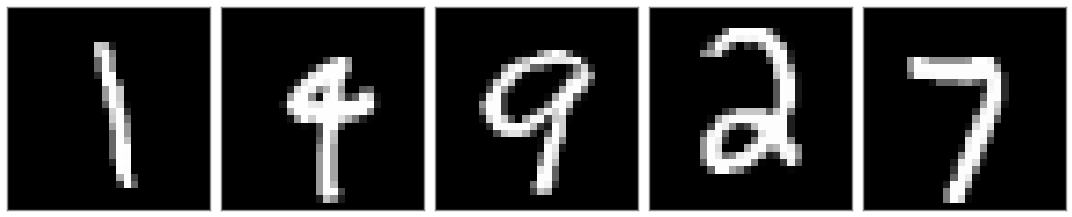

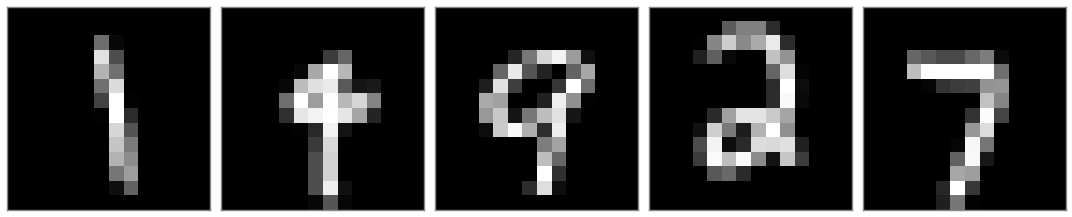

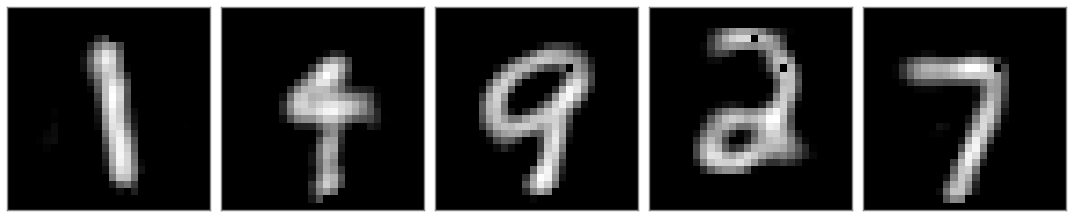

Epoch: 14 / 100	Loss: 0.014278682880103588


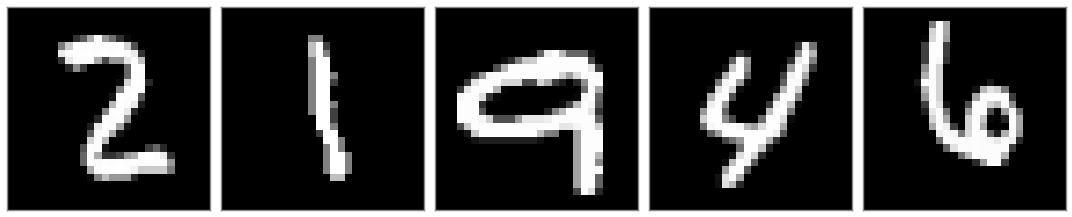

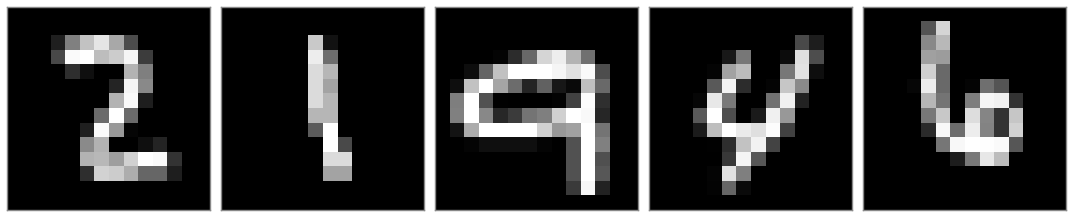

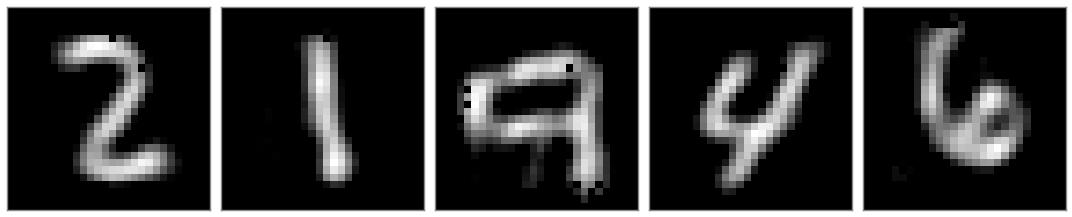

Epoch: 15 / 100	Loss: 0.013233943842351437


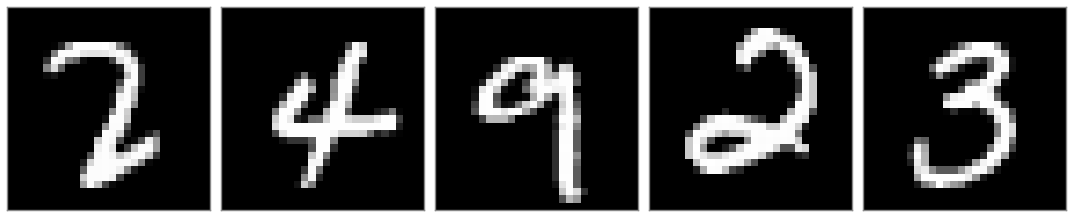

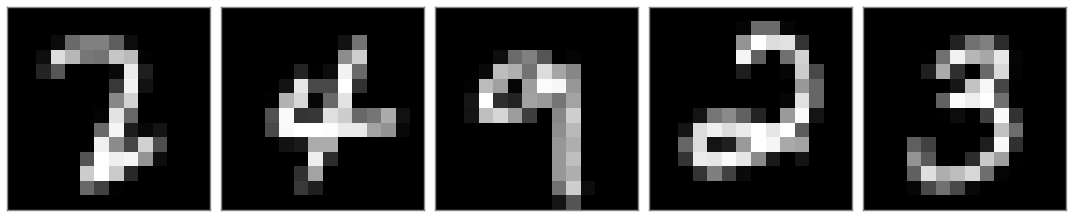

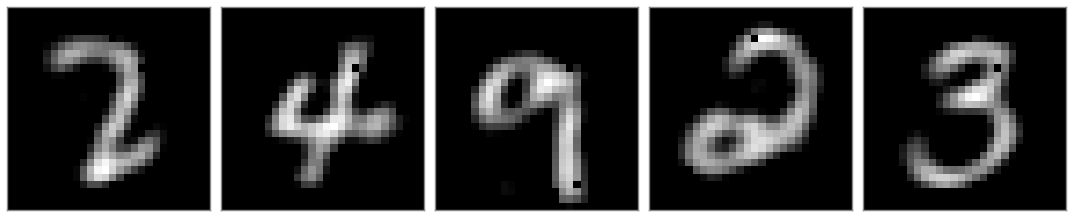

Epoch: 16 / 100	Loss: 0.012929890304803848


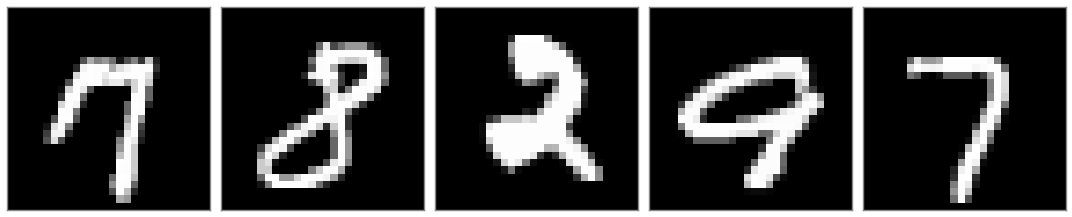

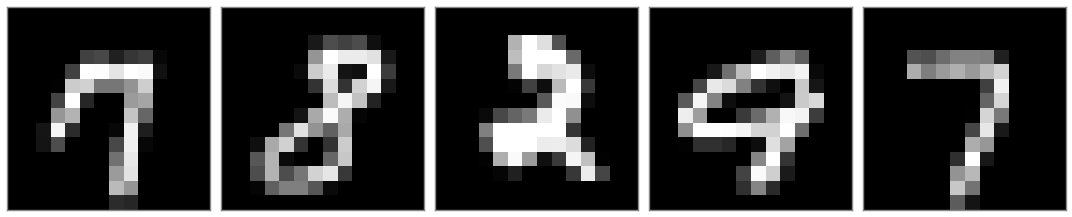

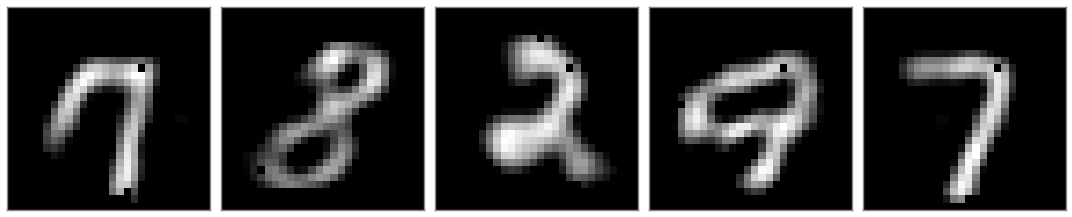

Epoch: 17 / 100	Loss: 0.012109230272471905


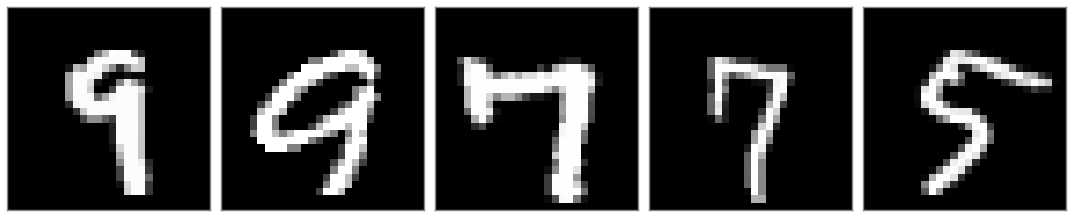

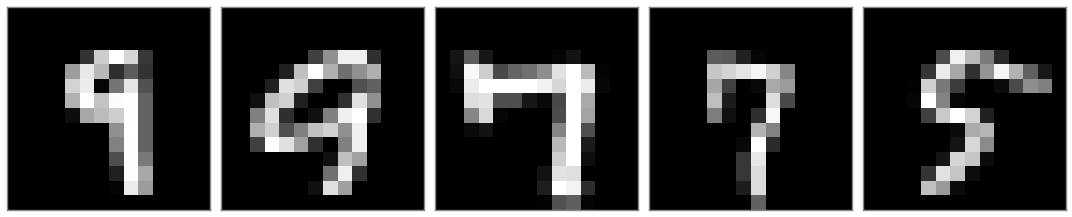

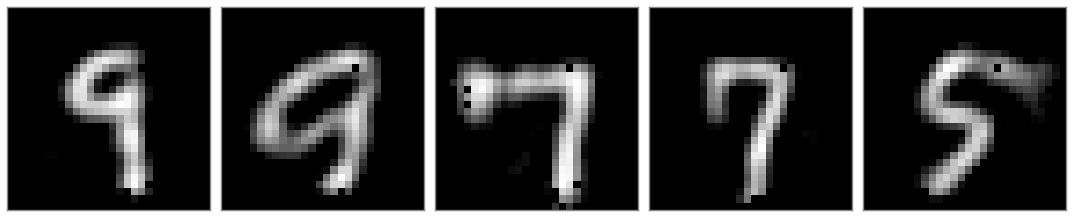

Epoch: 18 / 100	Loss: 0.011020210571587086


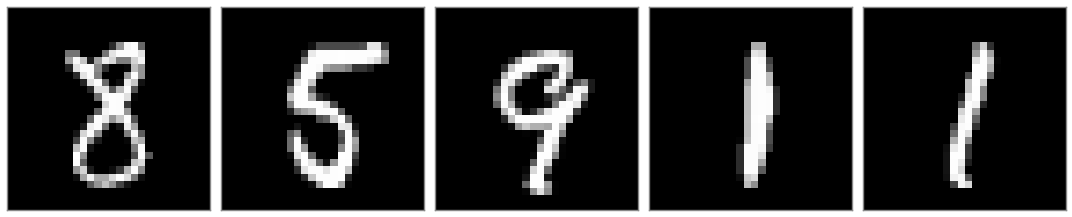

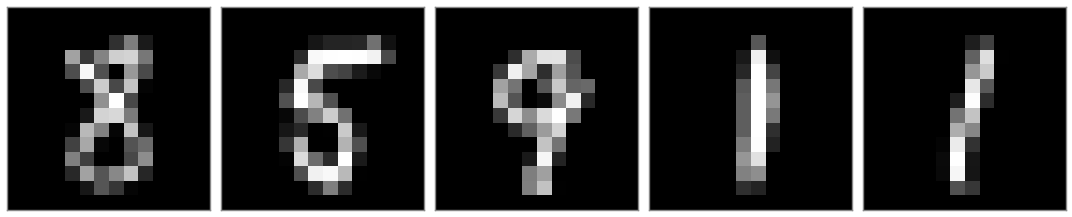

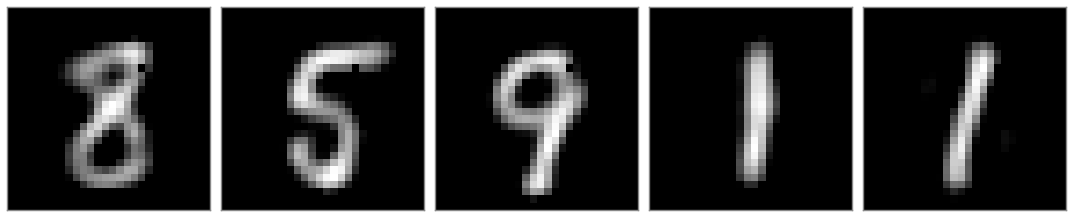

Epoch: 19 / 100	Loss: 0.01138823851943016


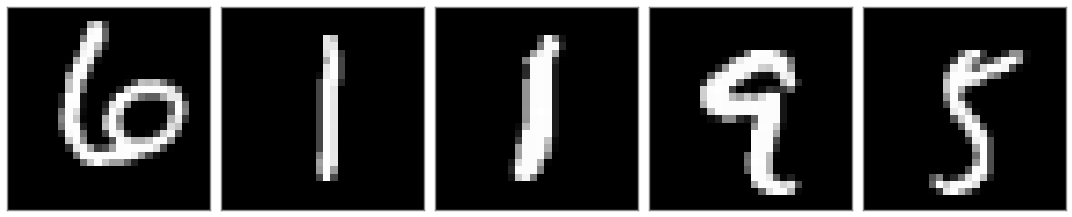

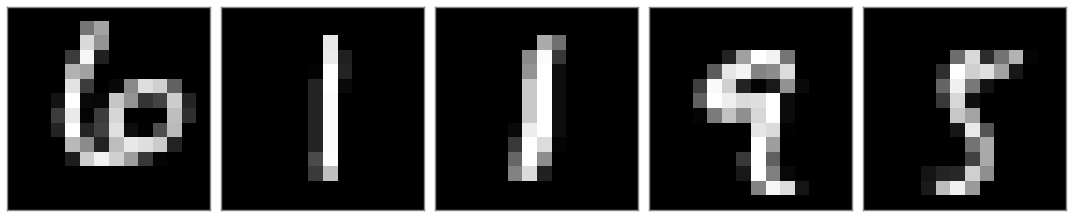

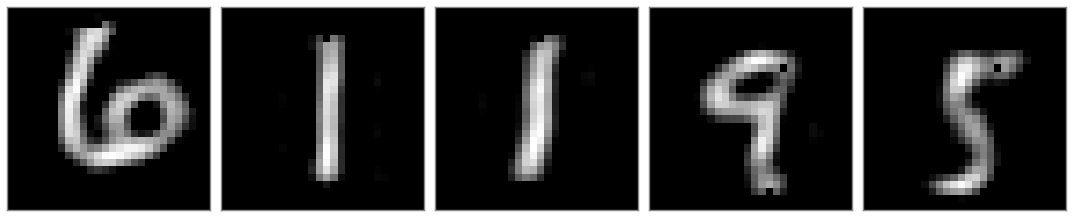

Epoch: 20 / 100	Loss: 0.010492363944649696


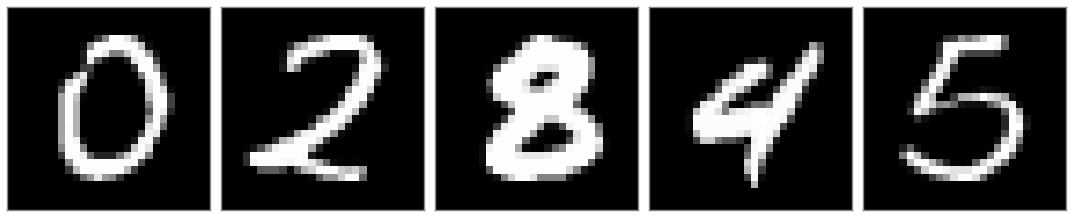

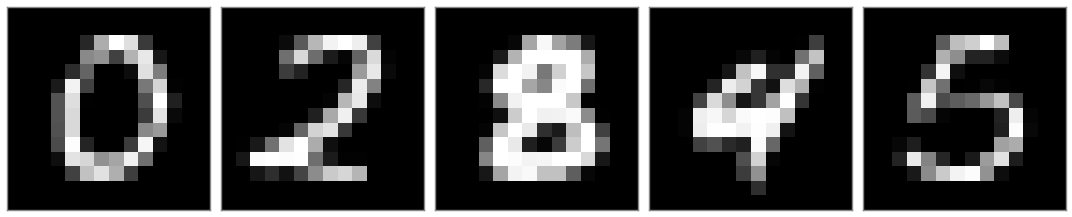

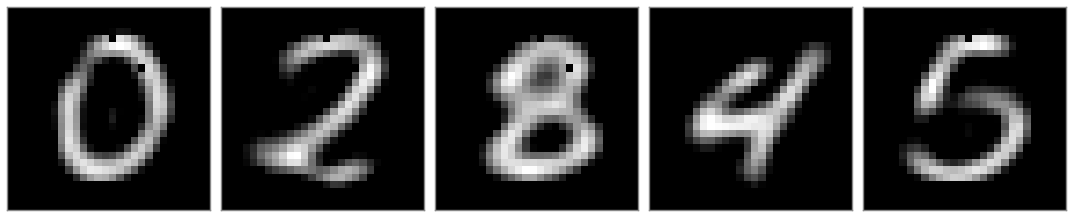

Epoch: 21 / 100	Loss: 0.010370569303631783


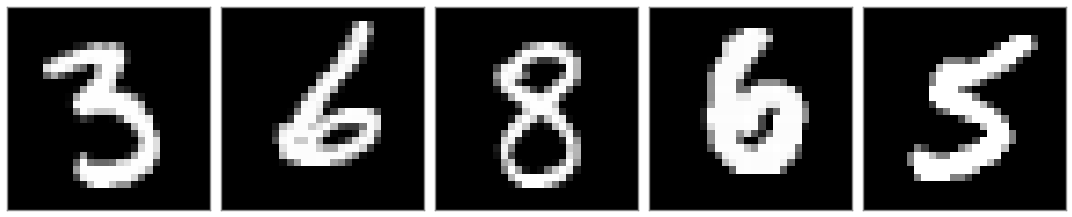

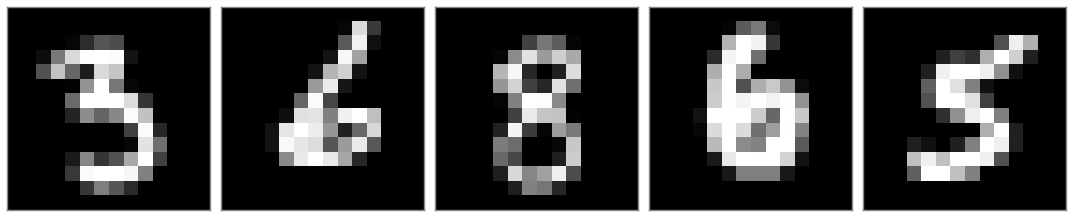

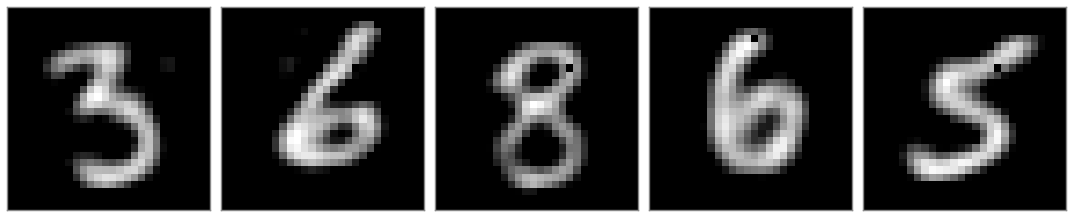

Epoch: 22 / 100	Loss: 0.01014304906129837


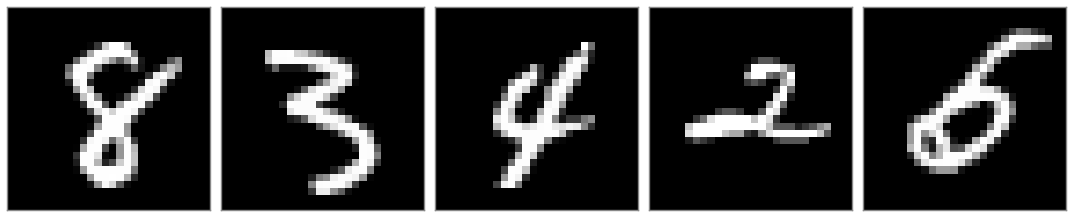

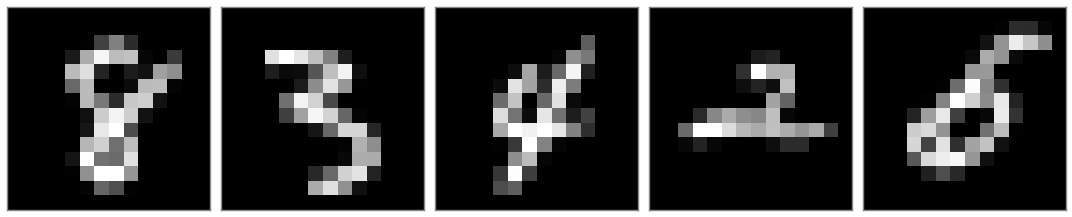

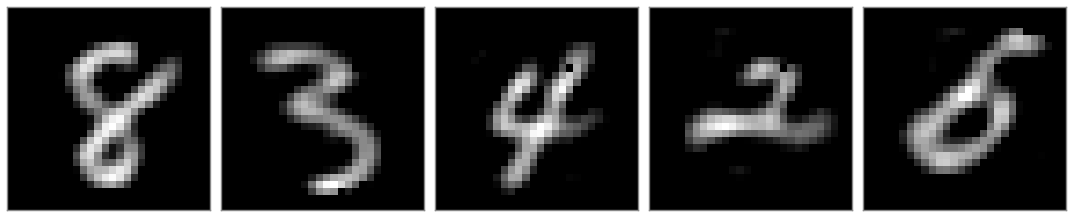

Epoch: 23 / 100	Loss: 0.009630857035517693


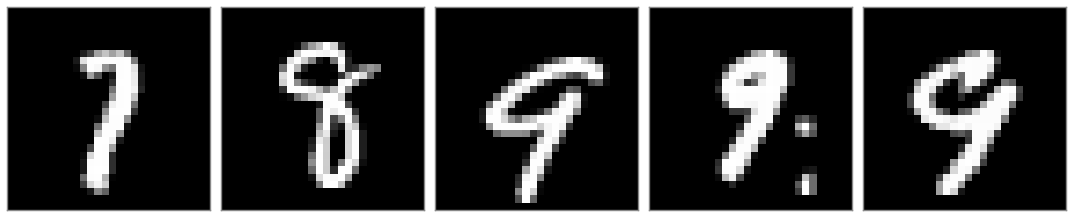

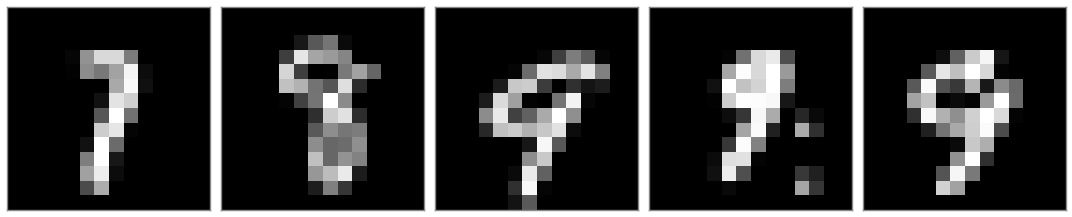

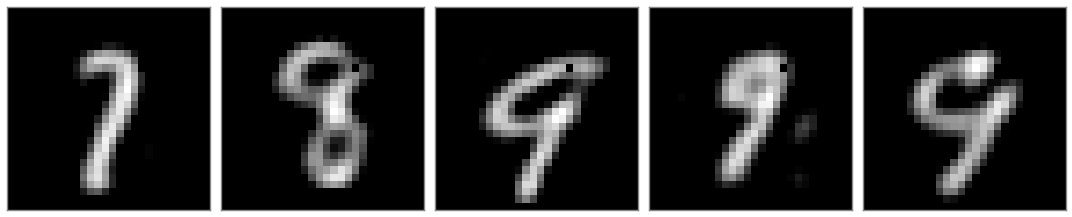

Epoch: 24 / 100	Loss: 0.009435775689780712


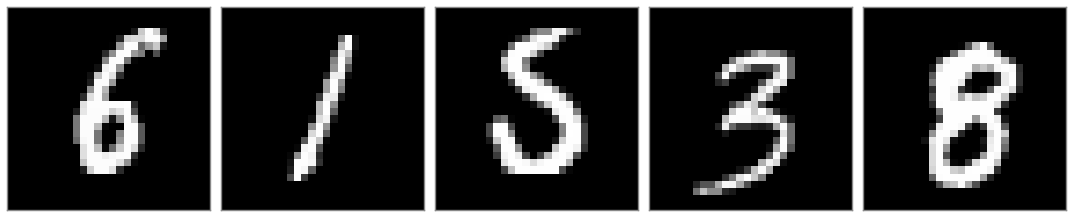

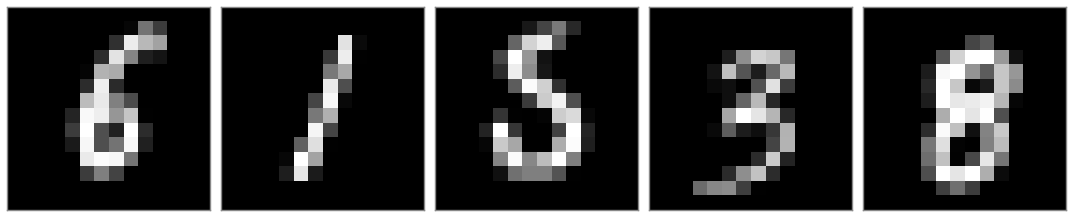

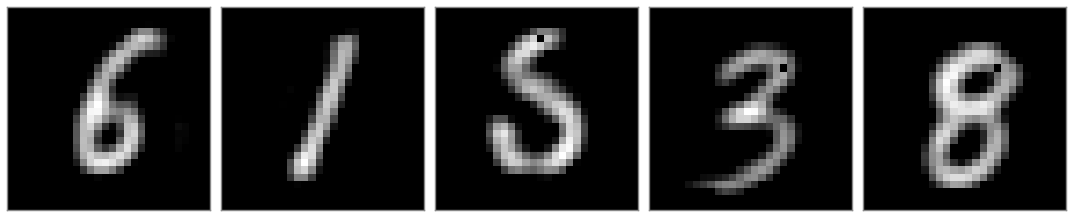

Epoch: 25 / 100	Loss: 0.009336969815194607


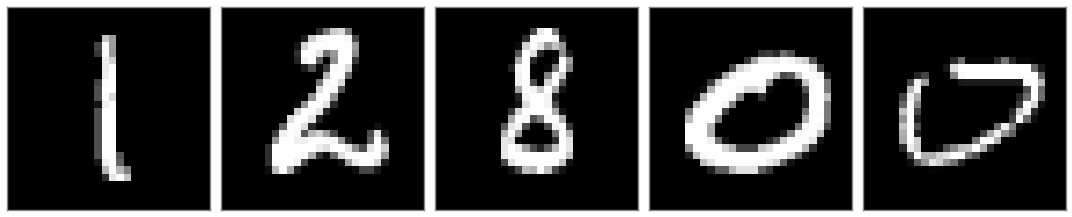

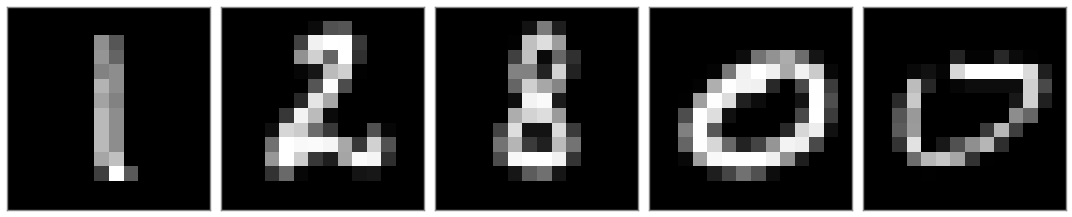

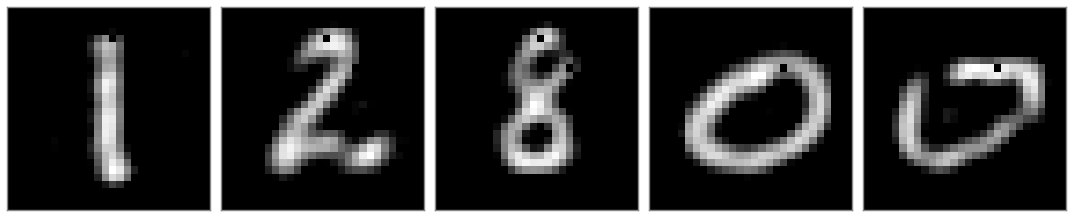

Epoch: 26 / 100	Loss: 0.00894287507981062


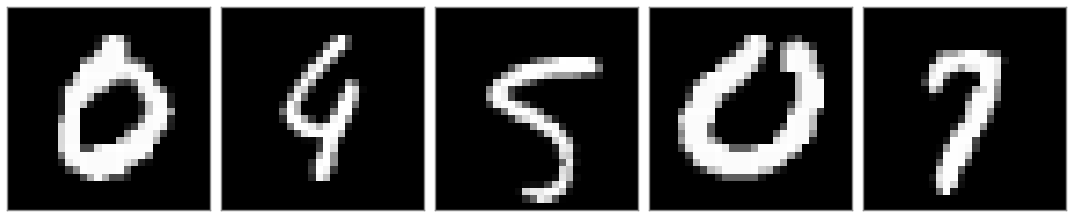

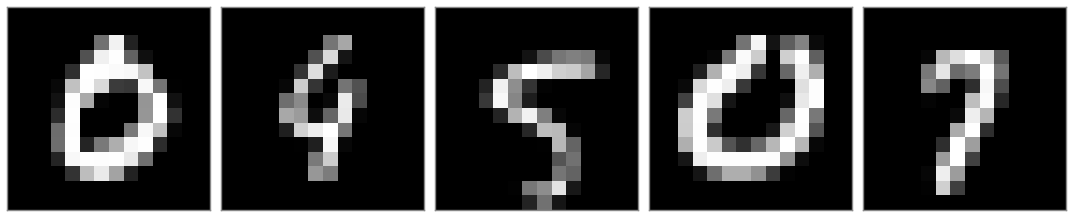

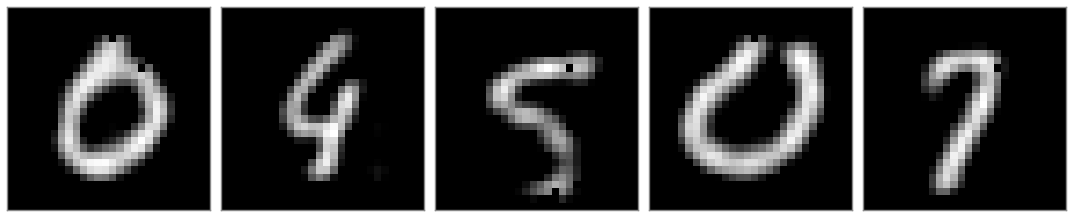

Epoch: 27 / 100	Loss: 0.009275498799979687


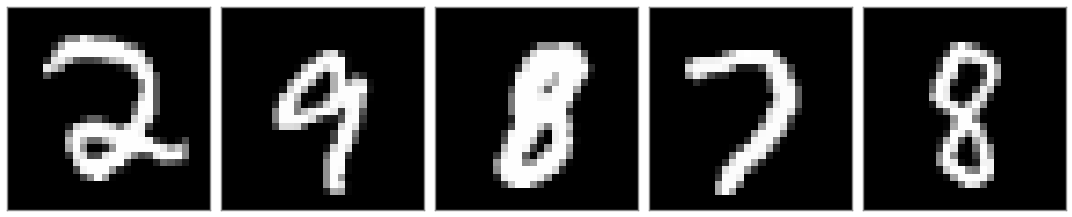

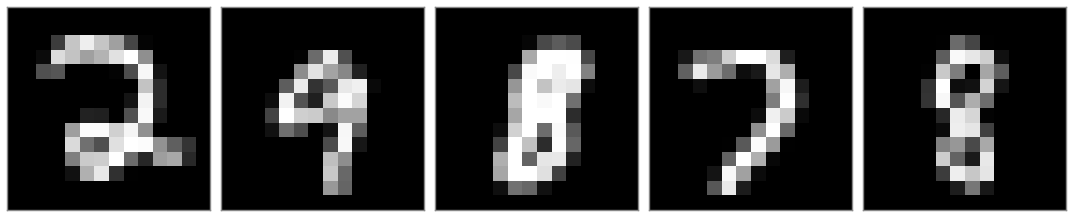

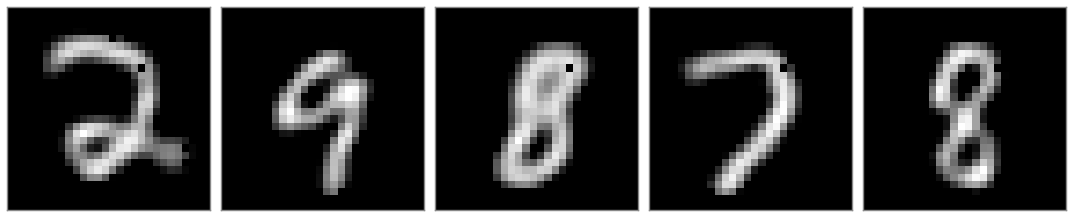

Epoch: 28 / 100	Loss: 0.00870885606855154


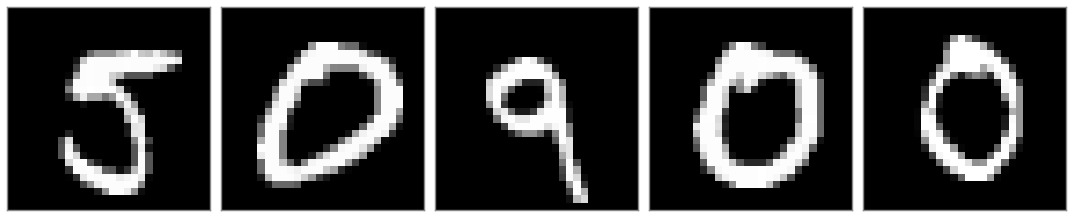

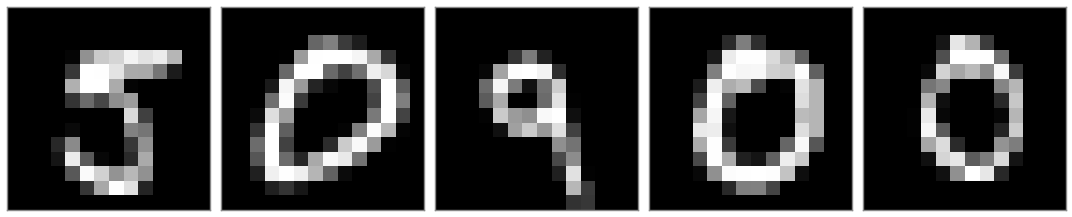

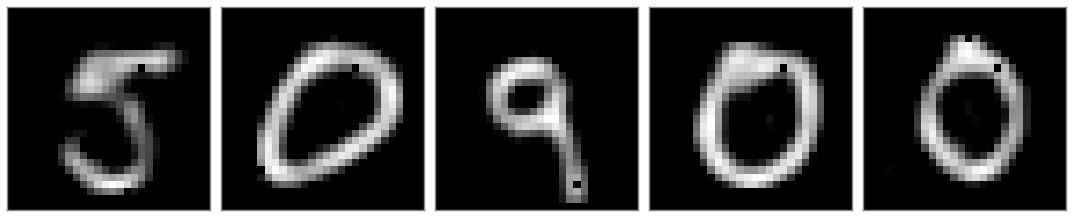

Epoch: 29 / 100	Loss: 0.00874770525842905


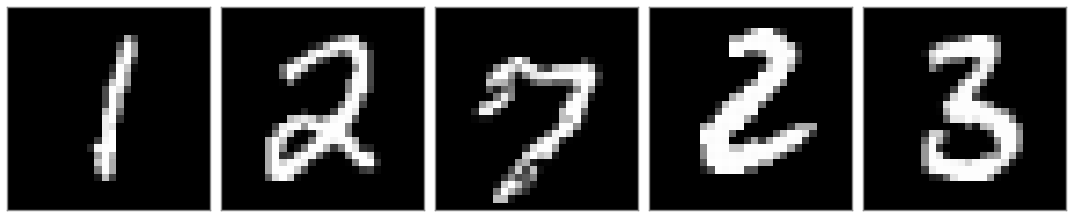

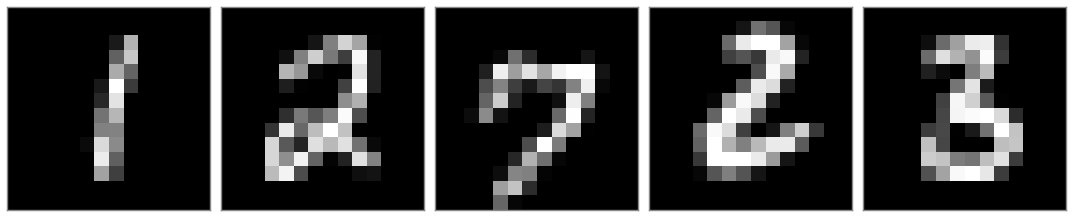

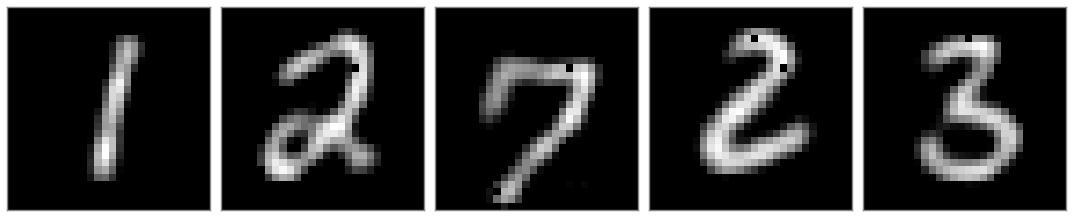

Epoch: 30 / 100	Loss: 0.008670245297253132


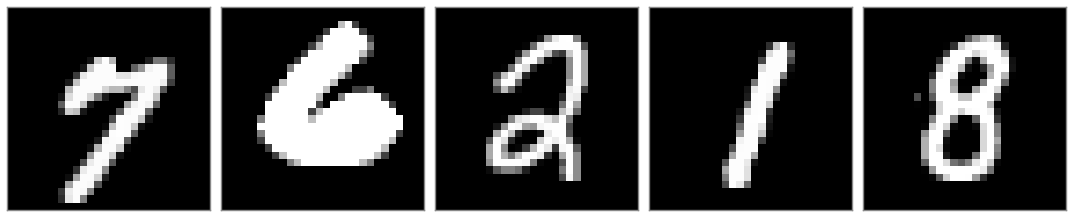

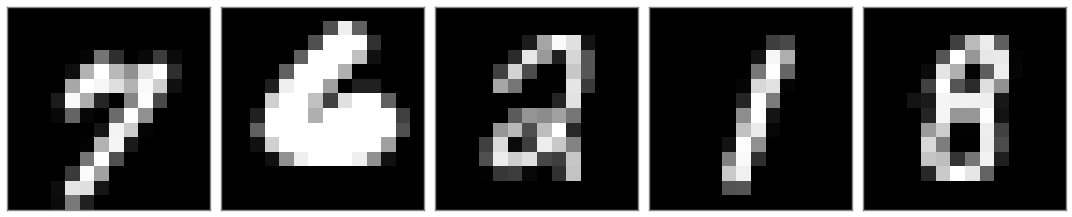

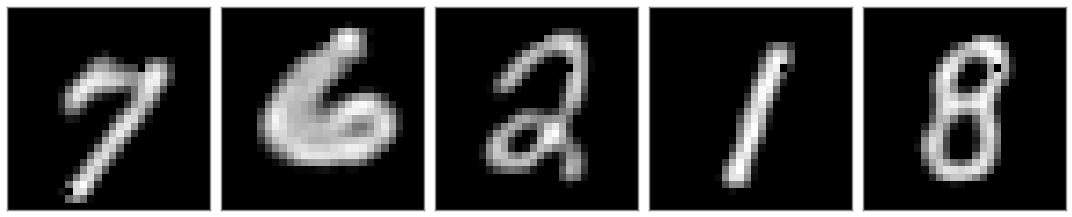

Epoch: 31 / 100	Loss: 0.008593018166720867


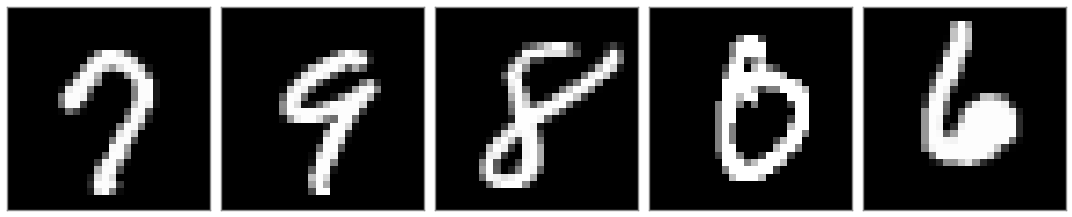

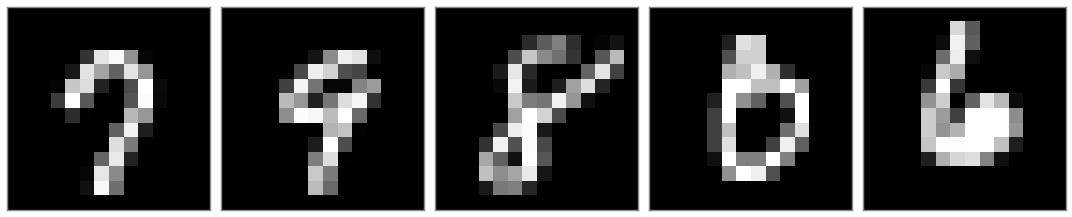

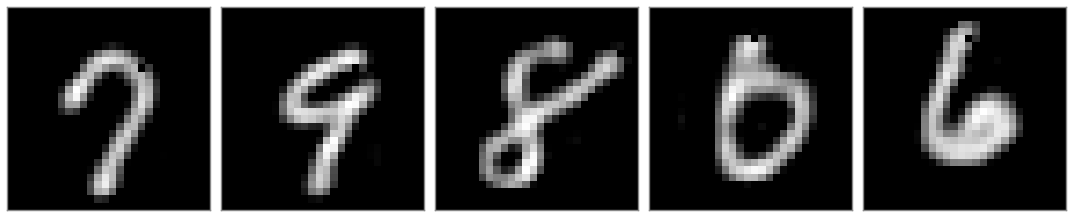

Epoch: 32 / 100	Loss: 0.008113375864923


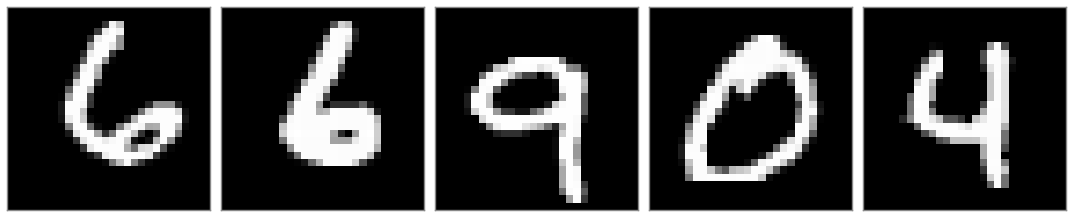

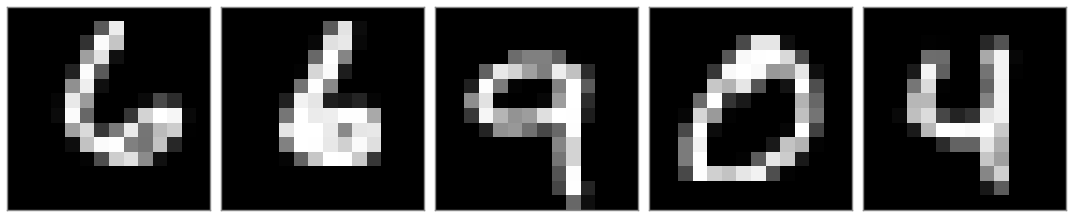

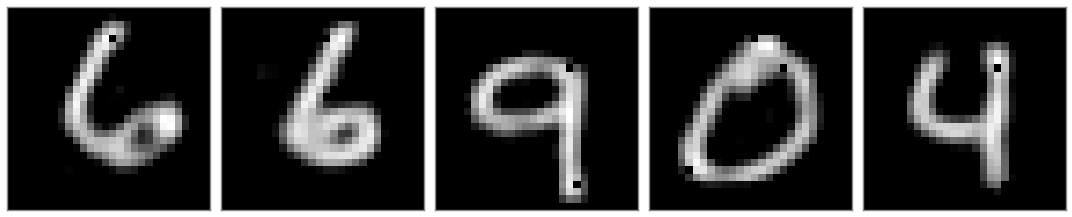

Epoch: 33 / 100	Loss: 0.008149935863912106


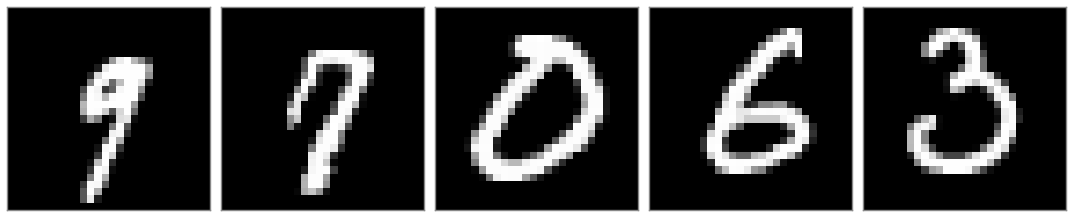

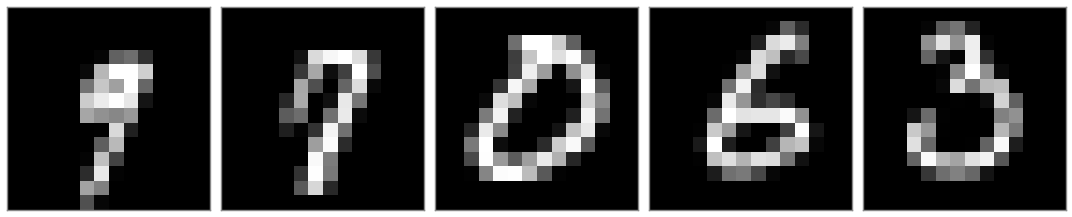

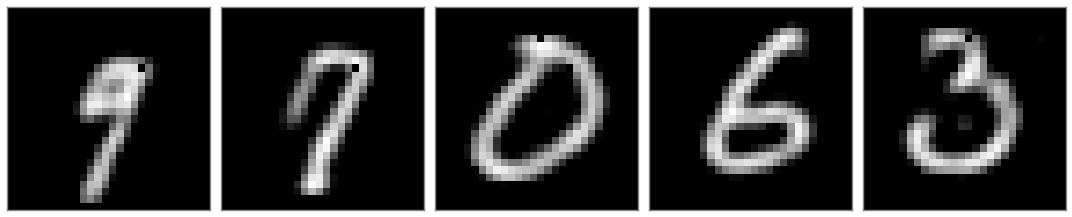

Epoch: 34 / 100	Loss: 0.008180688135325909


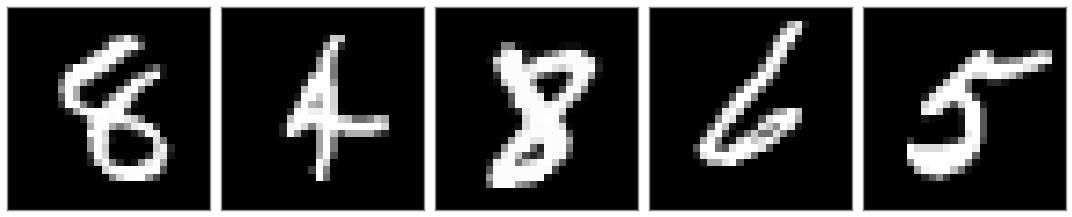

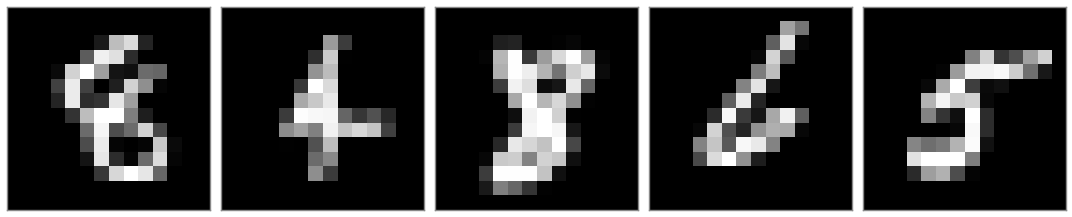

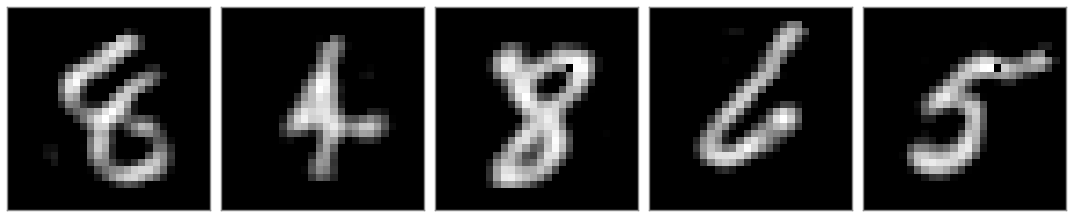

Epoch: 35 / 100	Loss: 0.007551878225058317


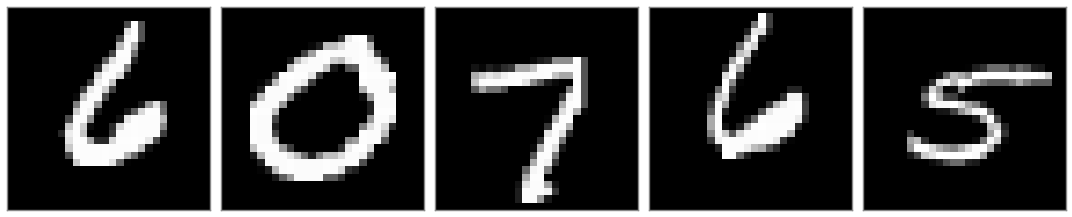

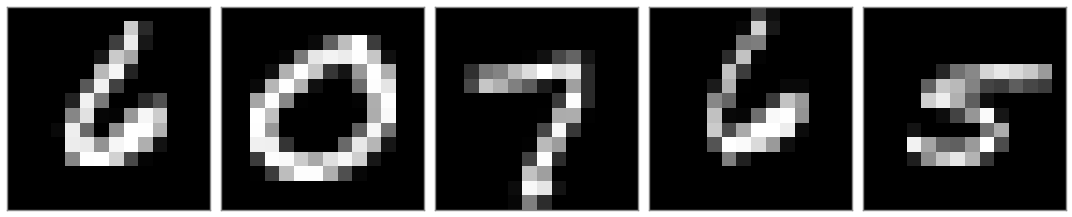

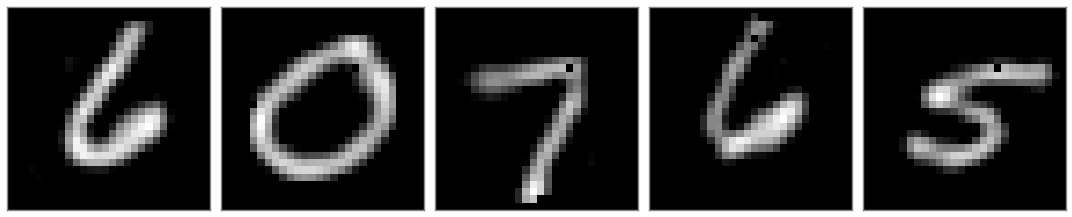

Epoch: 36 / 100	Loss: 0.0074332766234874725


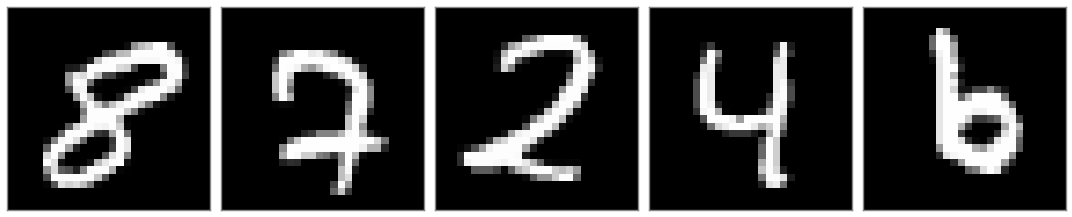

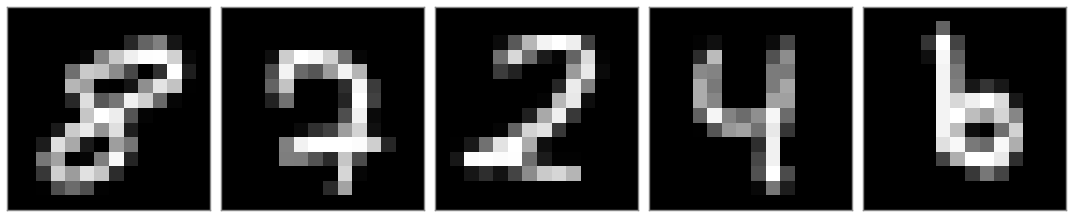

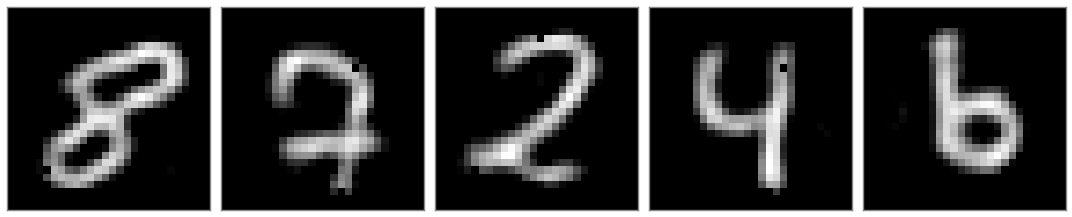

Epoch: 37 / 100	Loss: 0.0076728081330657005


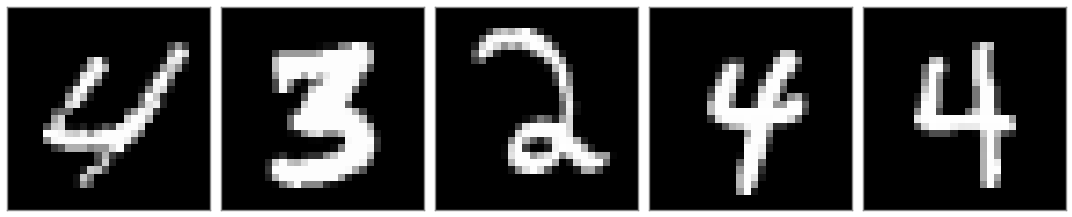

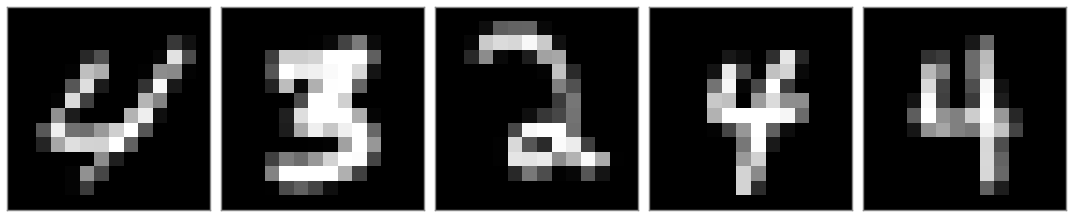

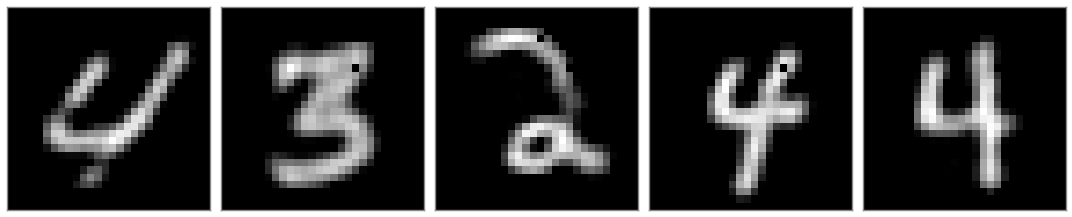

Epoch: 38 / 100	Loss: 0.007697176653891802


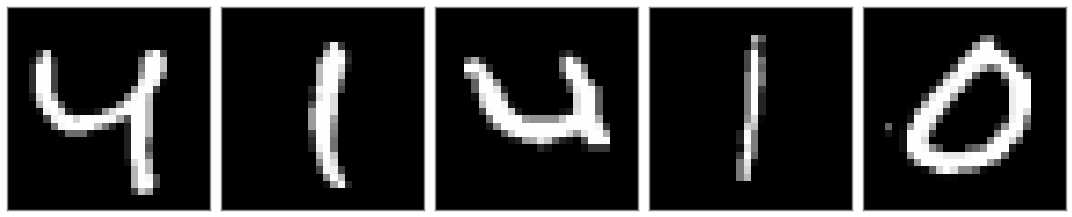

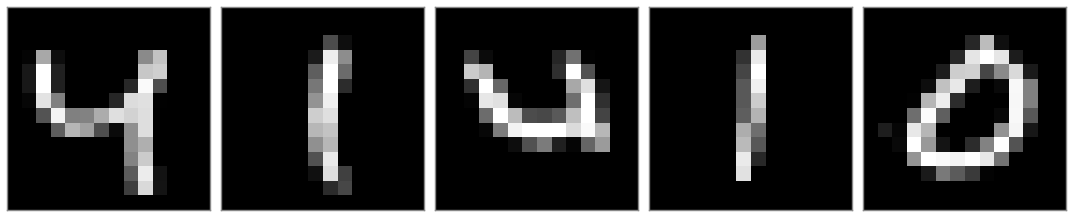

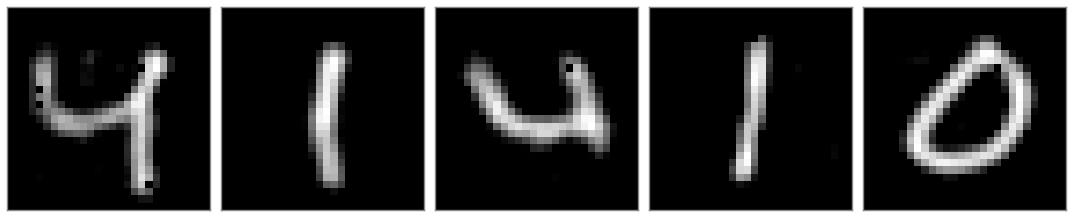

Epoch: 39 / 100	Loss: 0.007325468584895134


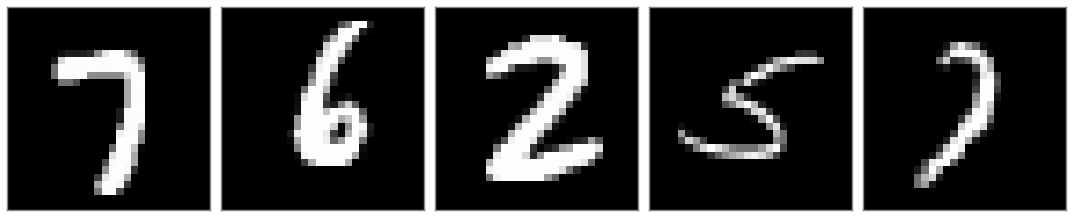

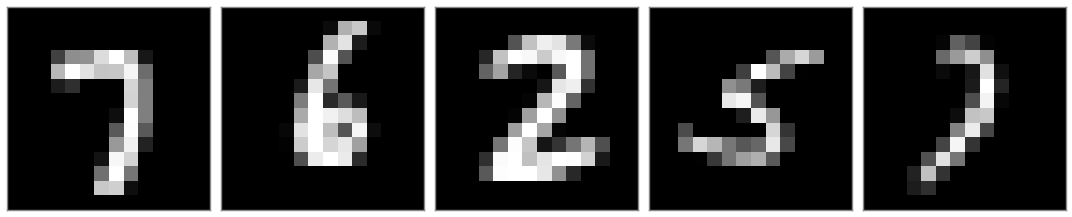

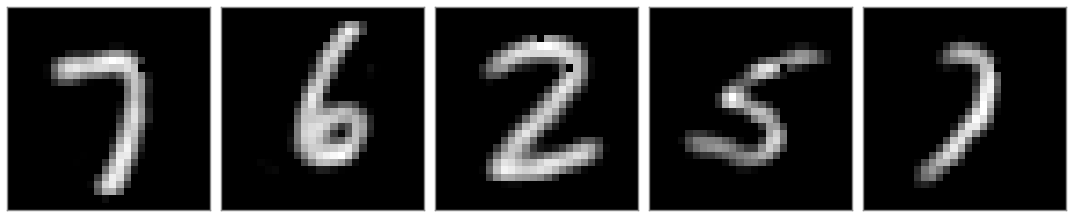

Epoch: 40 / 100	Loss: 0.007561612408608198


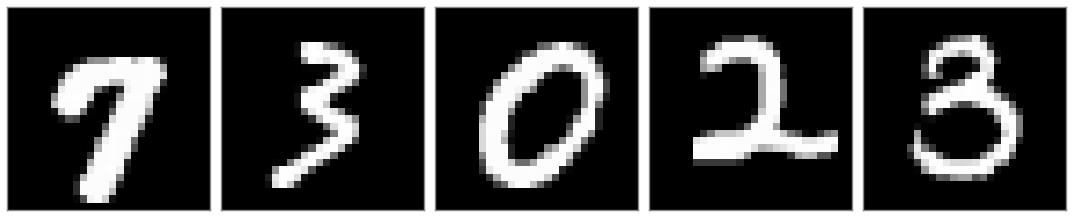

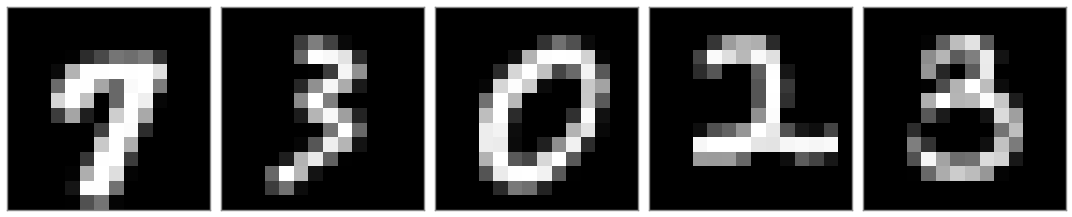

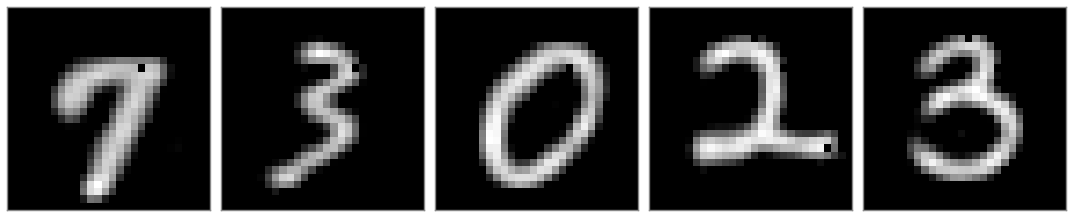

Epoch: 41 / 100	Loss: 0.007240343373268843


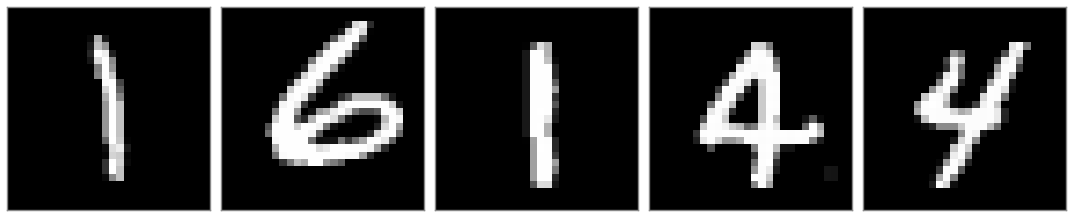

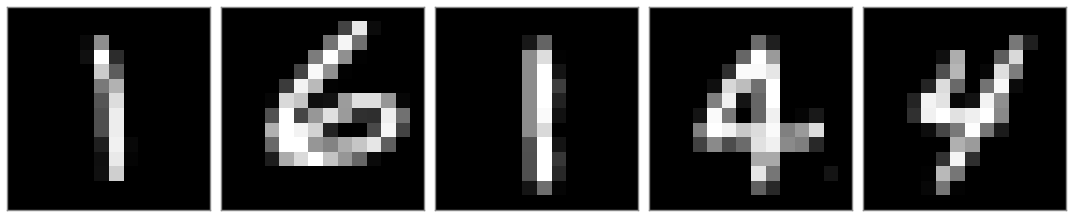

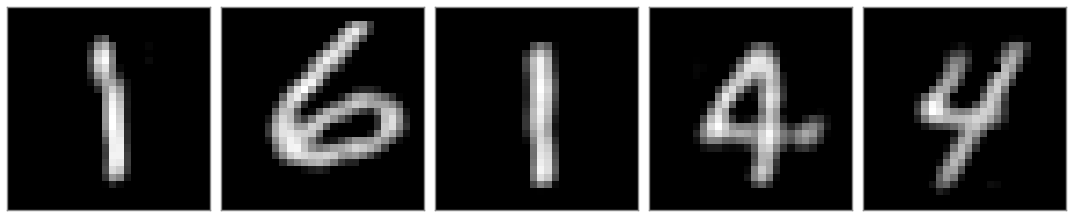

Epoch: 42 / 100	Loss: 0.0074226995930075645


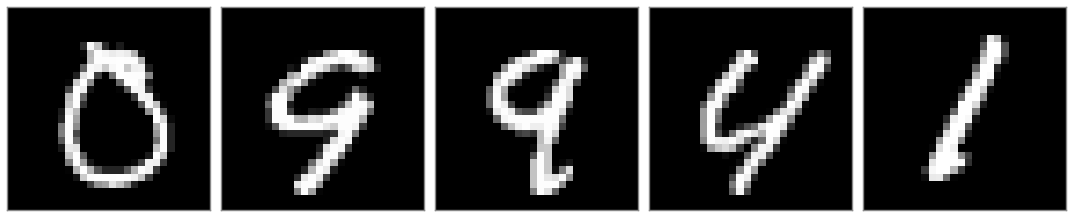

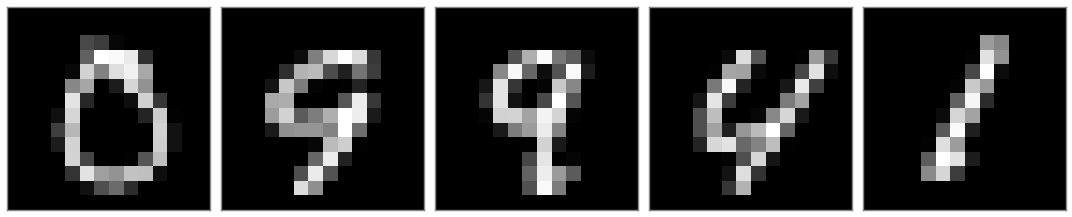

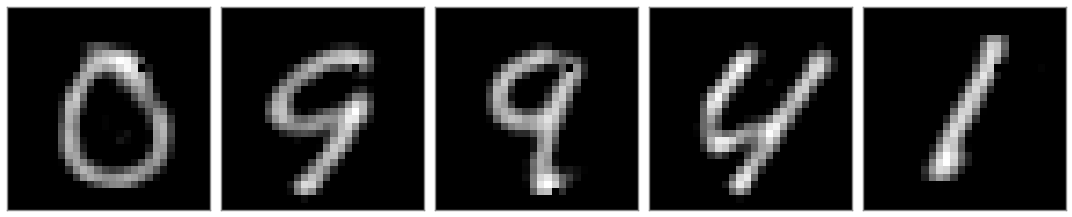

Epoch: 43 / 100	Loss: 0.007540761027485132


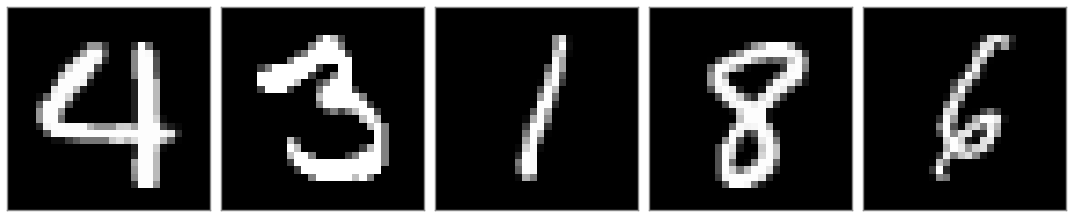

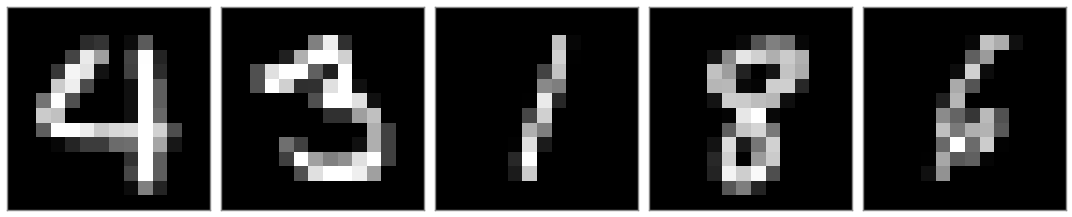

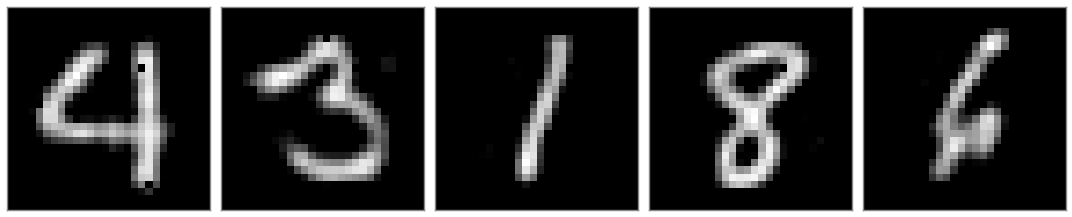

Epoch: 44 / 100	Loss: 0.007380538620054722


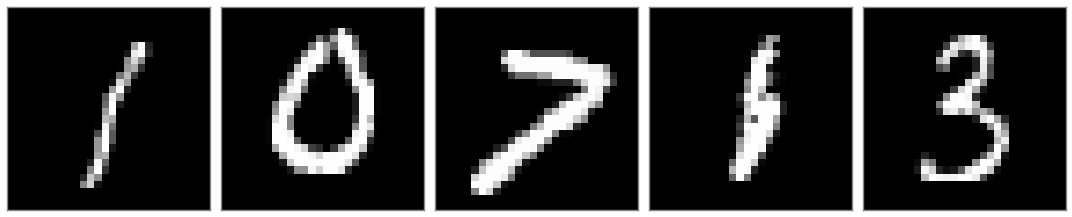

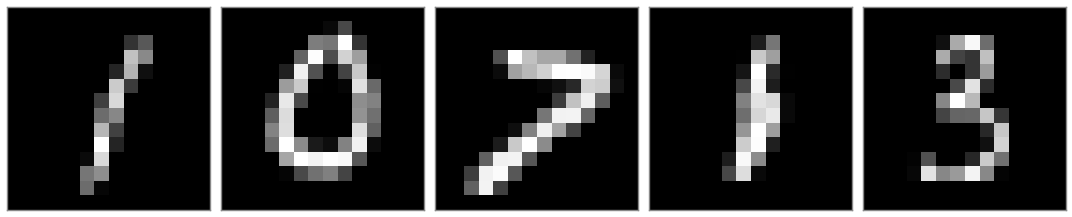

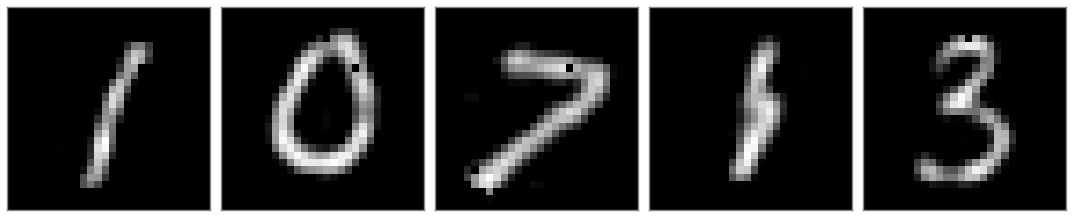

Epoch: 45 / 100	Loss: 0.007160201668739319


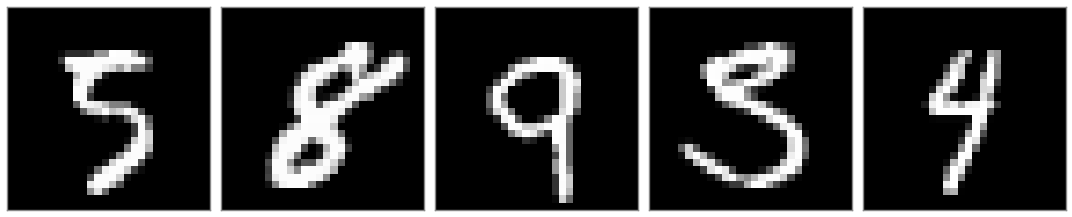

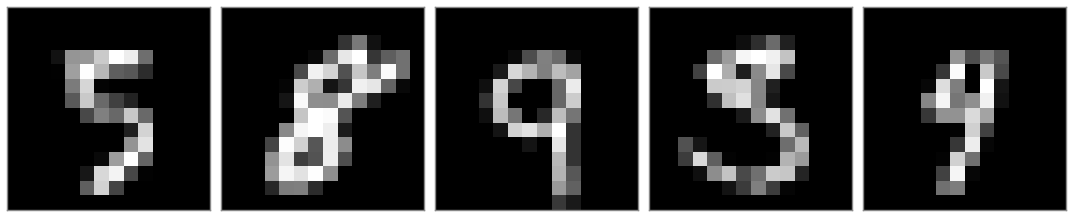

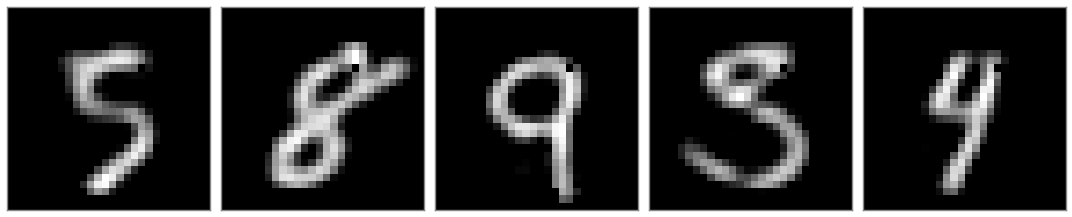

Epoch: 46 / 100	Loss: 0.007255350239574909


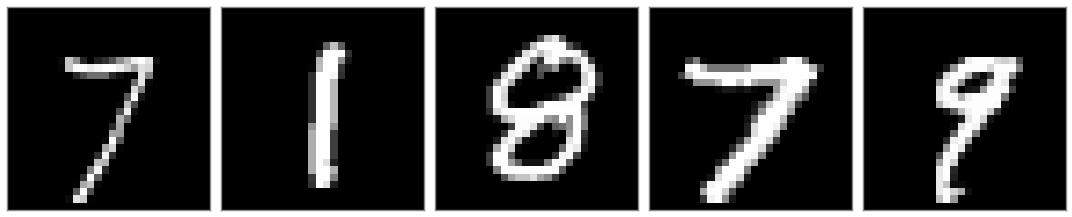

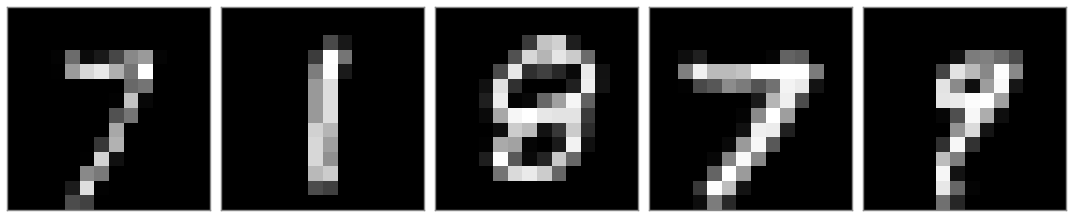

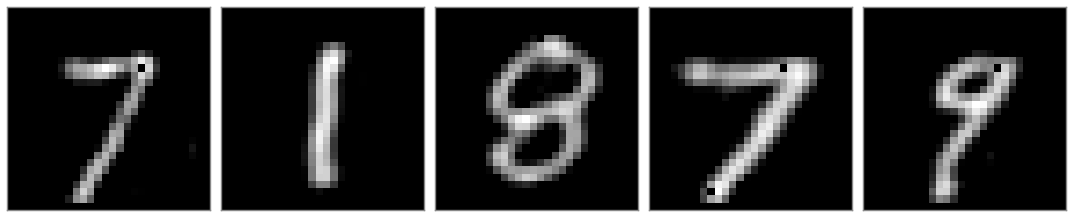

Epoch: 47 / 100	Loss: 0.006850960664451122


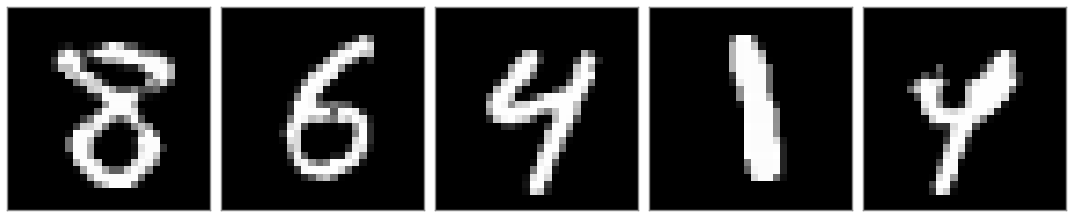

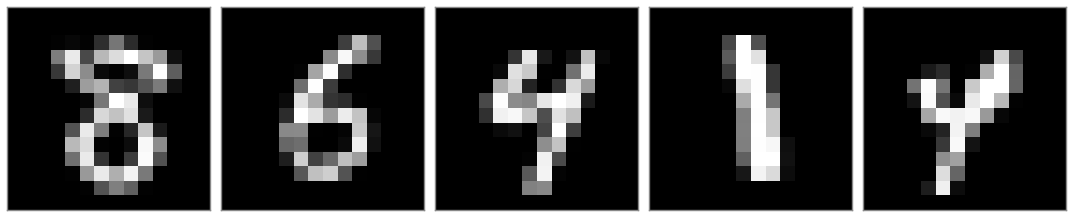

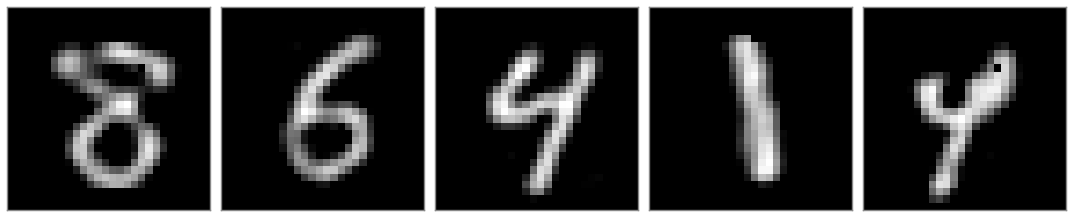

Epoch: 48 / 100	Loss: 0.00693120714277029


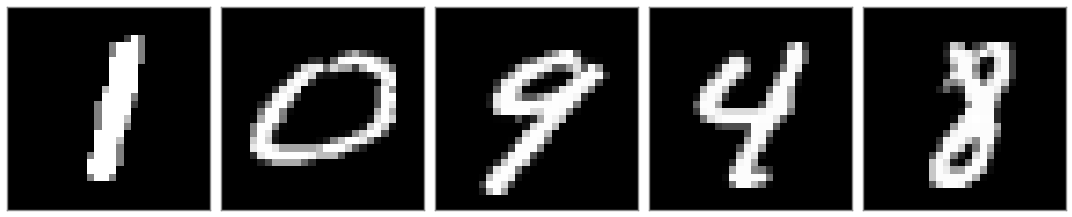

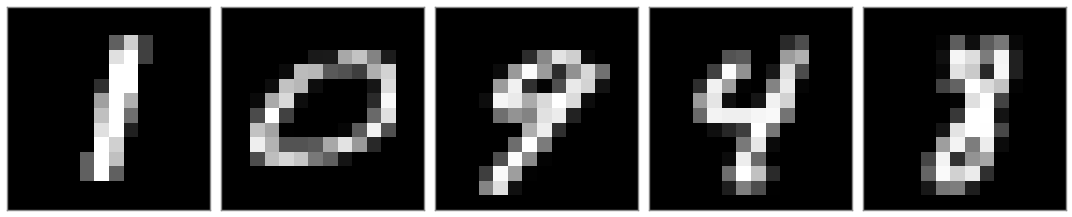

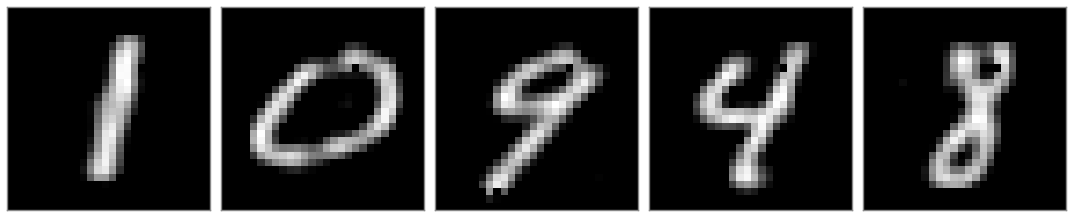

Epoch: 49 / 100	Loss: 0.0068956357426941395


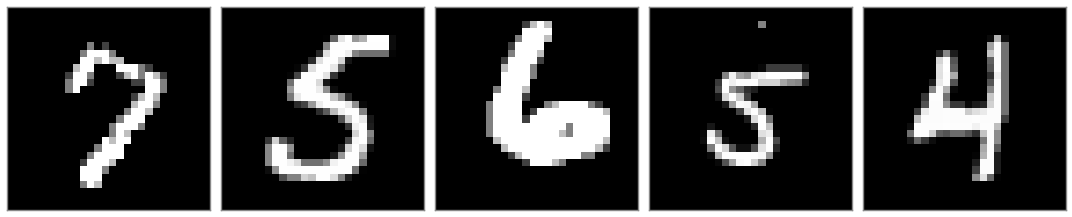

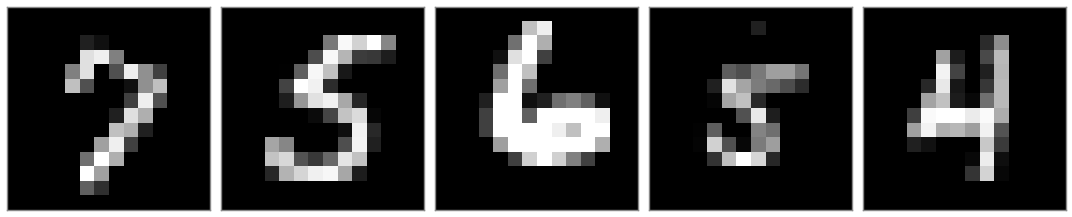

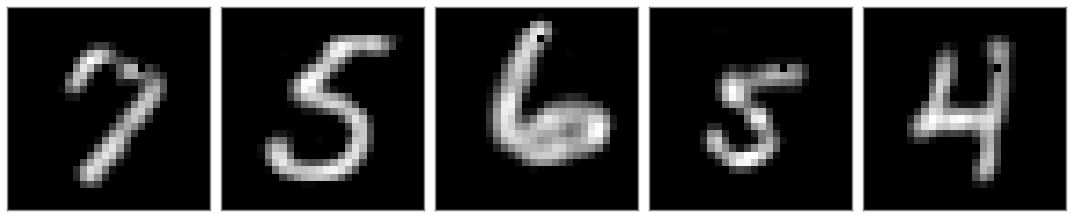

Epoch: 50 / 100	Loss: 0.007142944727092981


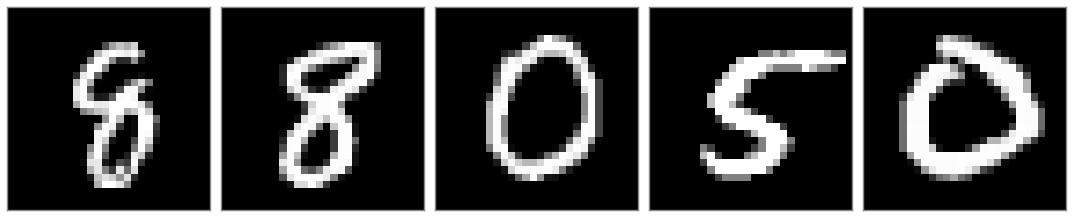

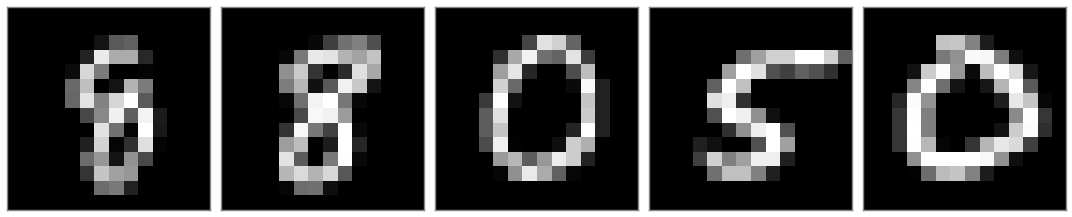

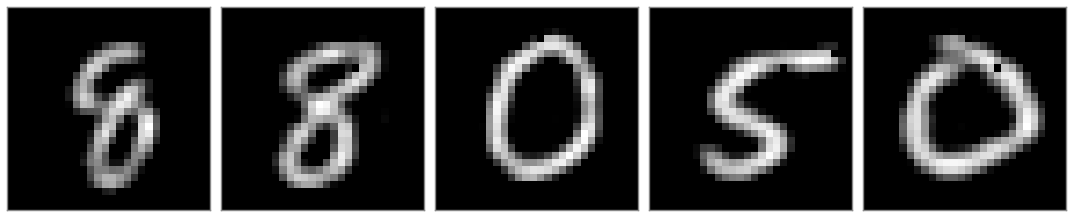

Epoch: 51 / 100	Loss: 0.006837287452071905


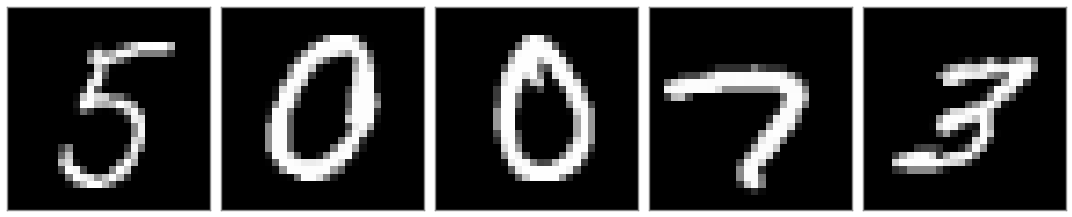

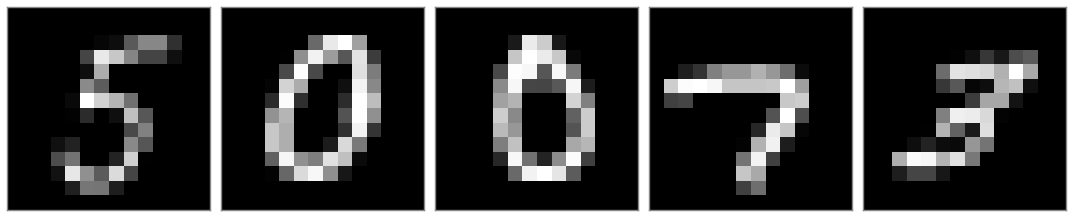

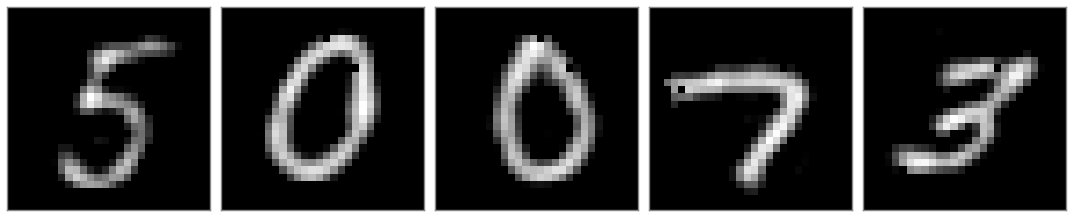

Epoch: 52 / 100	Loss: 0.006867078132927418


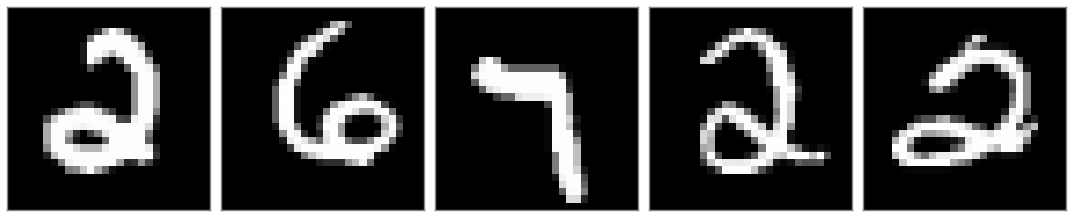

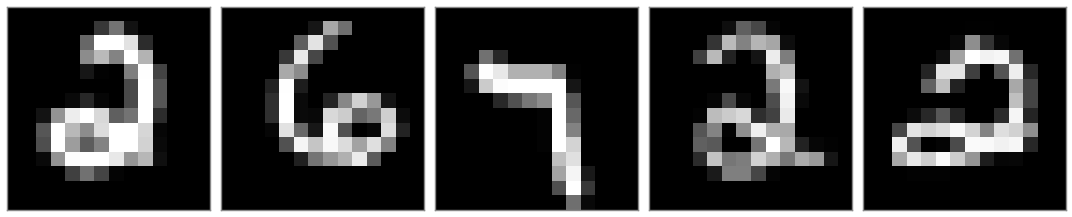

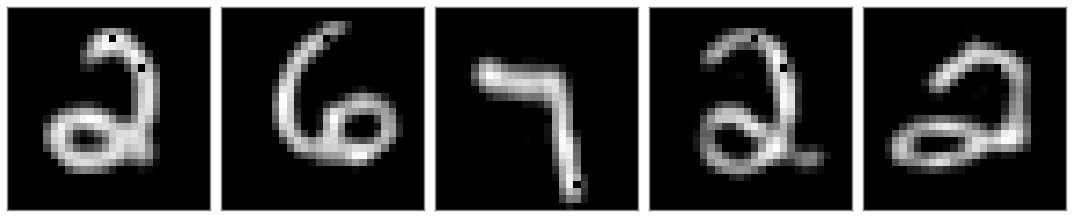

Epoch: 53 / 100	Loss: 0.006884714122861624


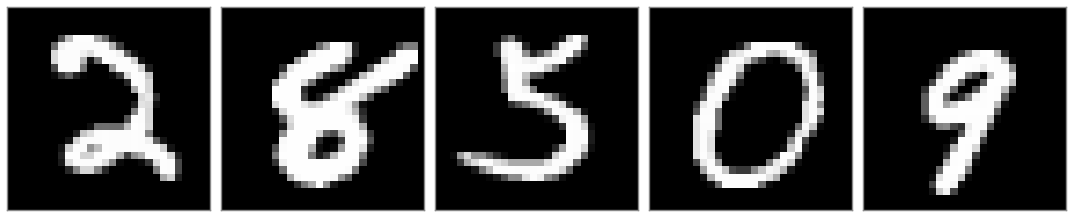

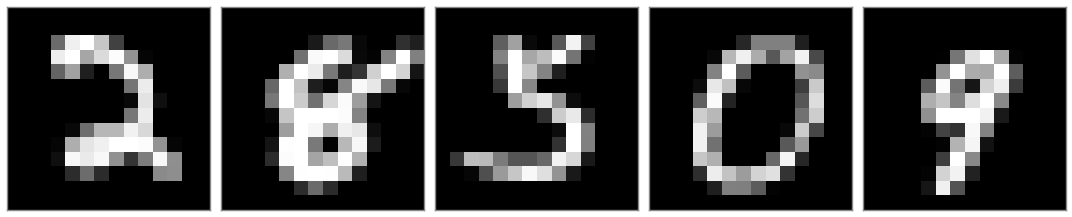

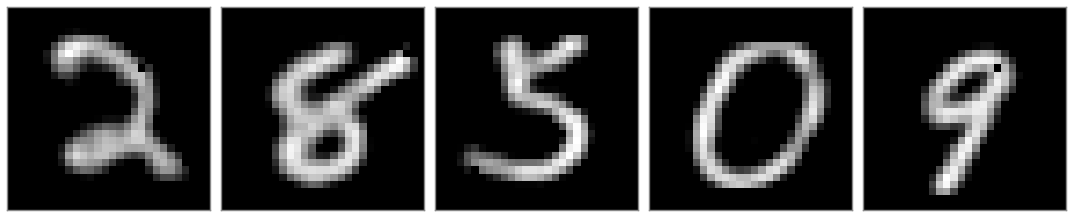

Epoch: 54 / 100	Loss: 0.006991175003349781


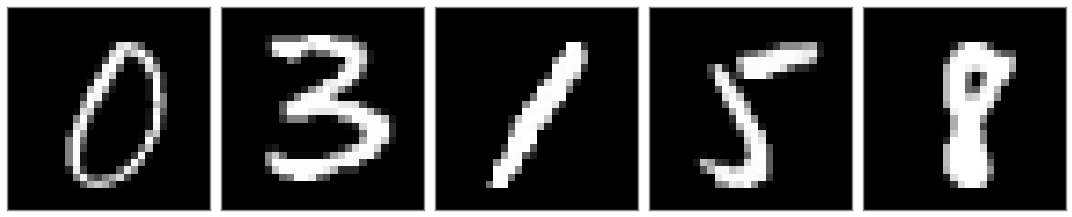

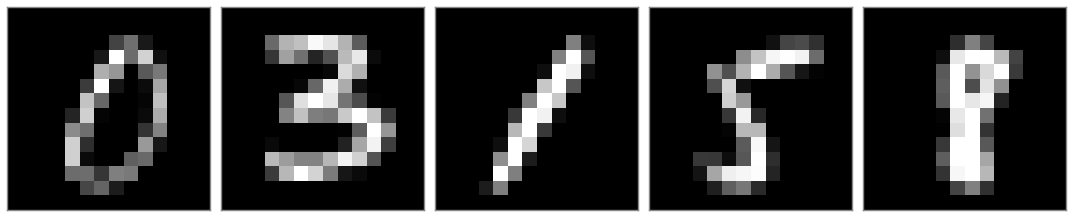

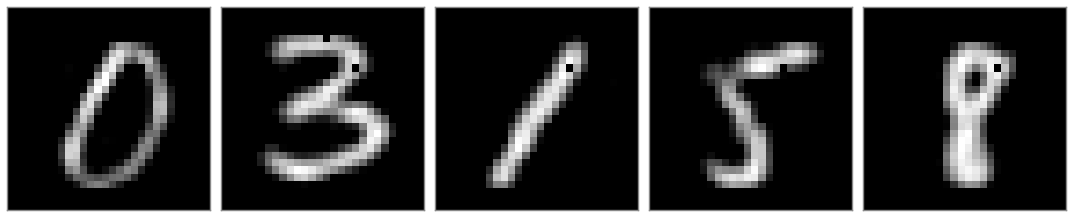

Epoch: 55 / 100	Loss: 0.006751560606062412


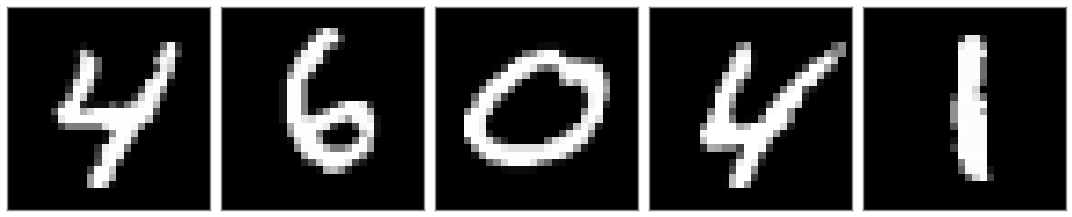

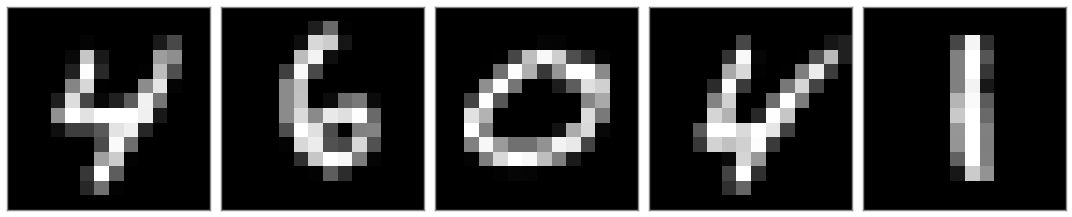

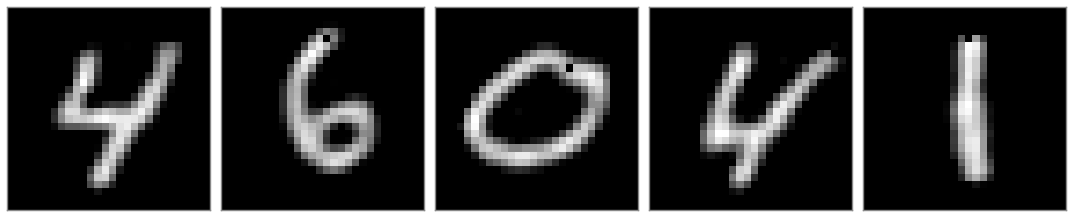

Epoch: 56 / 100	Loss: 0.007019879762083292


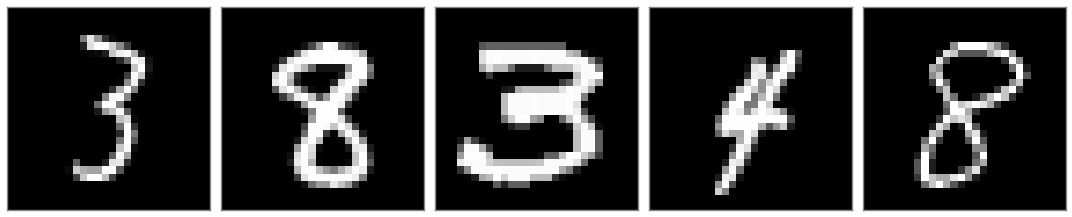

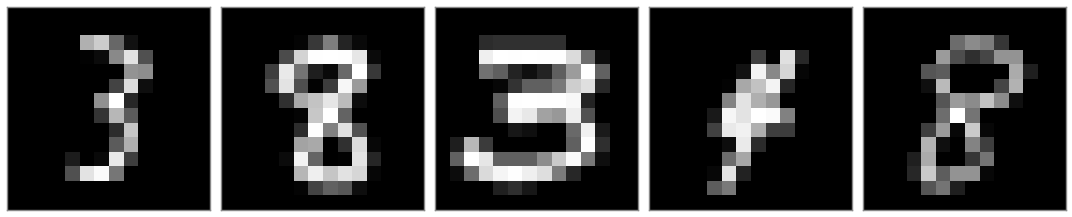

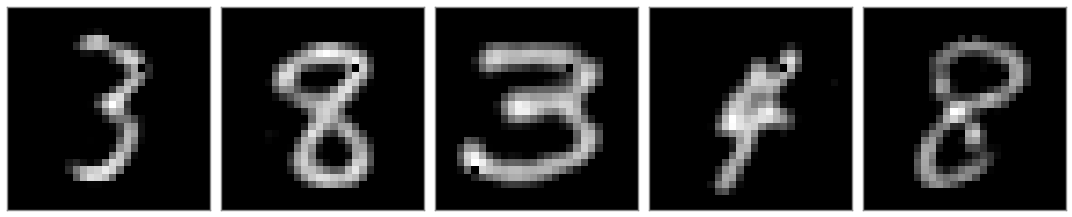

Epoch: 57 / 100	Loss: 0.006715733092278242


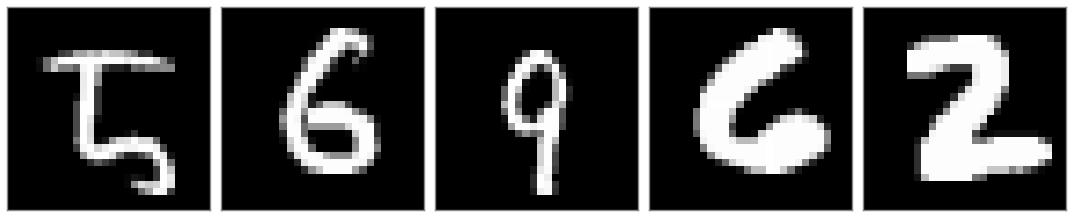

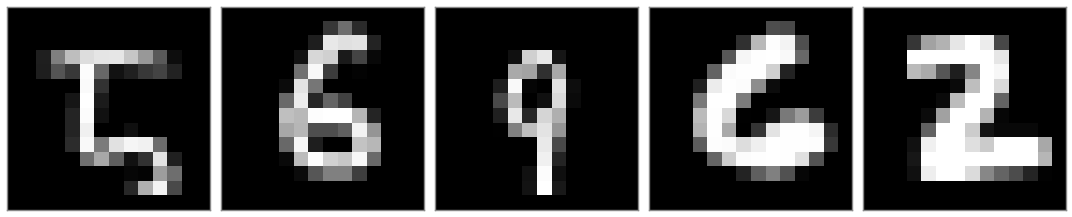

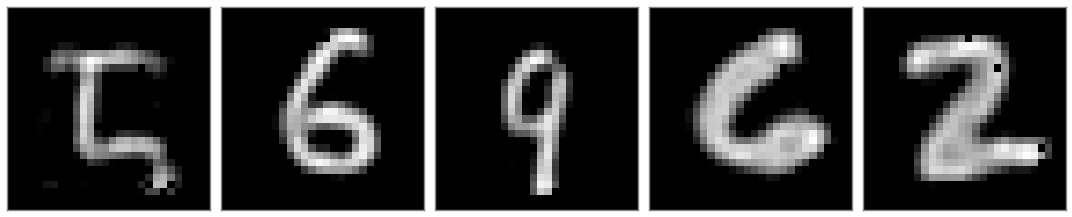

Epoch: 58 / 100	Loss: 0.006573555991053581


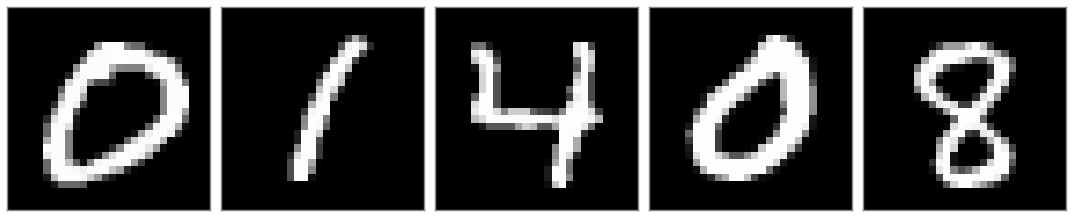

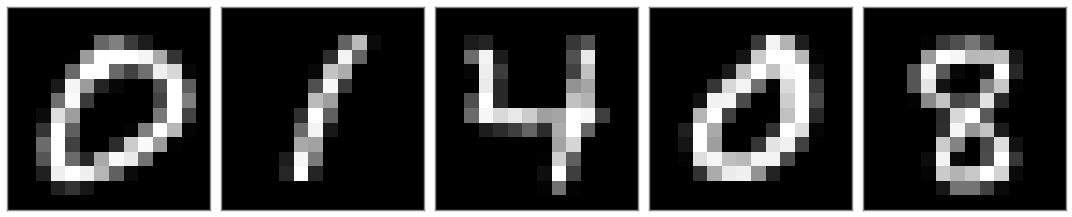

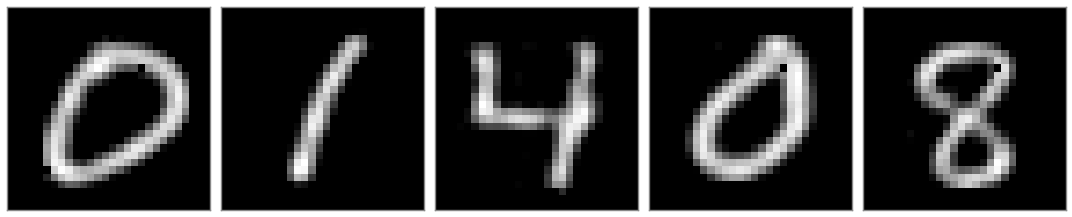

Epoch: 59 / 100	Loss: 0.006868631578981876


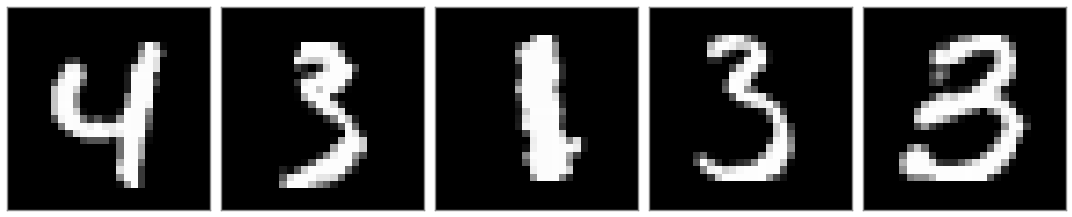

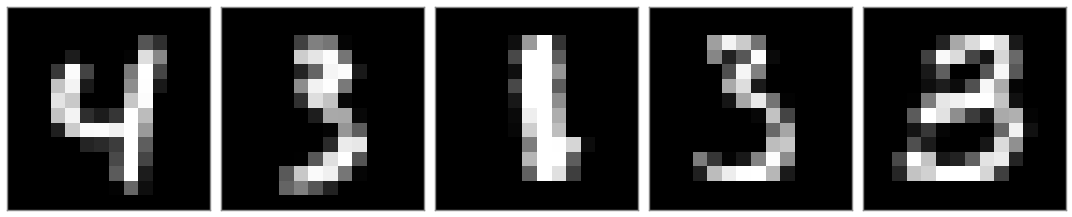

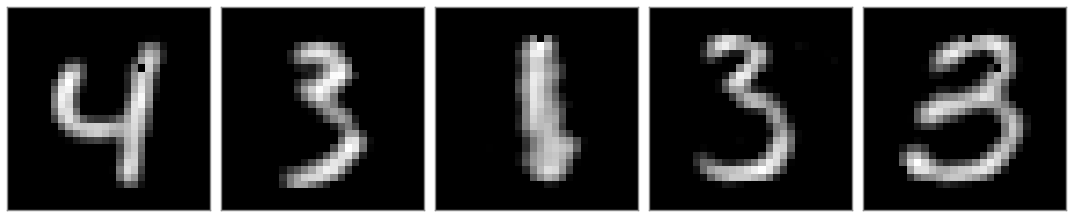

Epoch: 60 / 100	Loss: 0.006559990346431732


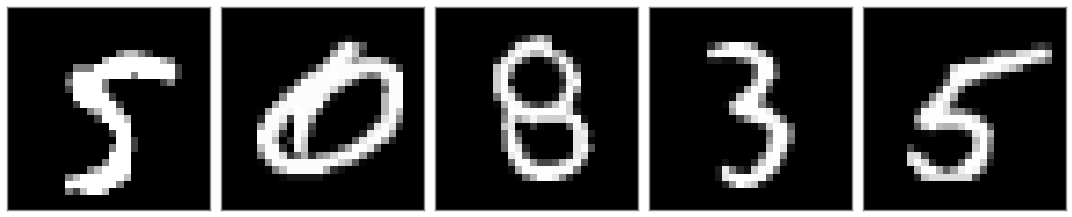

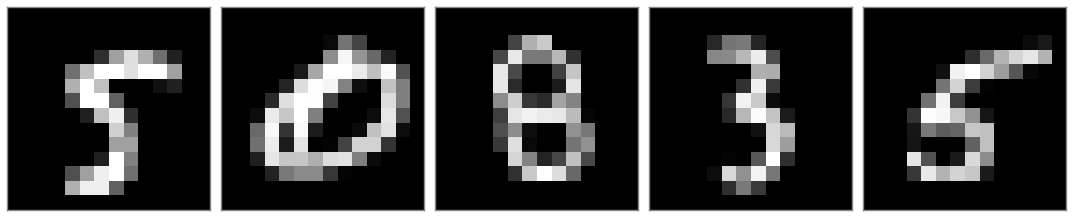

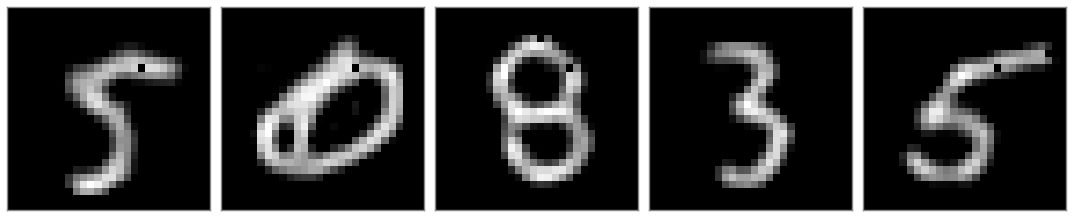

Epoch: 61 / 100	Loss: 0.006631358992308378


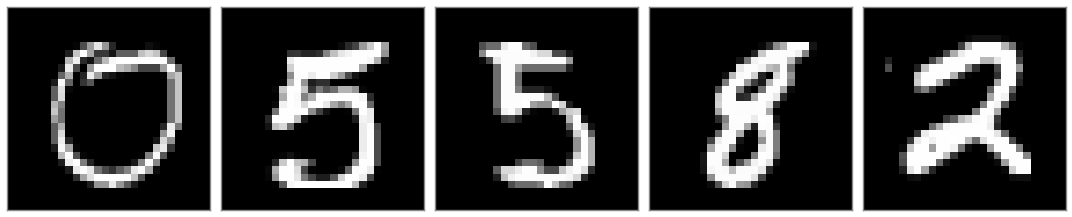

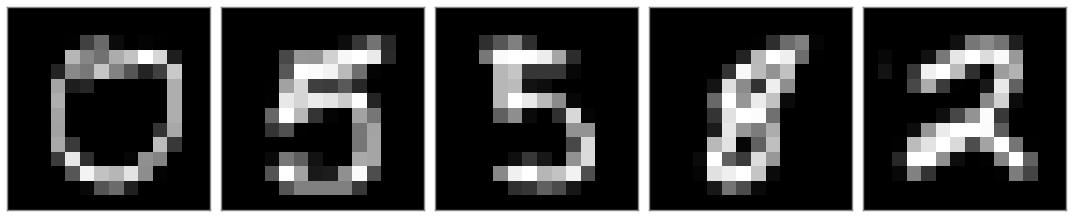

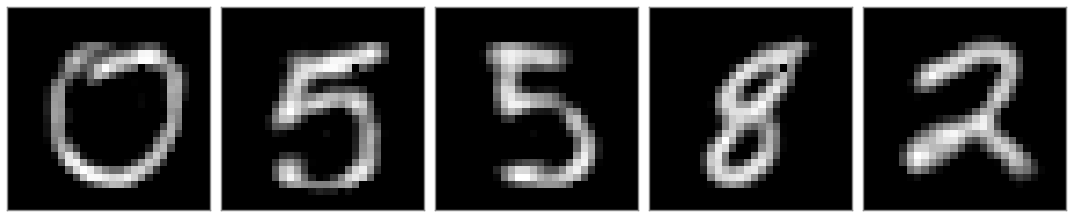

Epoch: 62 / 100	Loss: 0.006672581657767296


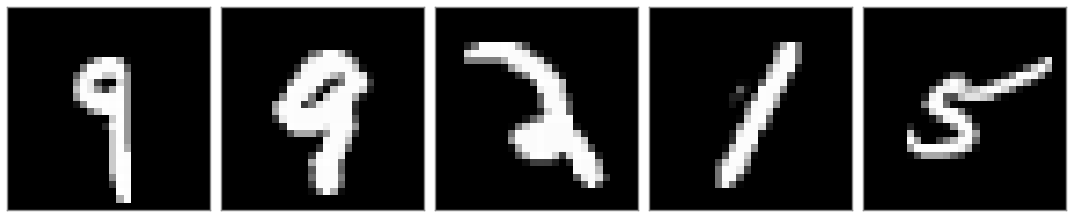

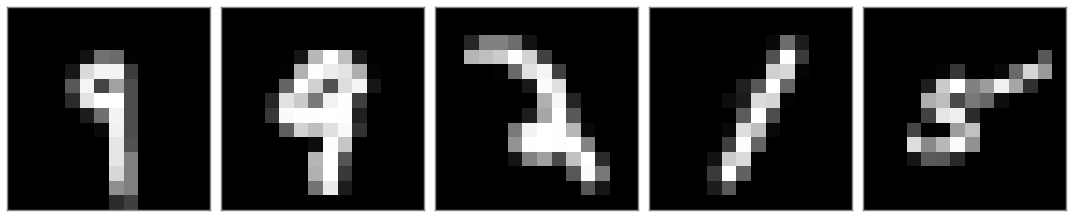

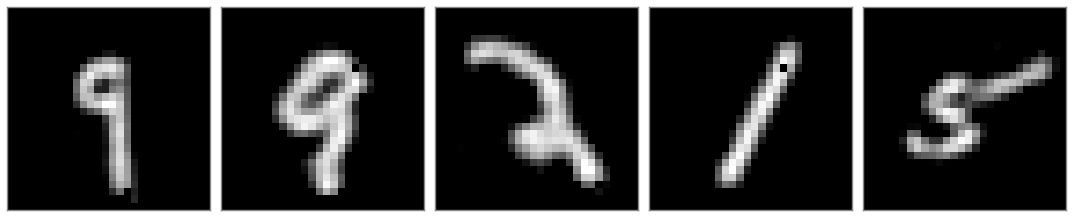

Epoch: 63 / 100	Loss: 0.006571099162101746


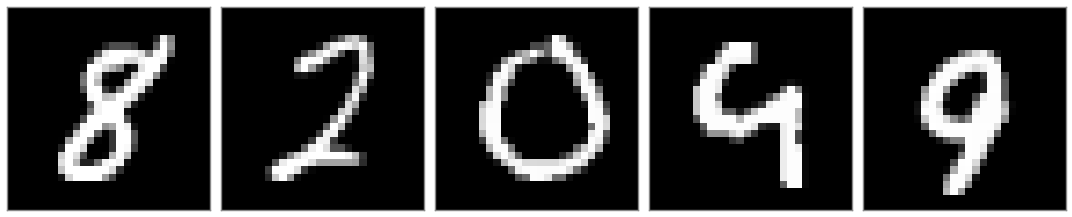

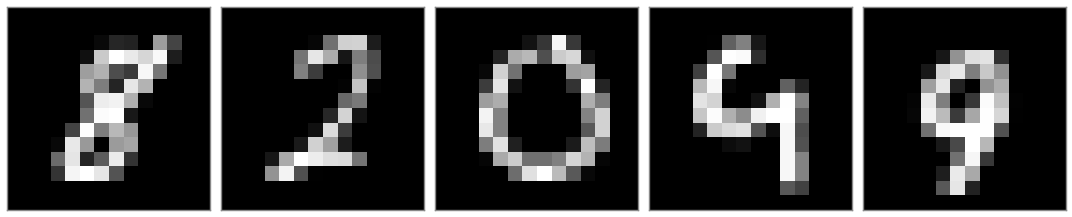

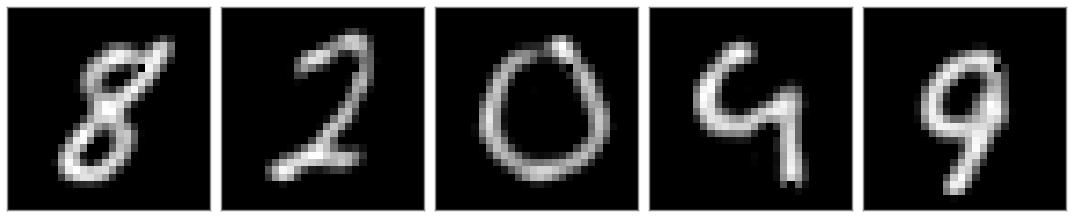

Epoch: 64 / 100	Loss: 0.00665935268625617


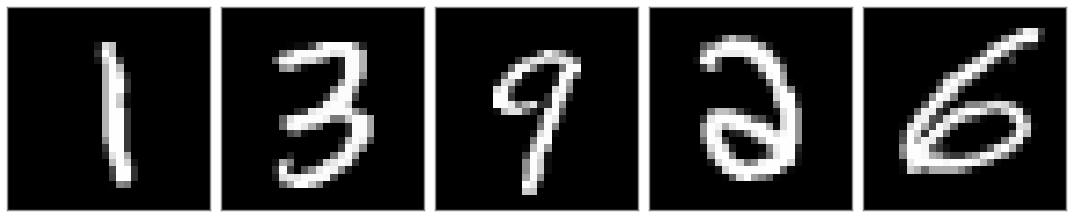

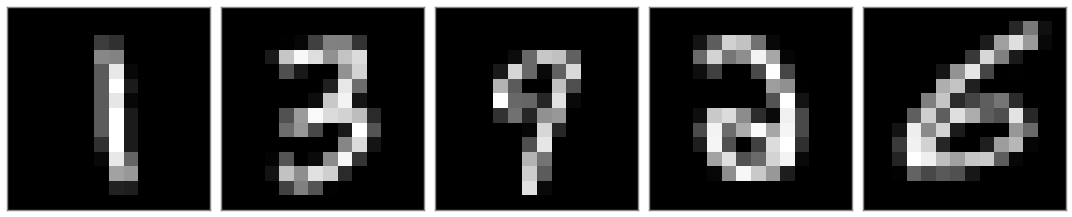

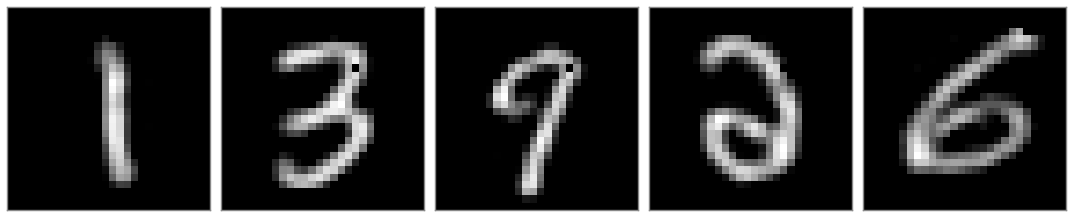

Epoch: 65 / 100	Loss: 0.006513241212815046


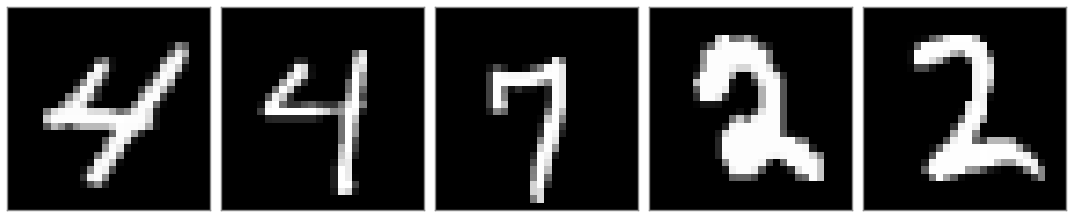

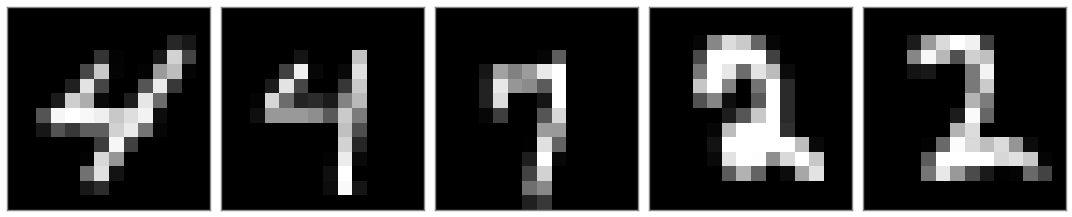

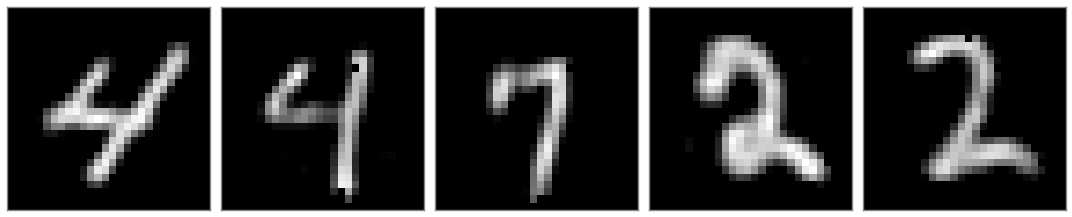

Epoch: 66 / 100	Loss: 0.006498460192233324


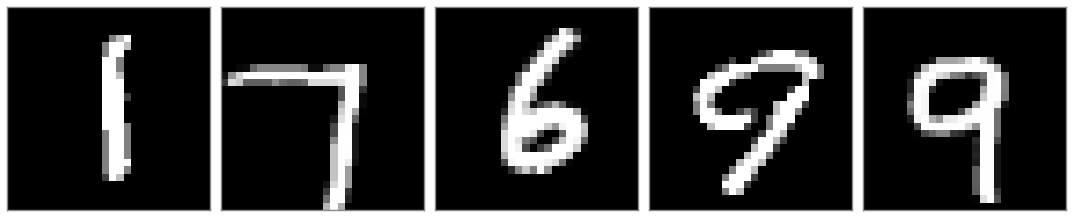

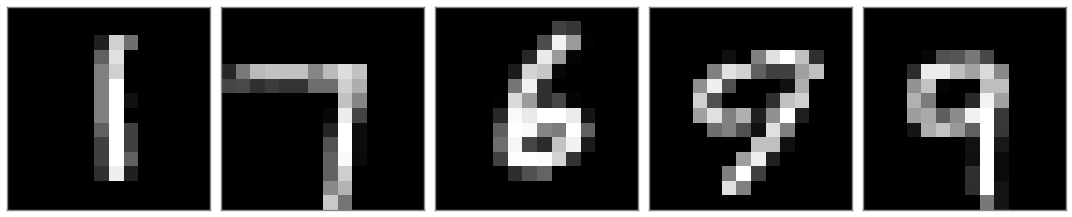

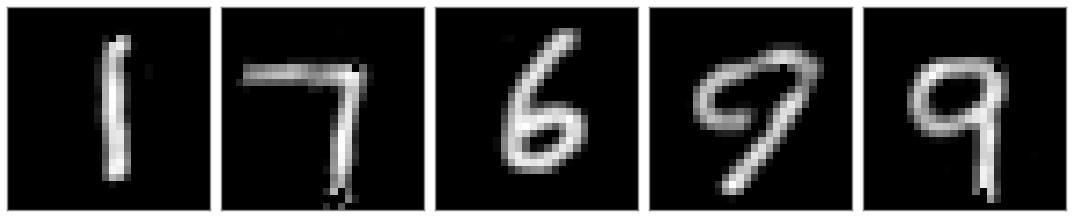

Epoch: 67 / 100	Loss: 0.006410081870853901


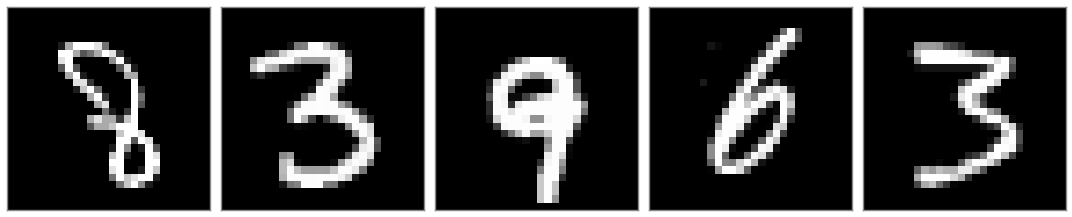

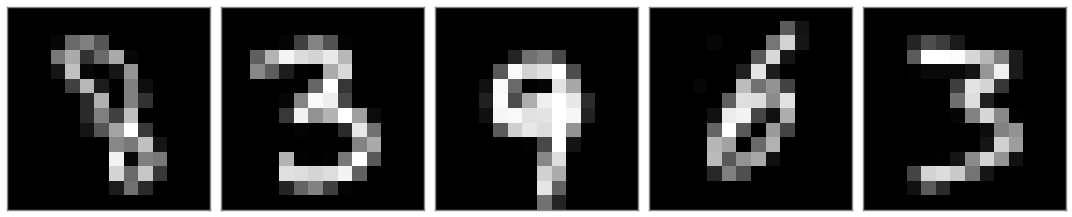

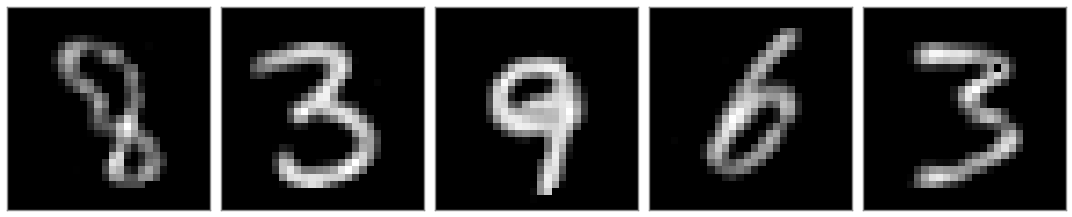

Epoch: 68 / 100	Loss: 0.006654753815382719


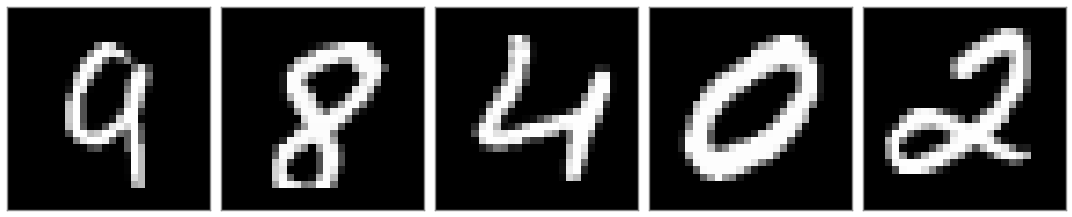

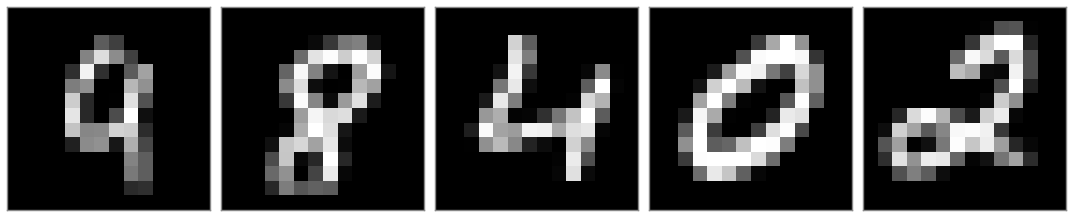

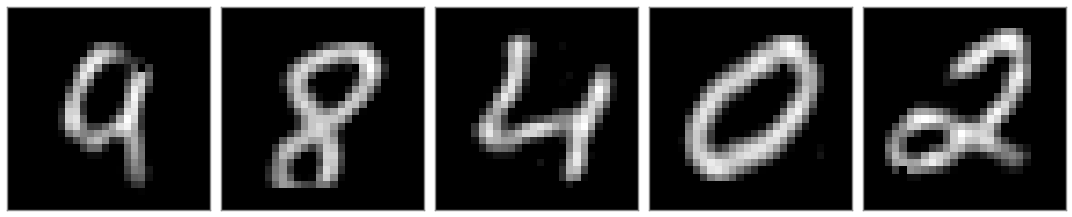

Epoch: 69 / 100	Loss: 0.006327047944068909


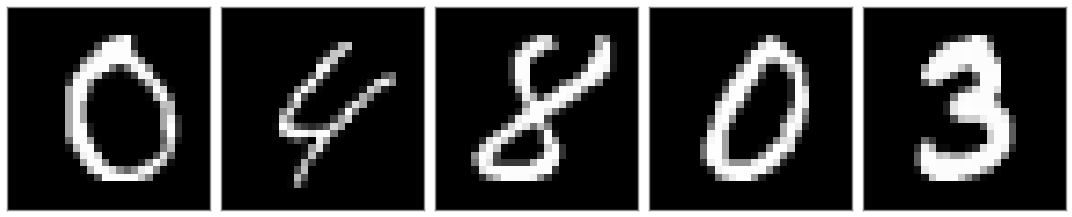

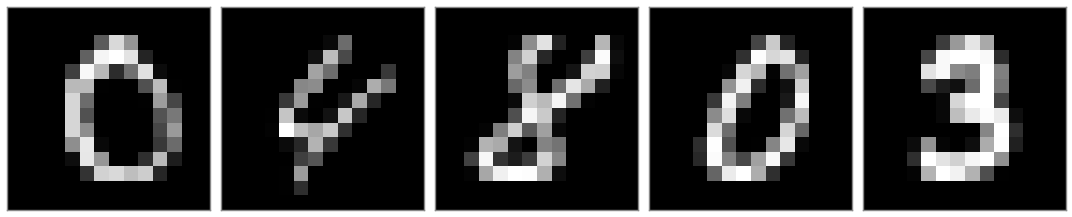

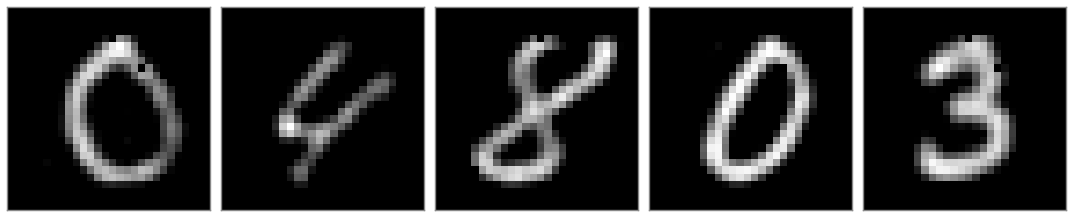

Epoch: 70 / 100	Loss: 0.006884513422846794


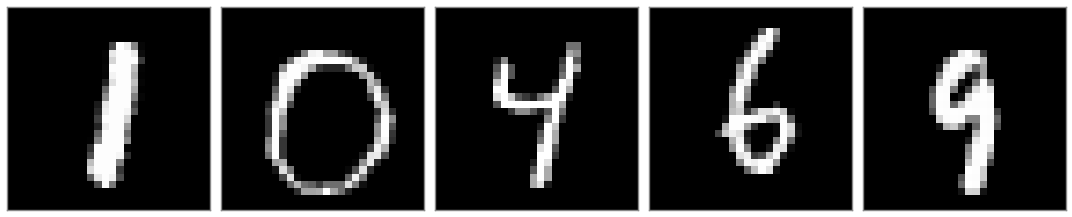

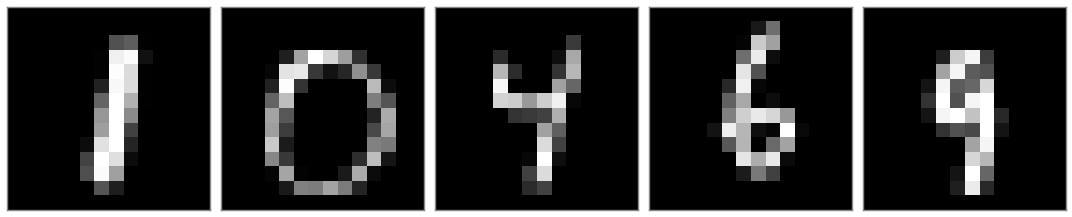

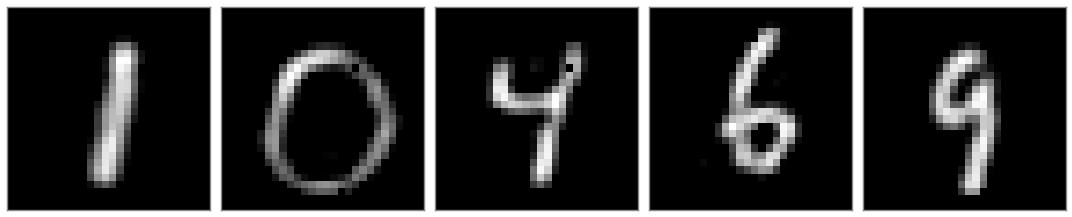

Epoch: 71 / 100	Loss: 0.006532598752528429


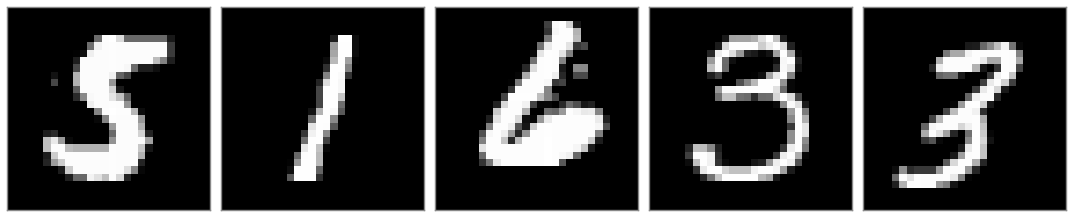

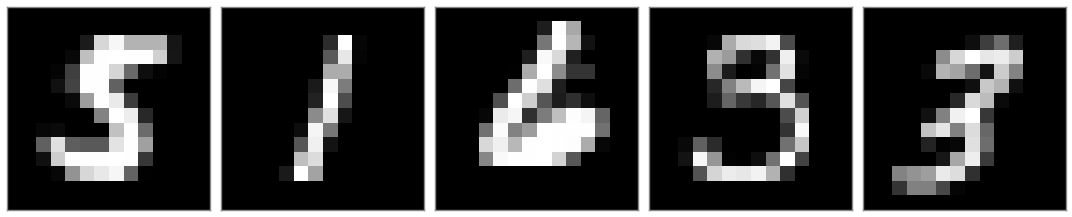

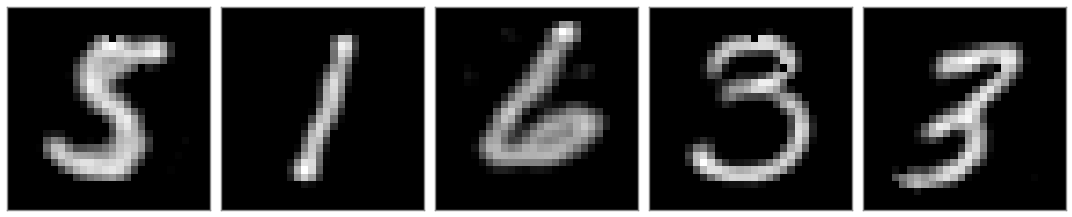

Epoch: 72 / 100	Loss: 0.006240101531147957


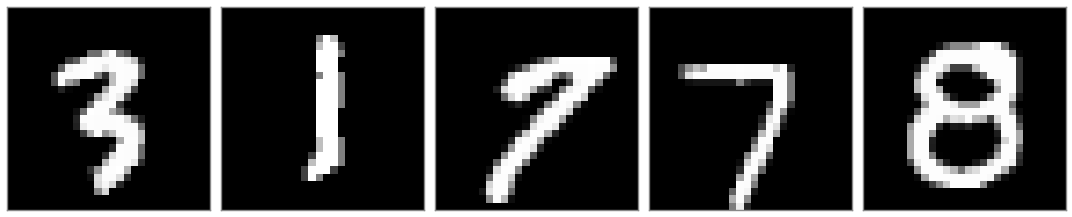

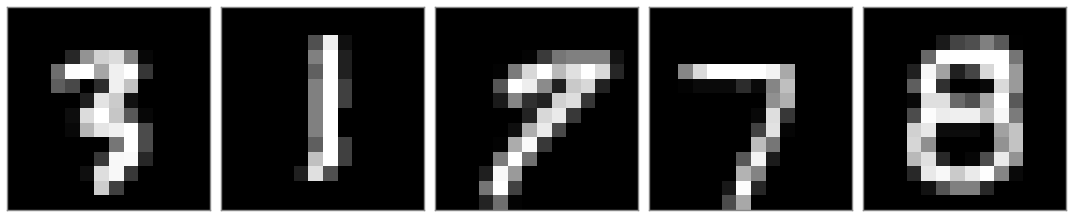

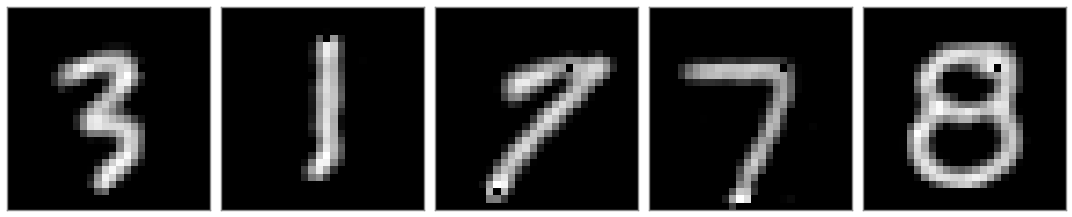

Epoch: 73 / 100	Loss: 0.006572516169399023


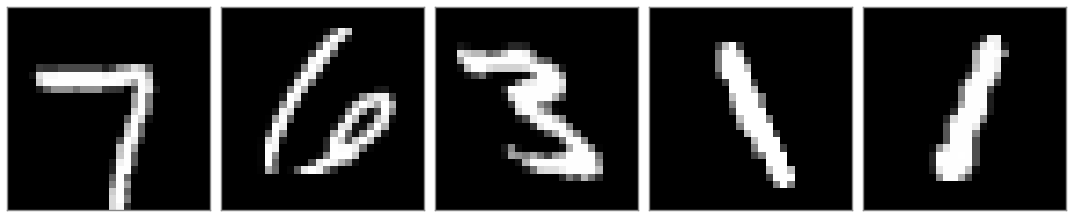

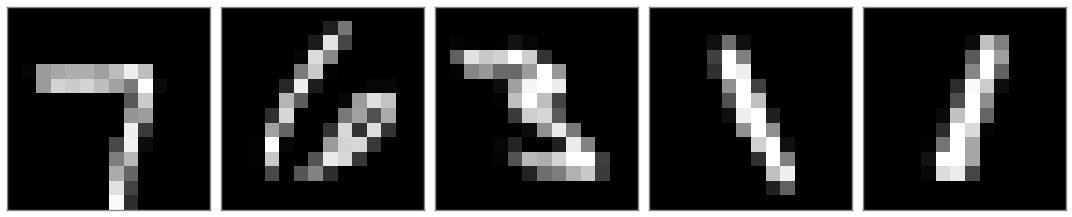

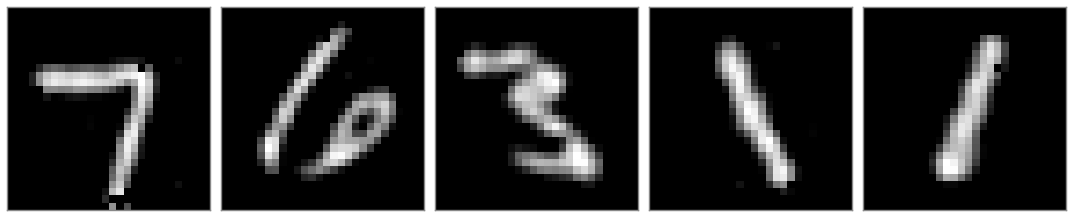

Epoch: 74 / 100	Loss: 0.006115277763456106


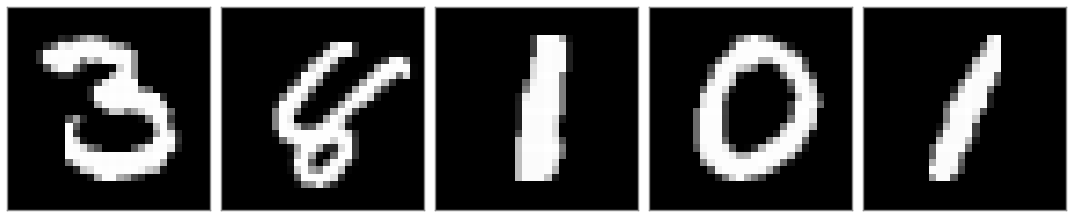

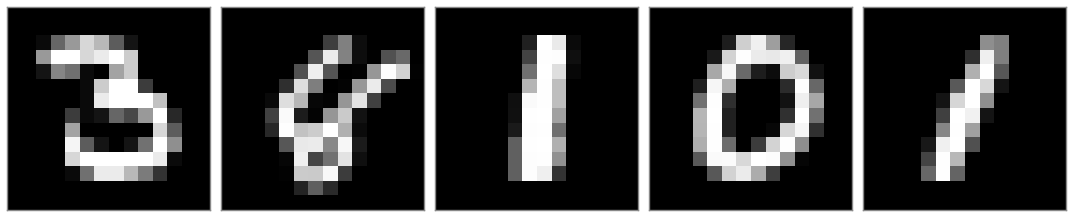

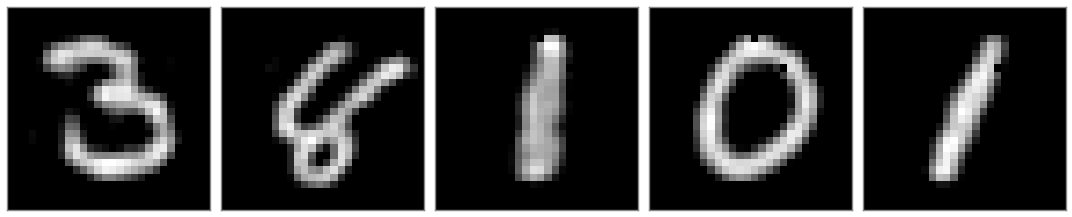

Epoch: 75 / 100	Loss: 0.006363864988088608


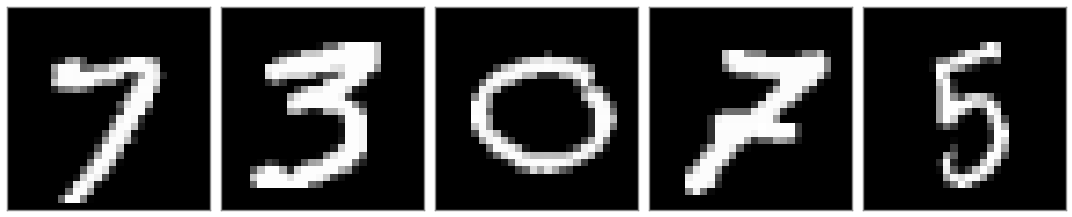

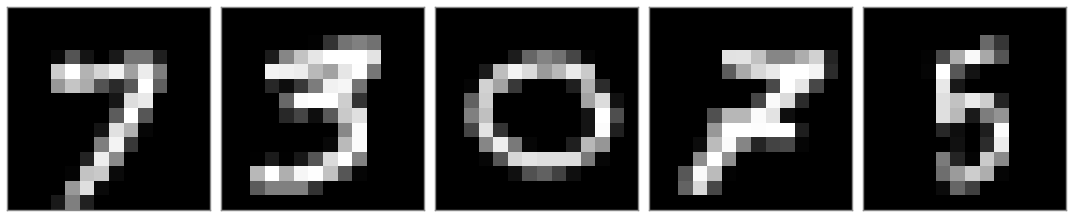

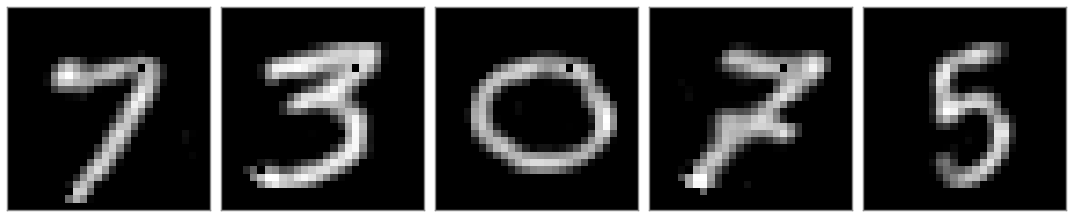

Epoch: 76 / 100	Loss: 0.006480131298303604


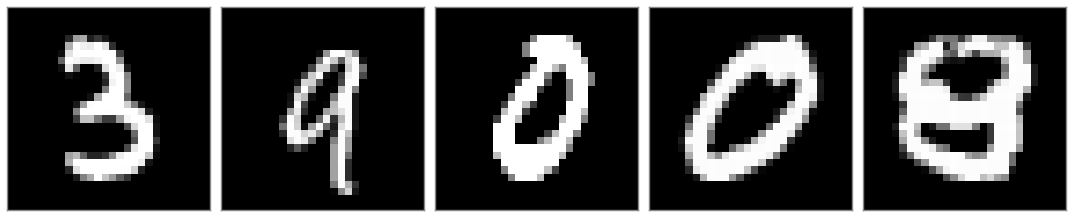

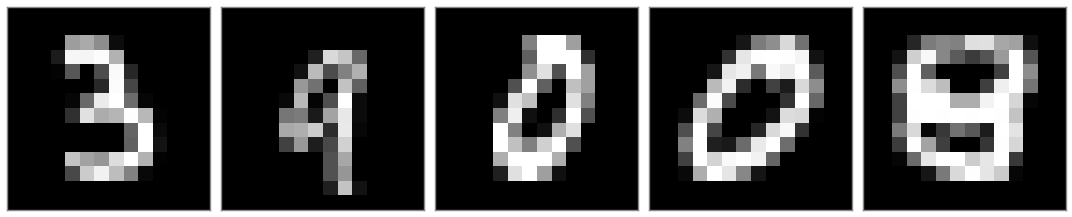

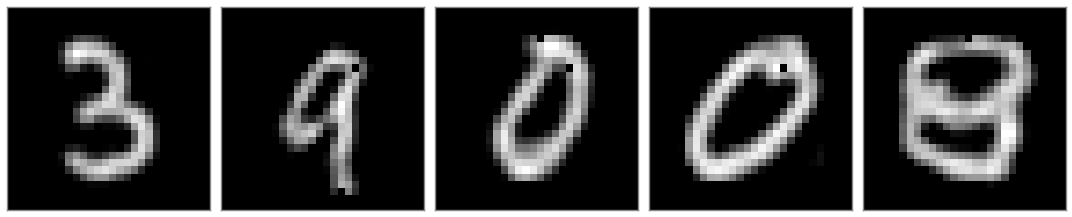

Epoch: 77 / 100	Loss: 0.006321782246232033


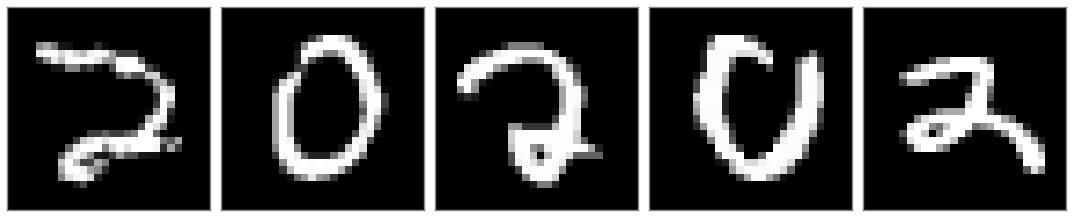

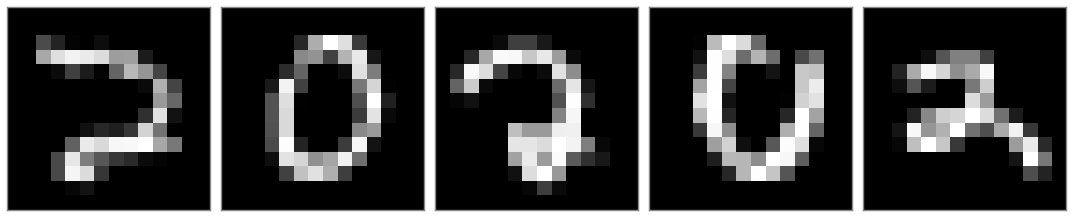

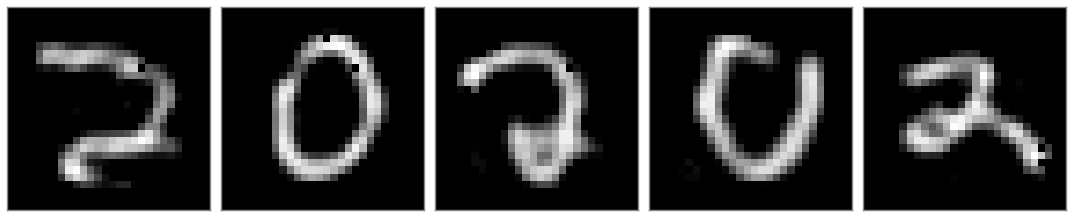

Epoch: 78 / 100	Loss: 0.0064385756850242615


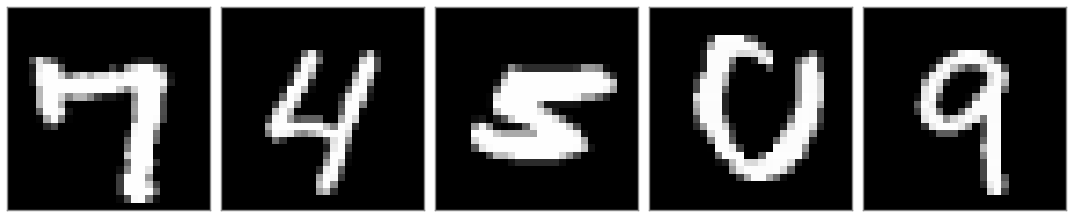

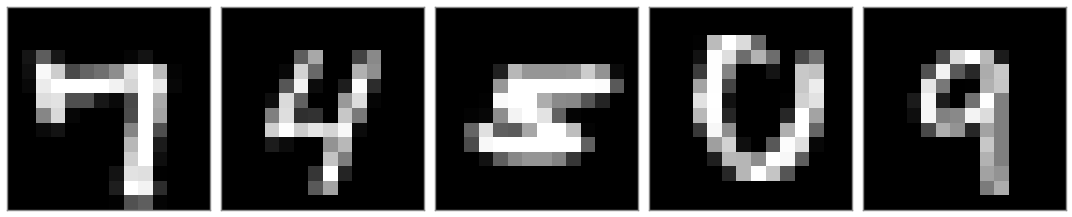

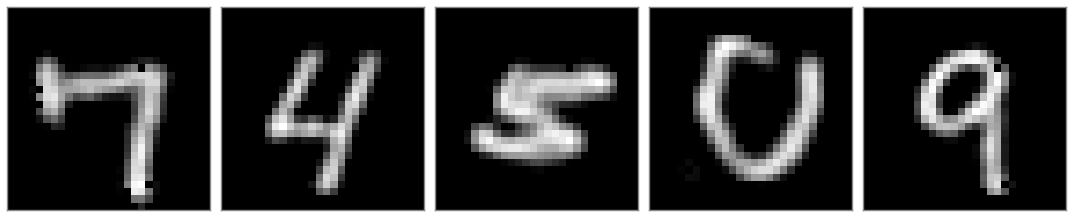

Epoch: 79 / 100	Loss: 0.006421211641281843


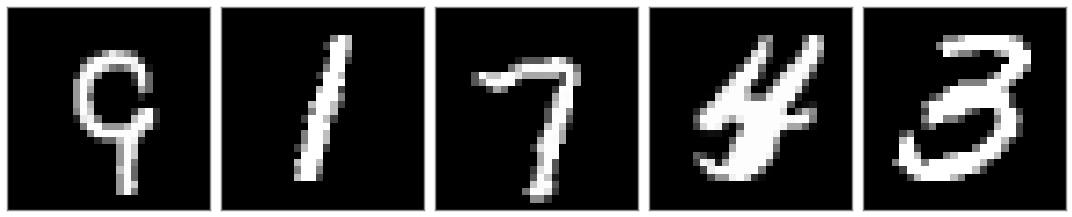

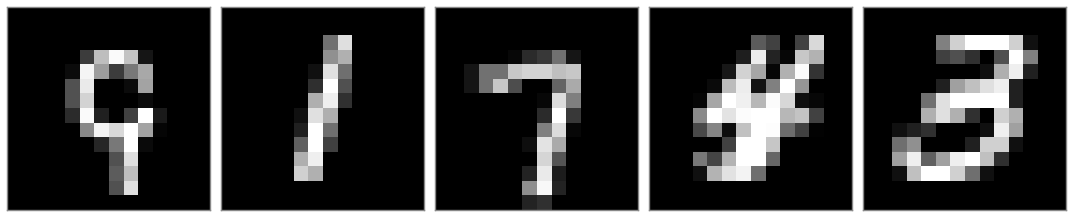

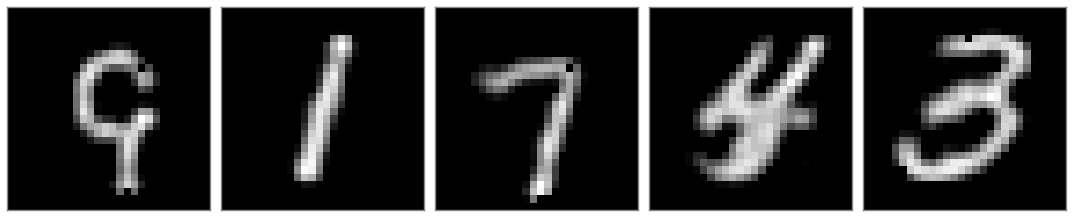

Epoch: 80 / 100	Loss: 0.006555056199431419


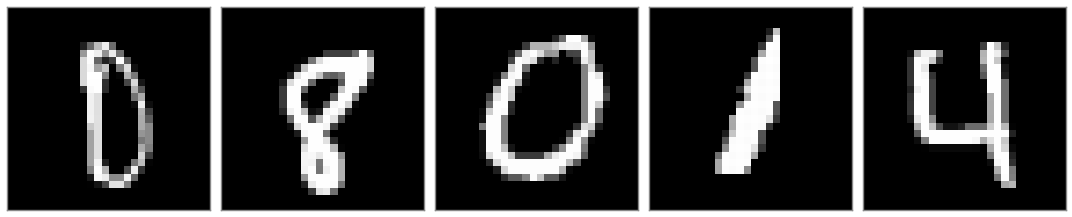

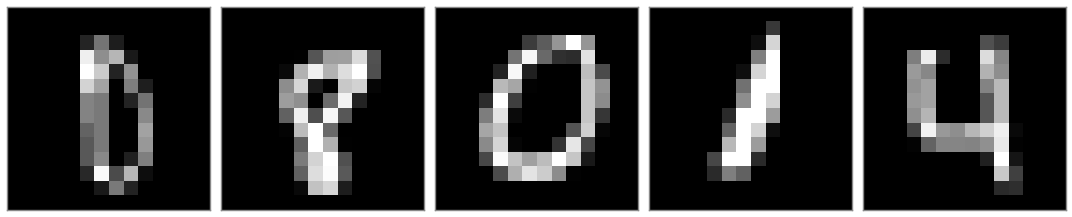

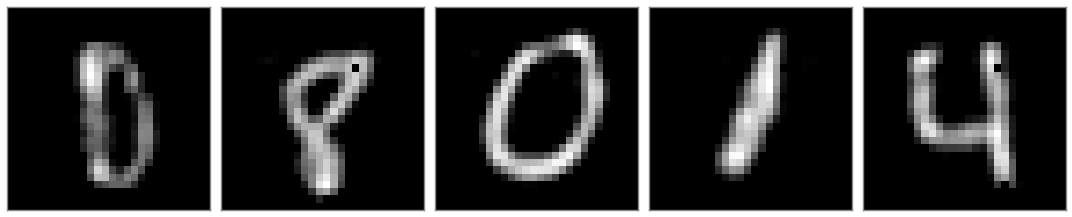

Epoch: 81 / 100	Loss: 0.006521147675812244


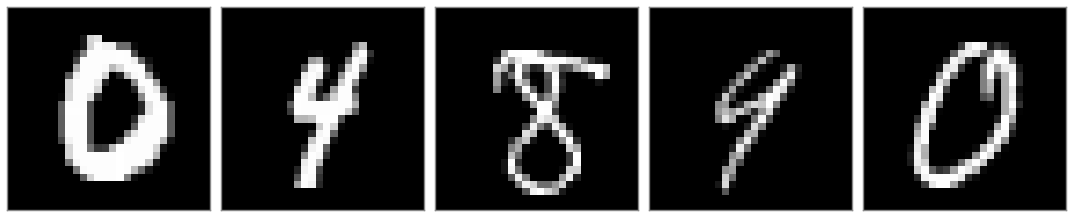

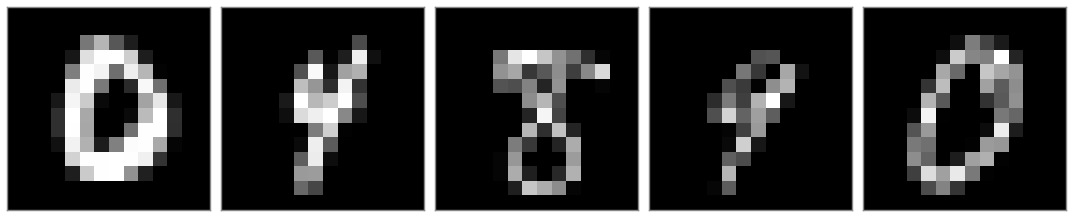

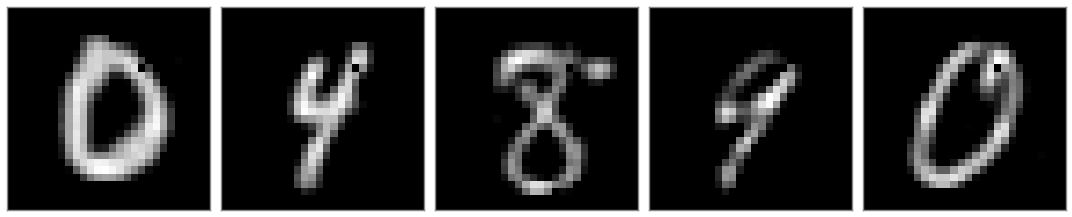

Epoch: 82 / 100	Loss: 0.006267656572163105


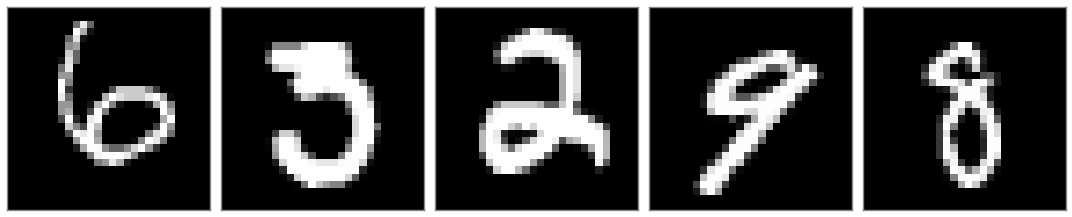

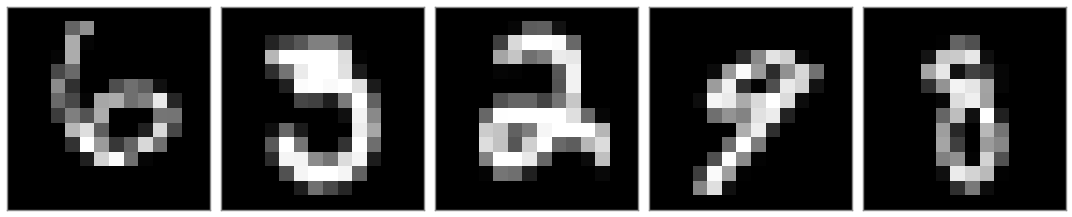

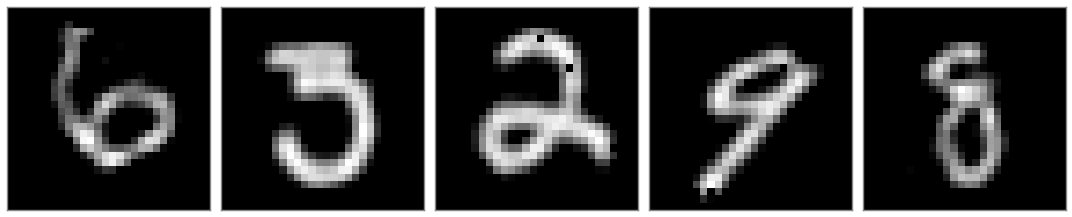

Epoch: 83 / 100	Loss: 0.006294624879956245


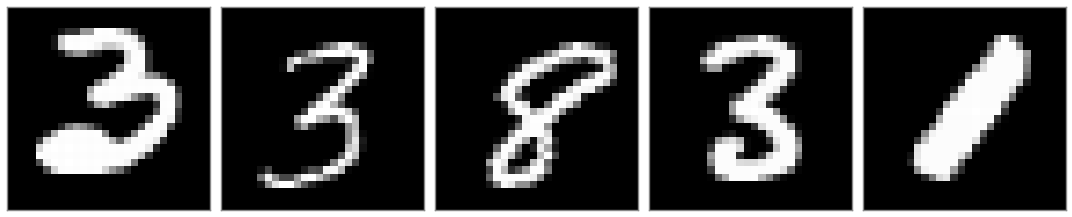

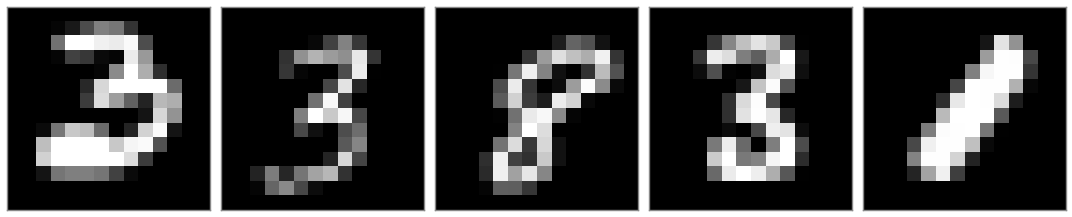

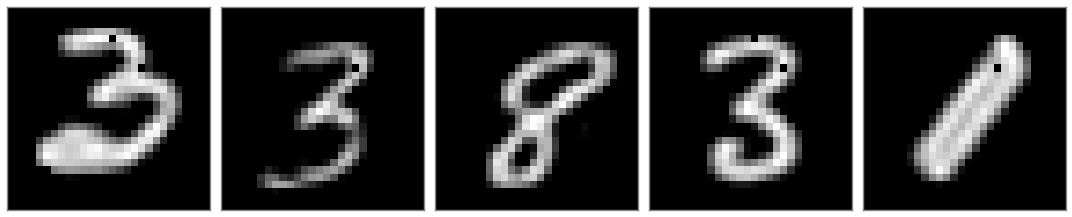

Epoch: 84 / 100	Loss: 0.006467120721936226


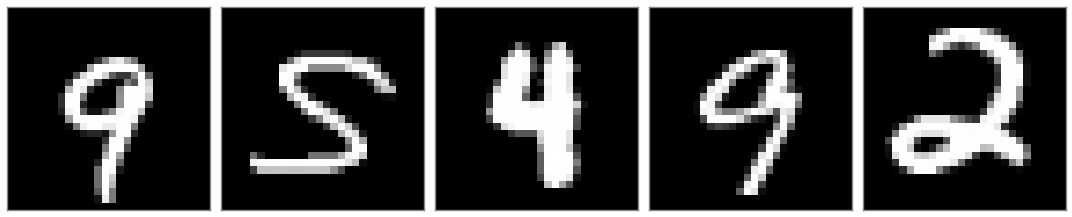

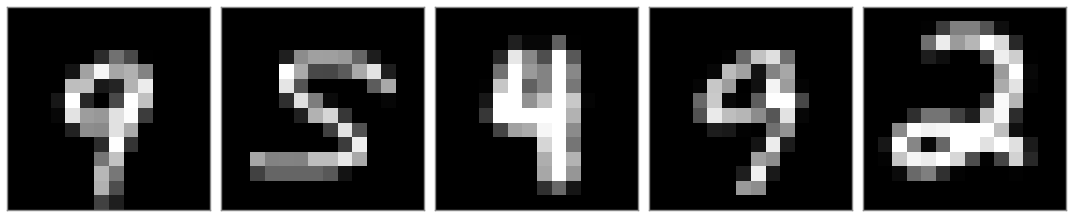

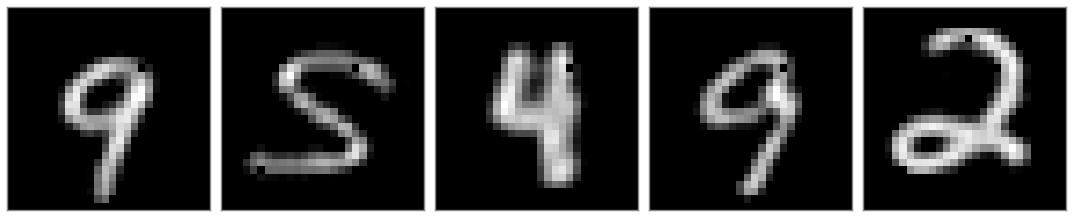

Epoch: 85 / 100	Loss: 0.006443939171731472


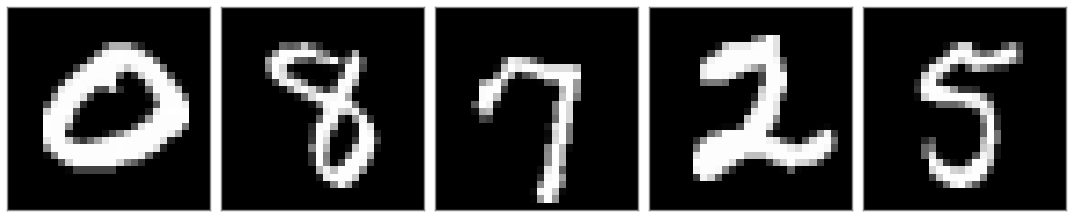

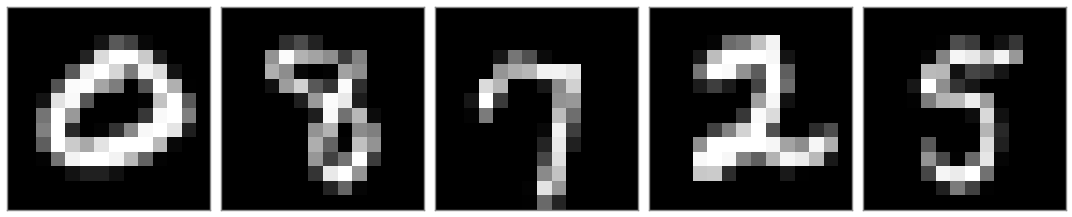

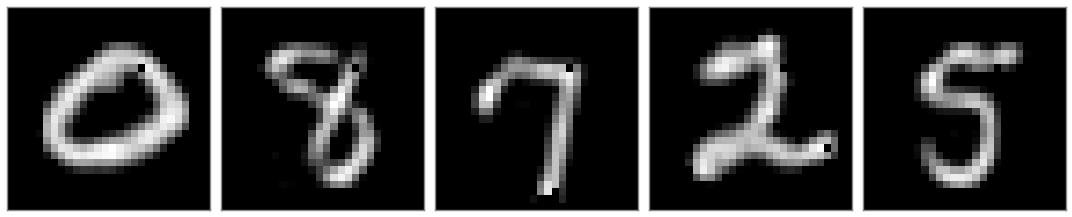

Epoch: 86 / 100	Loss: 0.006334422621876001


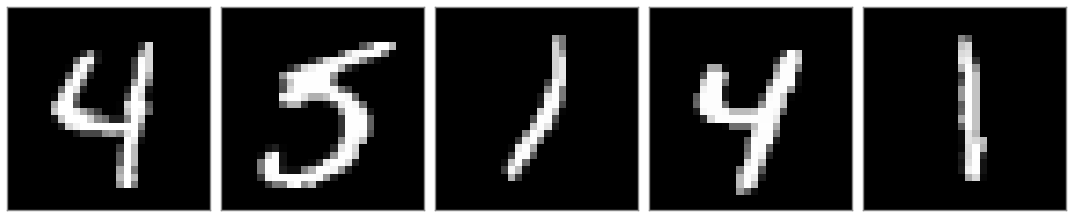

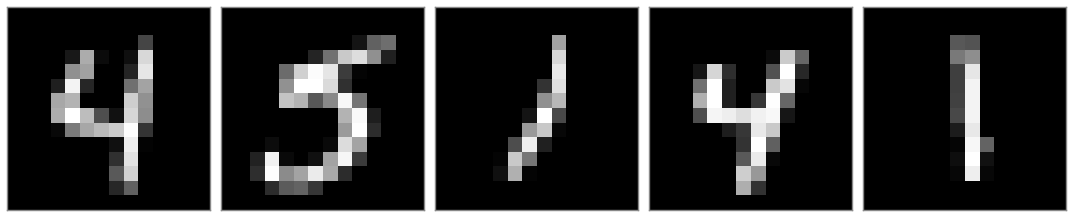

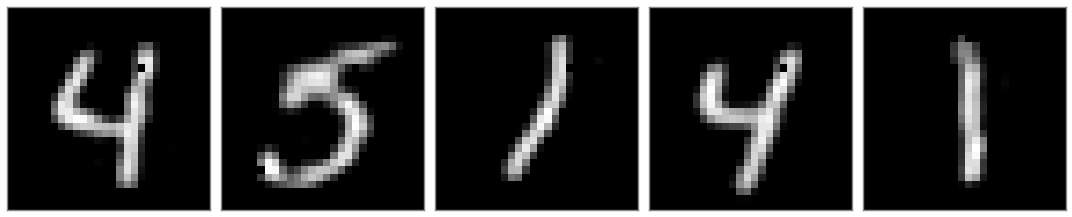

Epoch: 87 / 100	Loss: 0.006553079001605511


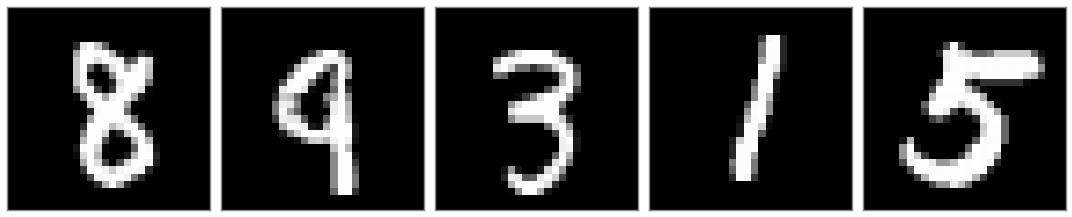

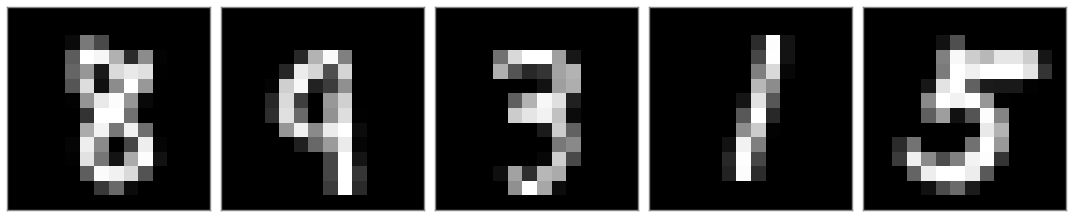

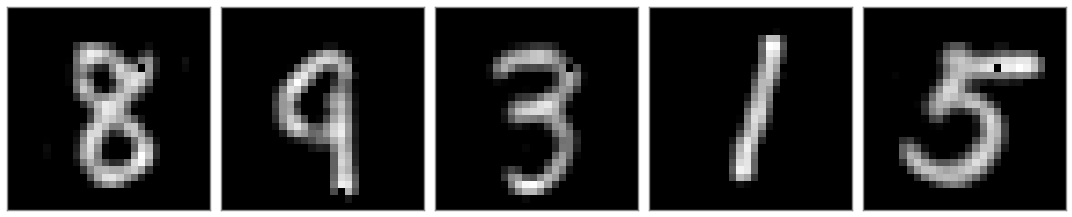

Epoch: 88 / 100	Loss: 0.006149881985038519


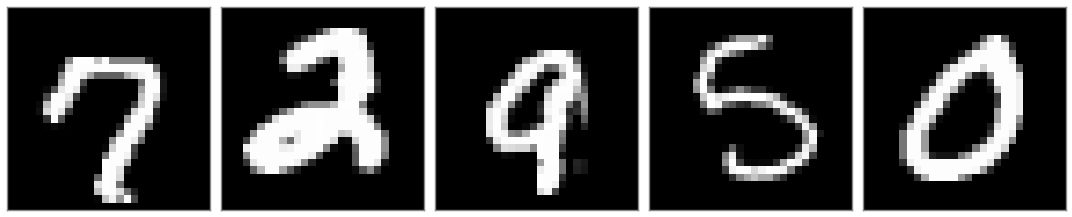

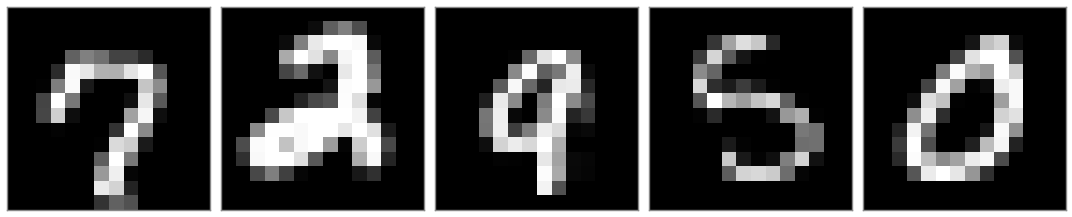

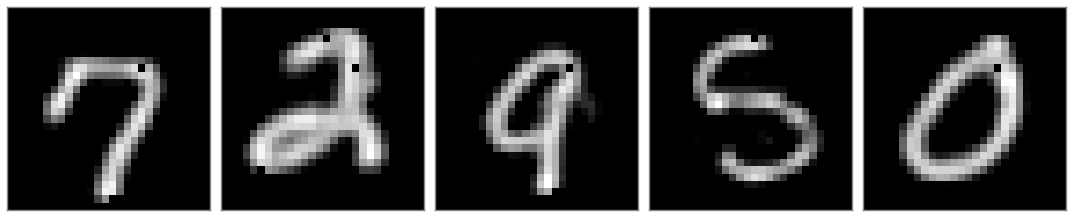

Epoch: 89 / 100	Loss: 0.006242626346647739


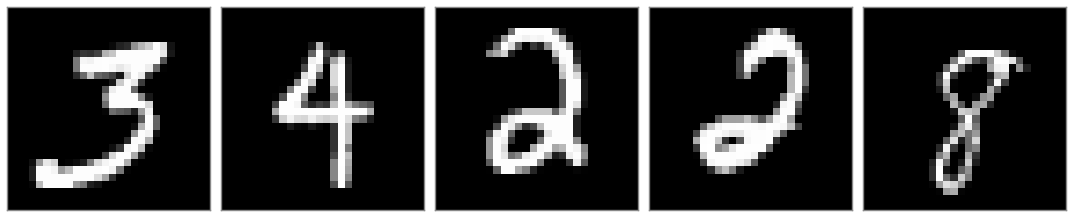

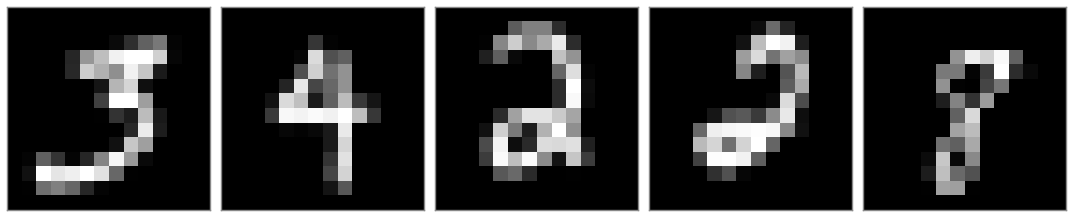

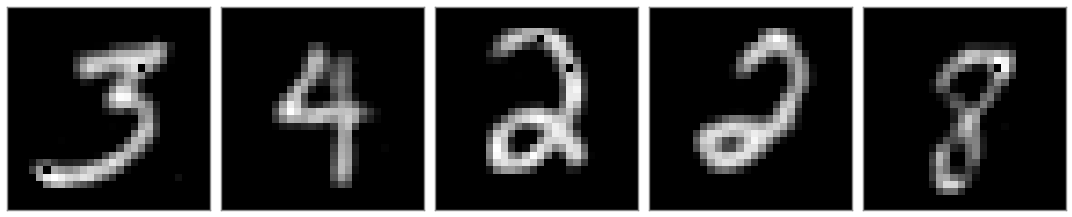

Epoch: 90 / 100	Loss: 0.006361511070281267


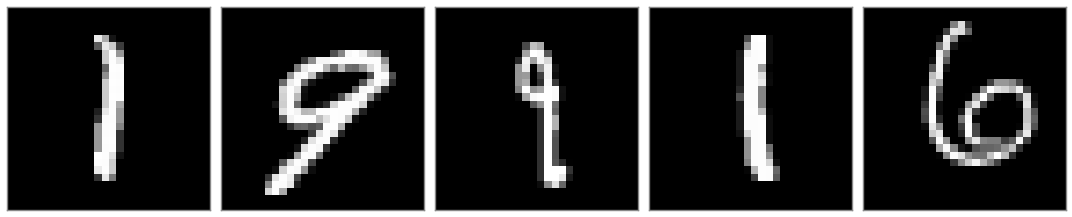

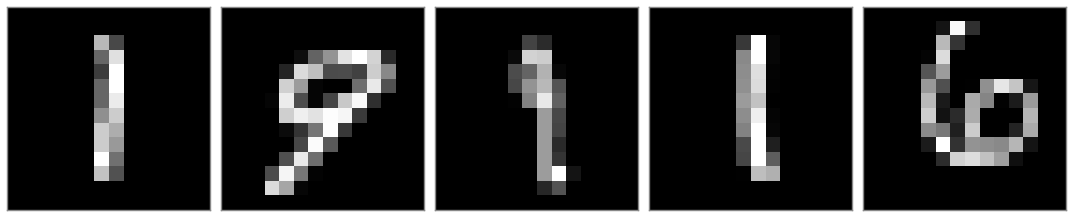

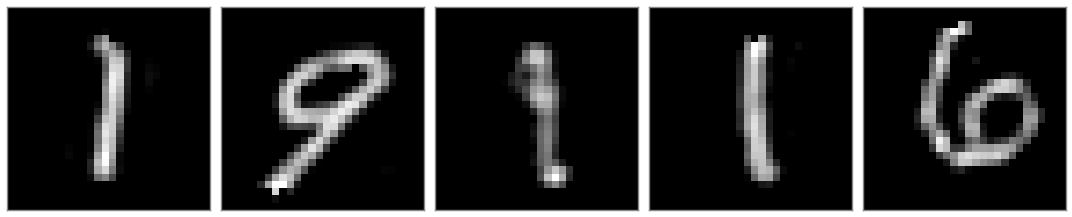

Epoch: 91 / 100	Loss: 0.006386496592313051


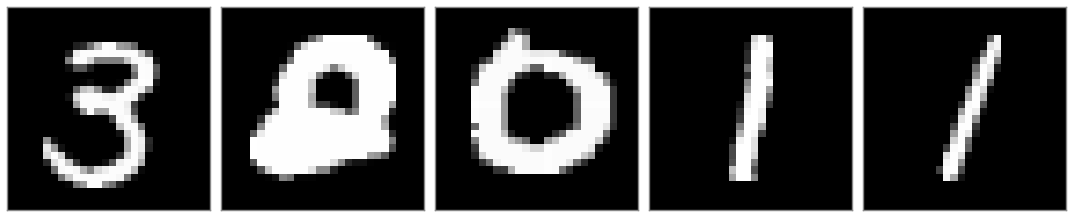

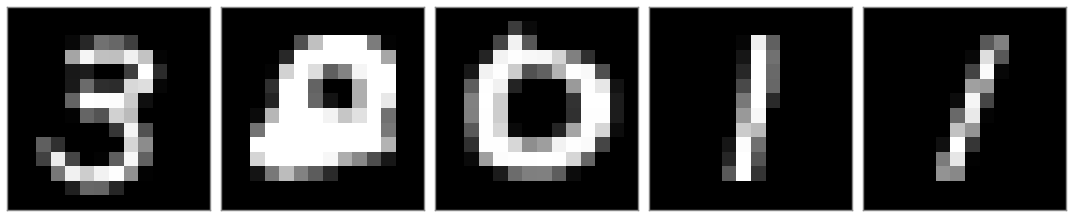

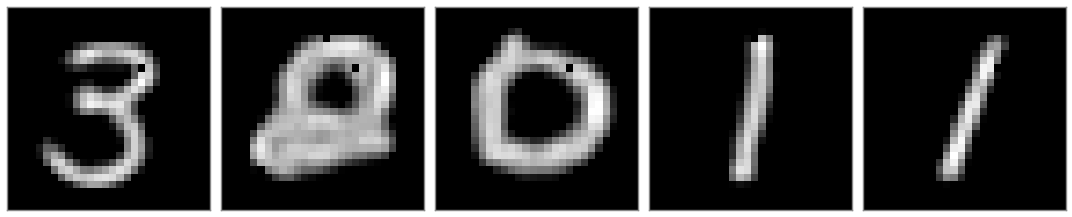

Epoch: 92 / 100	Loss: 0.006153008434921503


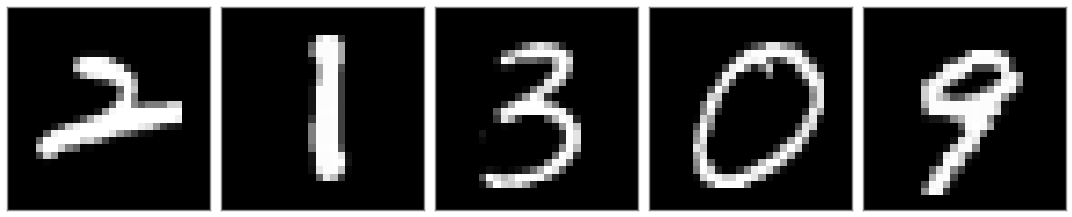

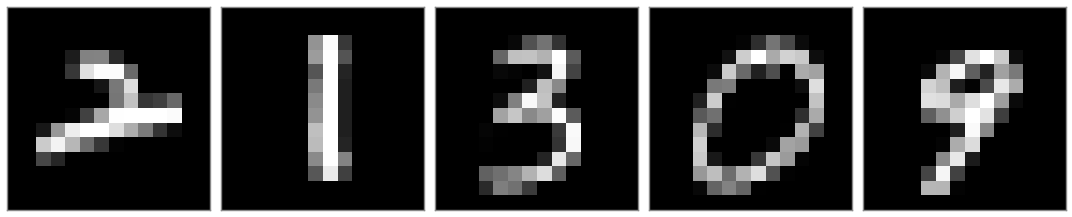

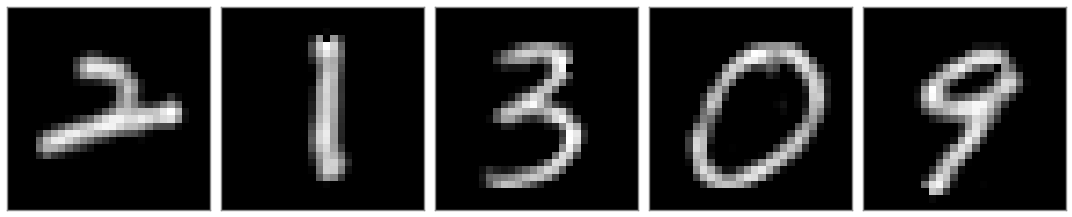

Epoch: 93 / 100	Loss: 0.006409105844795704


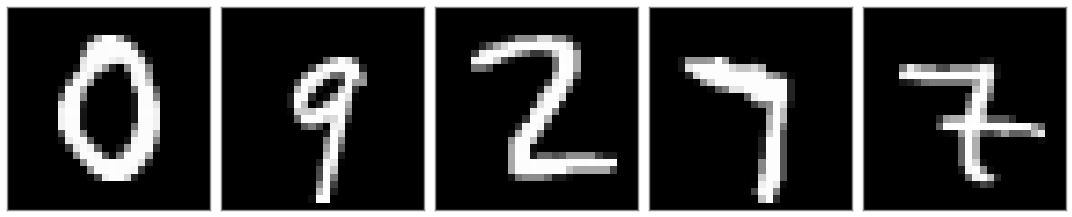

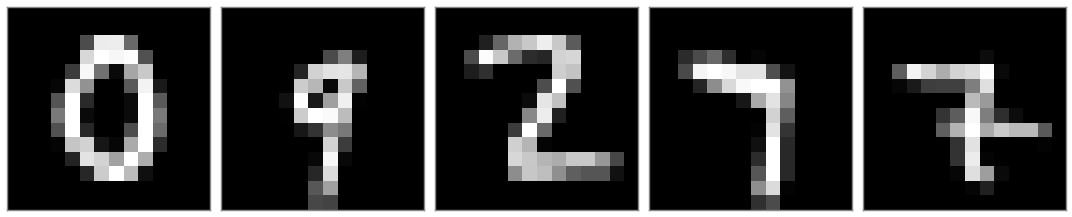

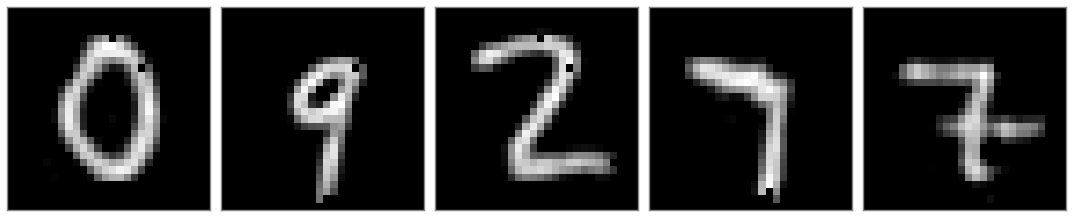

Epoch: 94 / 100	Loss: 0.0061157336458563805


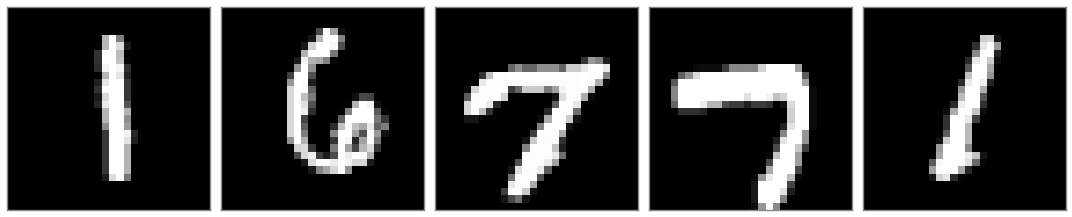

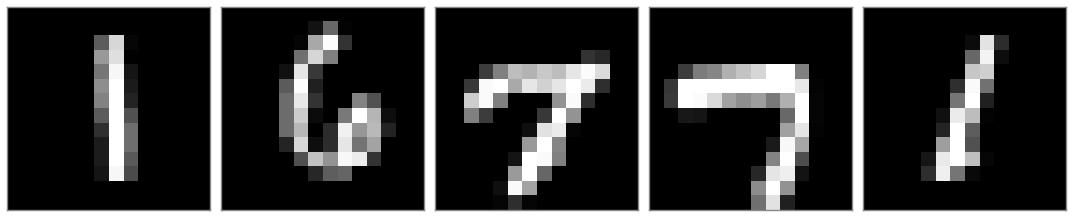

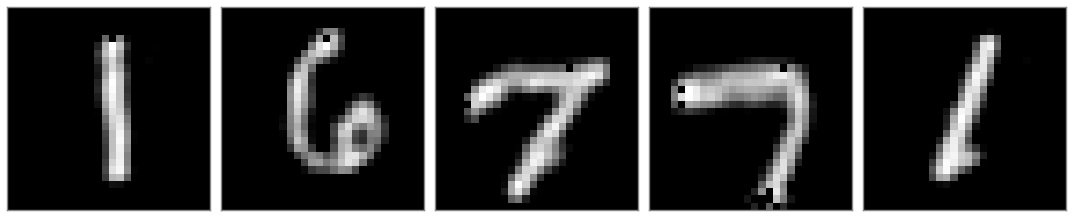

Epoch: 95 / 100	Loss: 0.006046487484127283


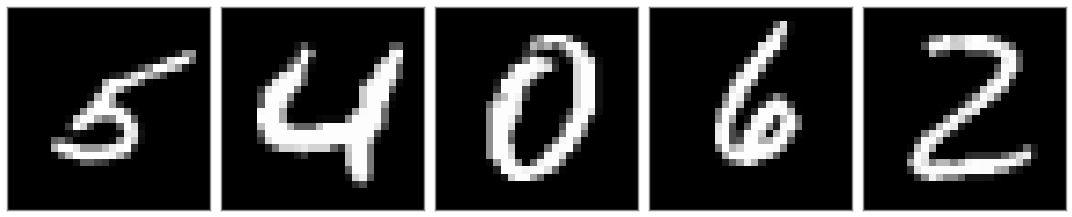

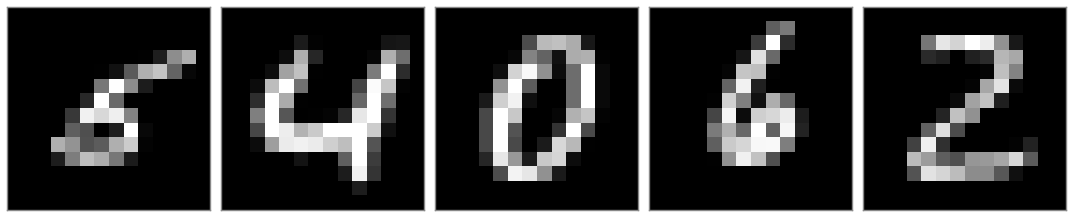

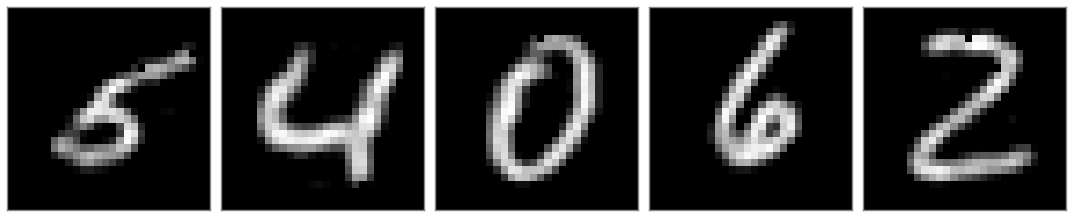

Epoch: 96 / 100	Loss: 0.00630524754524231


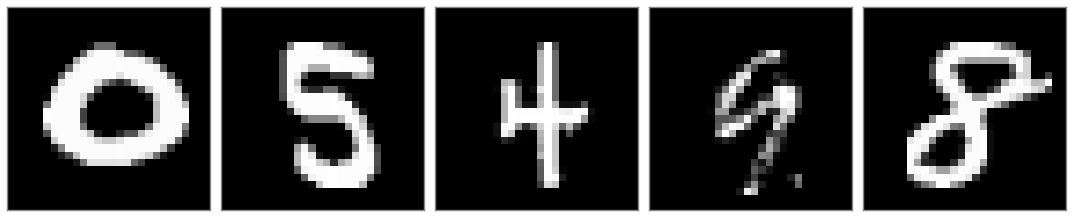

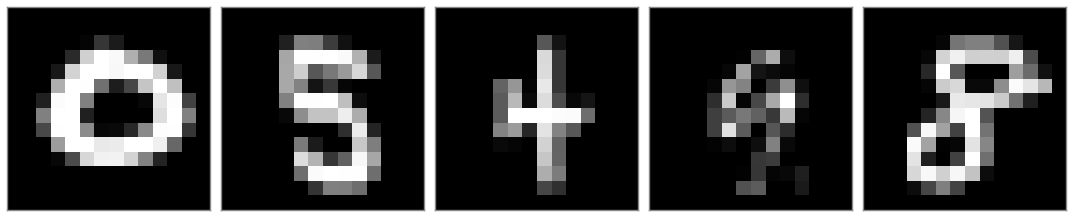

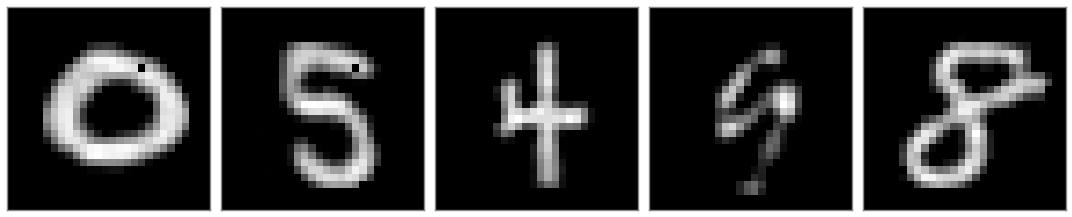

Epoch: 97 / 100	Loss: 0.006158352363854647


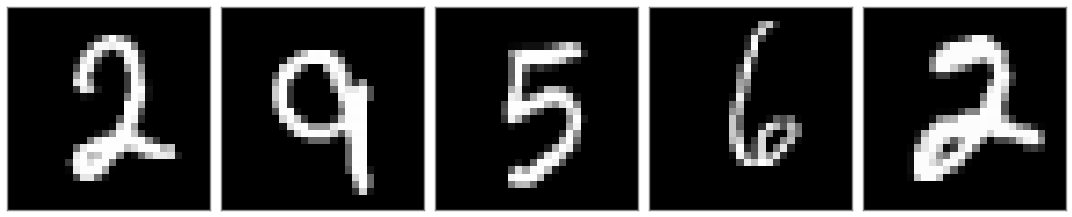

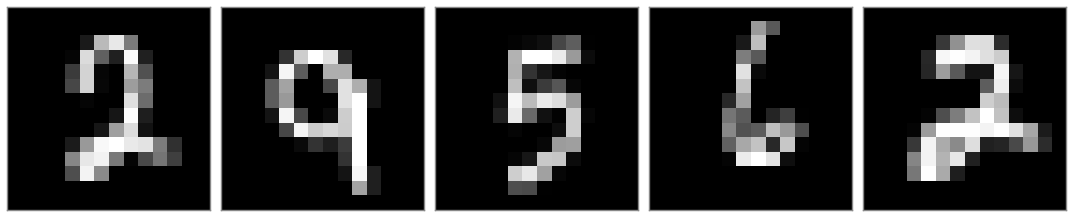

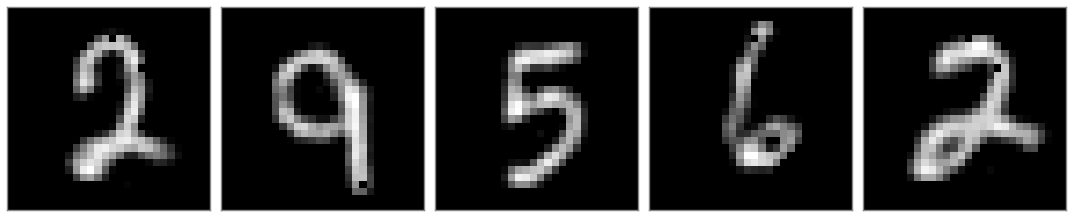

Epoch: 98 / 100	Loss: 0.006230898201465607


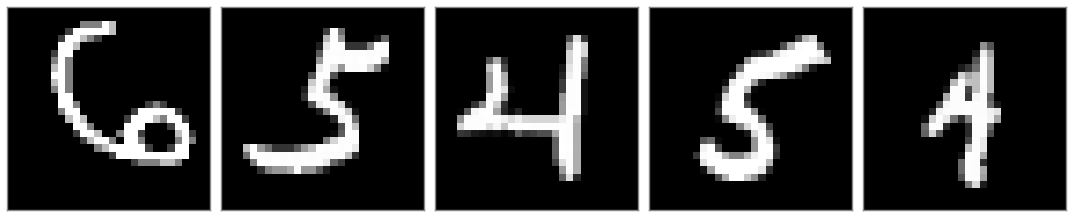

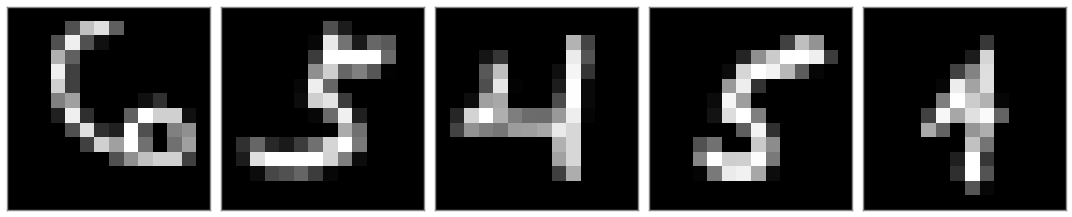

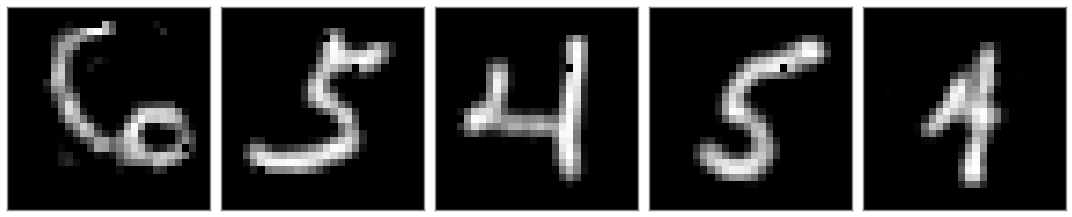

Epoch: 99 / 100	Loss: 0.006068666931241751


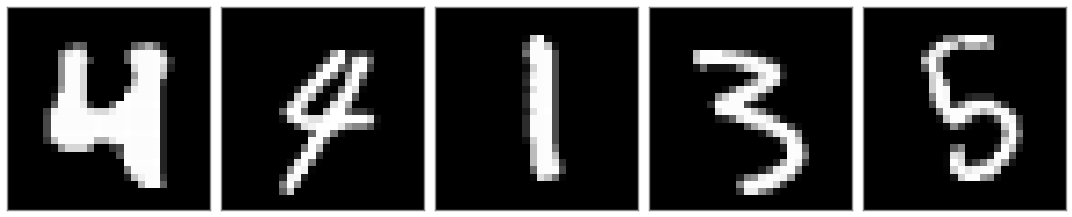

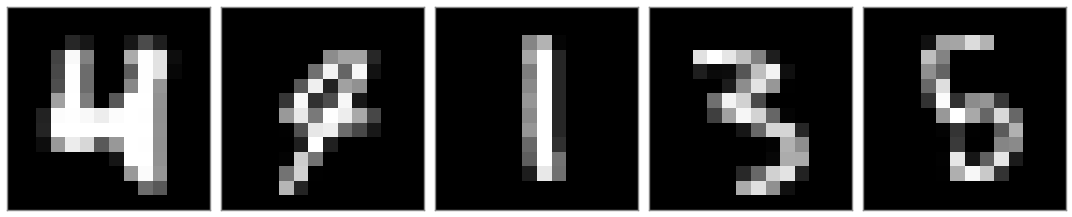

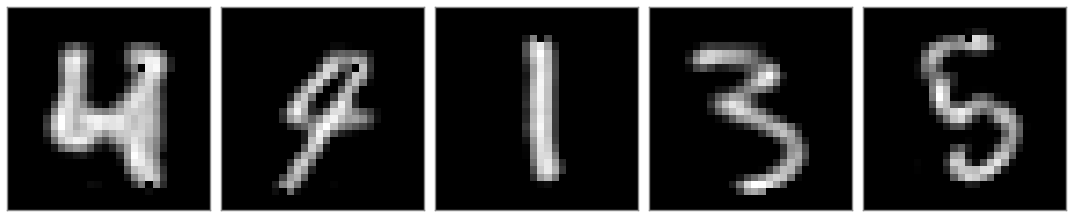

Epoch: 100 / 100	Loss: 0.006218332797288895
Optimization complete! Time: 94.66573023796082


In [22]:
optimize(session, 100)

In [23]:
def split_quadrants(images):
    image_size = int(images.shape[1])
    image_rows = int(np.sqrt(image_size))
    
    square_images = images[:image_rows**2].reshape((-1, image_rows, image_rows))
    
    quadrant_rows = int(image_rows / 2)
    
    quadrant_images = np.zeros((int(images.shape[0]), quadrant_rows, quadrant_rows, 4))
    for row in range(2):
        for column in range(2):
            quadrant_square_image = square_images[:, row*quadrant_rows:(row+1)*quadrant_rows, column*quadrant_rows:(column+1)*quadrant_rows]
            quadrant_images[:, :, :, 2*row + column] = quadrant_square_image.reshape((-1, quadrant_rows, quadrant_rows))
            
    return quadrant_images

In [24]:
def recombine_quadrants(images):
    num_images, img_rows_old, _, _ = images.shape
    img_rows_new = 2 * img_rows_old
    
    new_images = np.zeros((num_images, img_rows_new, img_rows_new, num_channels))
    
    for row in range(2):
        for column in range(2):
            new_images[:, row*img_rows_old:(row+1)*img_rows_old, column*img_rows_old:(column+1)*img_rows_old, :] = images[:, :, :, 2*row+column].reshape((num_images, img_rows_old, img_rows_old, 1))
            
    return new_images

In [25]:
def upsample(session, images):
    split_parts = split_quadrants(images)
    joined_images = []
    for n in range(len(images)):
        recombined_img = session.run(y_pred, {x_reduced: split_parts[n, :, :, :].reshape(int(img_size_flat / 4), 4).T})
        new_image = recombine_quadrants(recombined_img.T.reshape((-1, img_size, img_size, 4)))
        joined_images.append(new_image.reshape(-1, img_size_flat * 4))
    
    return np.array(joined_images).reshape((len(images), 4*img_size_flat))

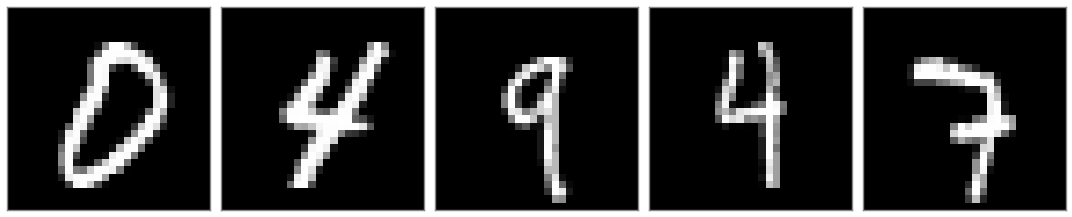

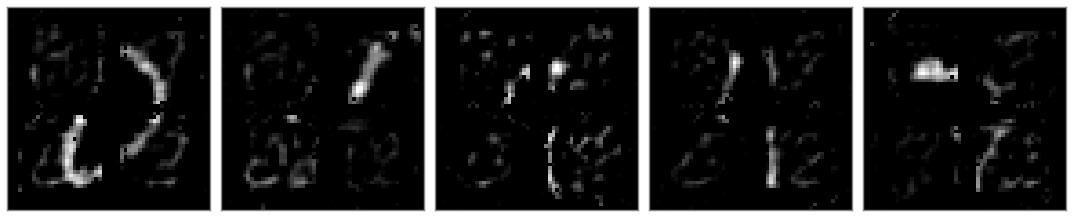

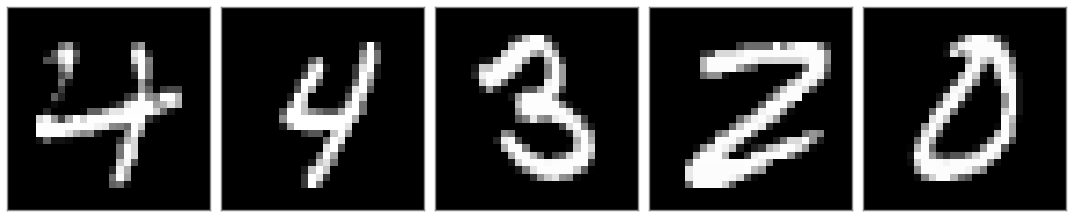

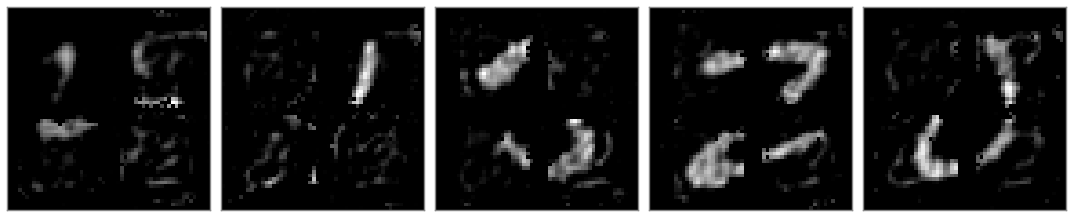

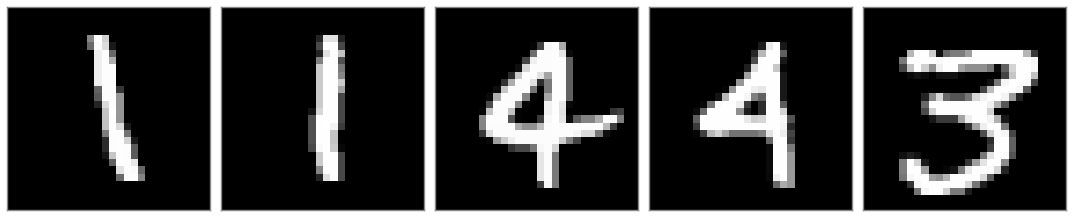

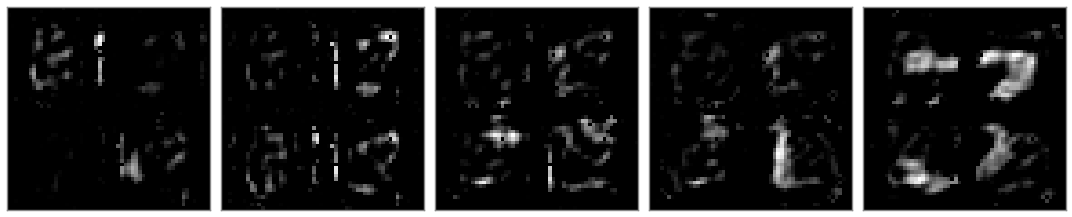

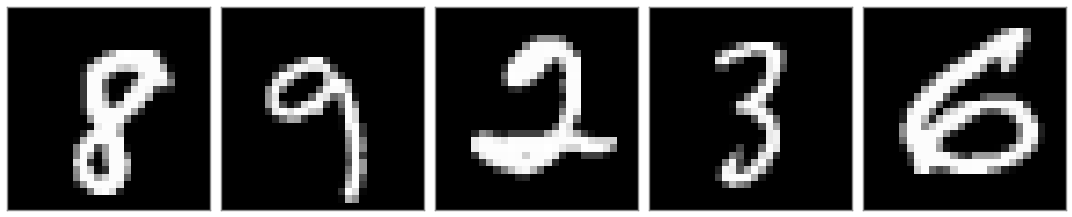

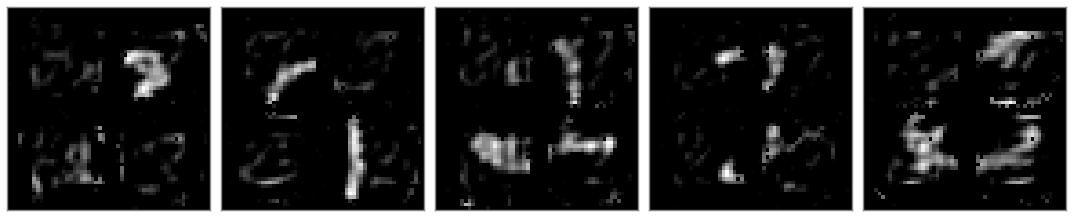

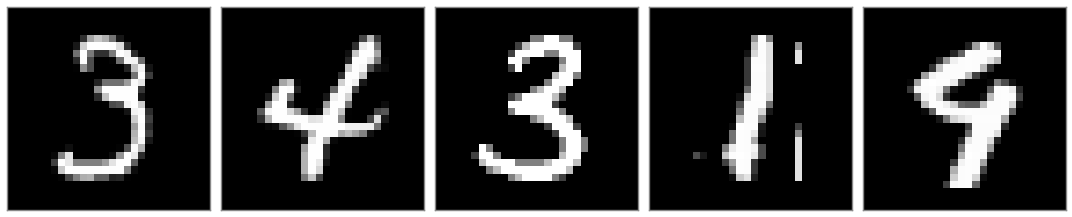

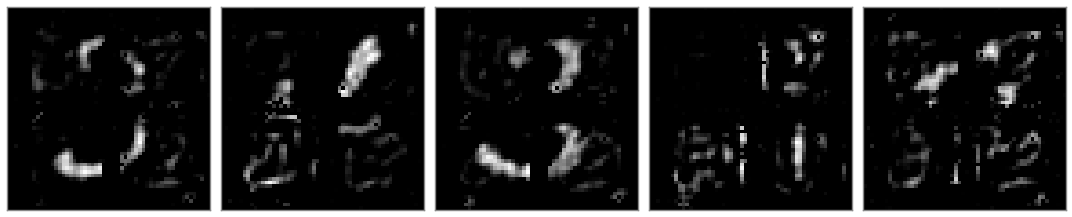

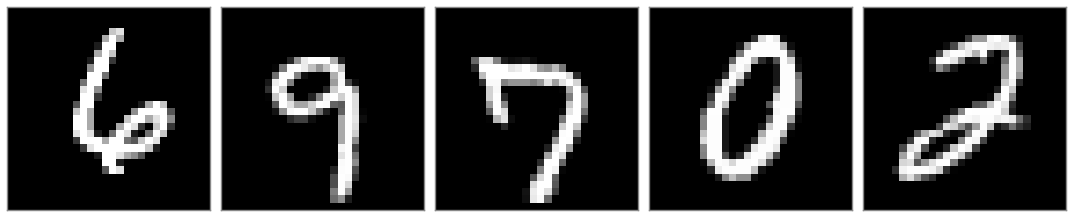

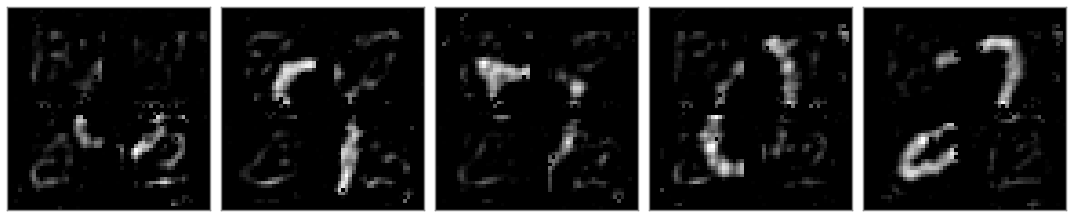

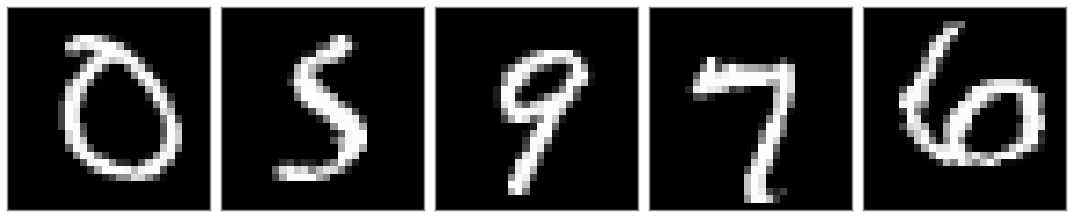

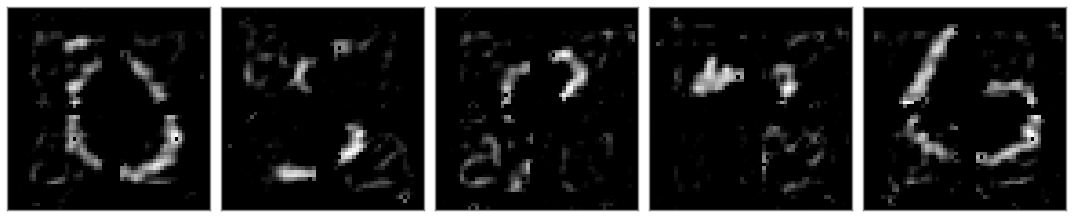

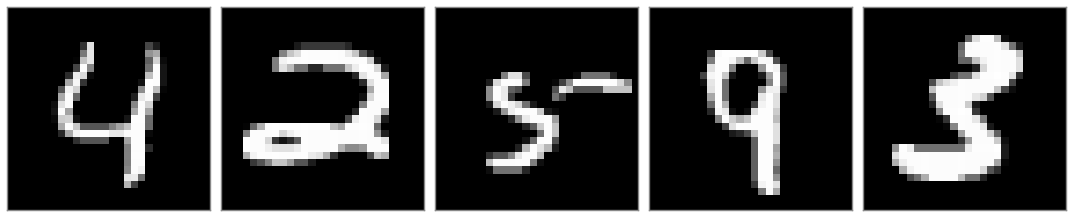

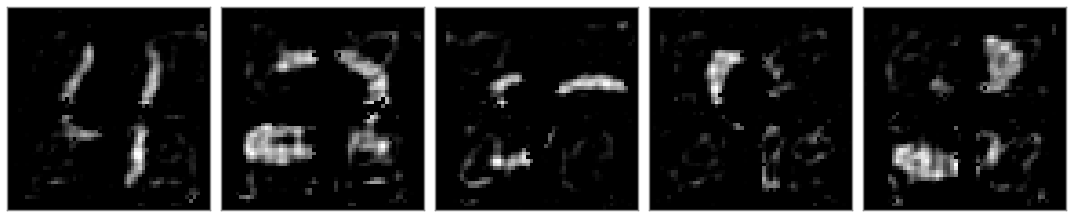

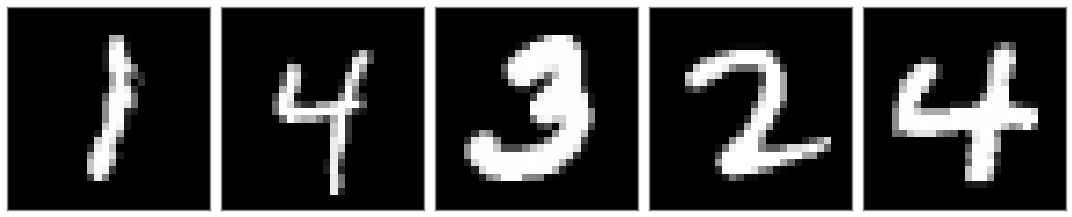

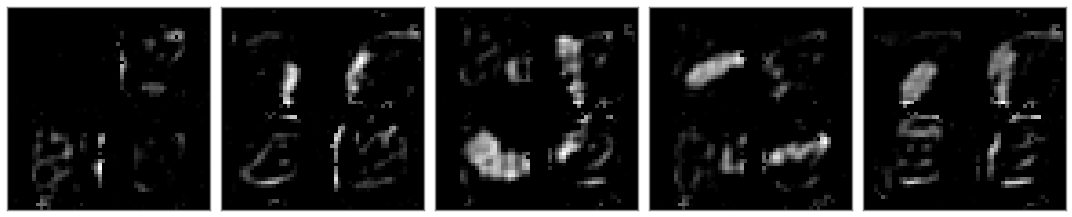

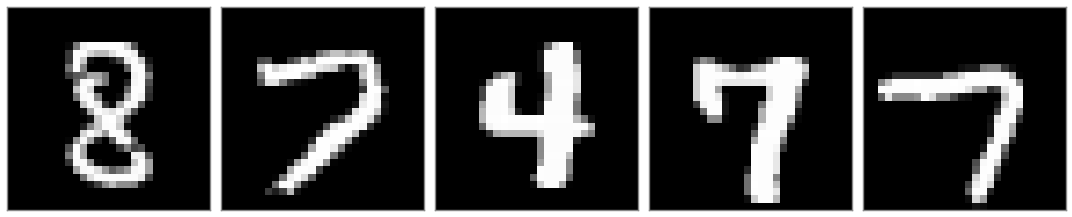

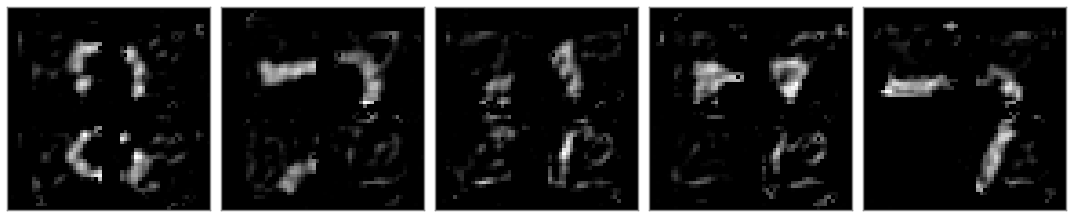

In [26]:
for _ in range(10):
    image_idx = np.random.randint(0, data.test.num_examples, 5)
    new_images = upsample(session, data.test.images[image_idx])
    plot_images(data.test.images[image_idx])
    plot_images(new_images)

In [27]:
session.close()